![Imgur](https://i.imgur.com/kJM6TZl.png)
#Projeto Fuel Reports
---

#<font color = bluelight> Análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.

## <font color = bluelight> Sobre a Empresa

Esse projeto foi solicitado pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis (ANP) e visa a realização de uma análise exploratória
relacionada à série histórica de preço de venda da gasolina e do etanol.

![Imgur](https://i.imgur.com/vpCTyKv.jpg)

A ANP é um centro de referência em dados e informações sobre a indústria de
petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e
Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção
de petróleo, gás e biocombustíveis no Brasil; realiza e divulga pesquisas sobre
qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços
desses produtos; promove estudos sobre o potencial petrolífero e o
desenvolvimento do setor; entre outras atividades.
- Natureza:	Agência Reguladora, Autarquia
- Jurídica: Especial, Administrativamente Independente, Financeiramente Autônoma
- Atribuições:	Regulação do Petróleo, Gás Natural e Biocombustíveis
- Dependência:	Governo do Brasil
- Chefia:	Décio Oddone, diretor-geral
- Criação: 	14 de janeiro de 1998


###>>> <font color = bluelight> Objetivos do Projeto
  - Realizar a análise exploratória a partir das fontes de dados disponíveis no portal gov.br.
  - Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C)
  - Série histórica dos preços dagasolina e do etanol em todo o Brasil
  - Análise descritiva das características dos dados, registros, tipos de dados e valores;
  - Limpar e tratar os dados;
  - Utilizar e visualizar gráficos com o objetivo de obter  insights.
  ---

###>>> <font color = bluelight> Perguntas a serem resolvidas
- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de alta ou diminuição?
-  Qual o preço médio da gasolina e do etanol nesses dois meses?
- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
-  Qual o preço médio da gasolina e do etanol por estado?
-  Qual o município que possui o menor preço para a gasolina e para o etanol?
- Qual o município que possui o maior preço para a gasolina e para o etanol?
- Qual a região que possui o maior valor médio da gasolina?
- Qual a região que possui o menor valor médio do etanol?
- Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
- Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

---
### >><font color = bluelight> Conhecendo os Dados:
Nesta etapa do projeto vamos entender os dados iniciais, suas características, registros, tipos e valores, aplicando uma análise com as estatísticas descritivas.

### >>><font color = bluelight> Coletando os dados iníciais
   - As fontes de dados estão disponíveis no portal gov.br. Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C) link encontra se disponível abaixo.
  -  Link [Serie historica do preço dos combustiveis ](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)
  - Estão sendo utilizados os meses de Maio/2023 e Junho/2023

### >>Instalando biblioteca usadas para gerar gráficos de mapas coropléticos*

In [ ]:
!pip install matplotlib geopandas geobr

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install descartes

### >>Importação de pacotes de bibliotecas que serão utilizados no projeto bem como suas versões:*

In [ ]:
# Pacotes de bibliotecas que serão usadas no projeto:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.ticker as ticker
import geobr
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# versões dos pacotes:
print('Pacotes Instalados! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Geopandas   --> {gpd.__version__}')

Pacotes Instalados! Versões Utilizadas:

Pandas      --> 1.5.3
Numpy       --> 1.23.5
Matplotlib  --> 3.7.1
Geopandas   --> 0.7.0


---

### >>>Carregando a base de dados do mês de Junho/2023*

In [ ]:
# url Para baixar o arquivo
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv'
junho = pd.read_csv(url, sep=';')
junho

Regiao - Sigla Estado - Sigla     Municipio  \
0                 NE             BA         IRECE   
1                 NE             BA         IRECE   
2                 NE             BA  SIMOES FILHO   
3                 NE             BA  SIMOES FILHO   
4                 NE             BA  SIMOES FILHO   
...              ...            ...           ...   
49036             NE             BA      CAMACARI   
49037             NE             BA      CAMACARI   
49038             NE             BA      CAMACARI   
49039             NE             BA      CAMACARI   
49040             NE             BA      CAMACARI   

                                                 Revenda      CNPJ da Revenda  \
0                       IRECE DERIVADOS DE PETROLEO LTDA   09.186.976/0001-75   
1                       IRECE DERIVADOS DE PETROLEO LTDA   09.186.976/0001-75   
2      CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA   13.018.536/0003-48   
3      CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA   13.018.536/0003-48   
4      CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA   13.018.536/0003-48   
...                                                  ...                  ...   
49036              POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA   28.315.993/0001-00   
49037  YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...   04.909.369/0002-53   
49038  YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...   04.909.369/0002-53   
49039  YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...   04.909.369/0002-53   
49040              ALECRIM COMERCIO DE COMBUSTIVEIS LTDA   29.011.125/0001-07   

                   Nome da Rua Numero Rua  \
0           PRACA AIRTON SENNA        285   
1           PRACA AIRTON SENNA        285   
2      AVENIDA WASHINGTON LUIZ        169   
3      AVENIDA WASHINGTON LUIZ        169   
4      AVENIDA WASHINGTON LUIZ        169   
...                        ...        ...   
49036                    RUA C         27   
49037   ESTRADA DA CASCALHEIRA        S/N   
49038   ESTRADA DA CASCALHEIRA        S/N   
49039   ESTRADA DA CASCALHEIRA        S/N   
49040           RUA DO ALECRIM         SN   

                                             Complemento  \
0                                                 TERREO   
1                                                 TERREO   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
49036                LOTEAMENTO JARDIM FL      AMBOYANTS   
49037  BA 531              KM    3 5                 ...   
49038  BA 531              KM    3 5                 ...   
49039  BA 531              KM    3 5                 ...   
49040                                                NaN   

                        Bairro        Cep             Produto Data da Coleta  \
0                       CENTRO  44900-000              ETANOL     01/06/2023   
1                       CENTRO  44900-000            GASOLINA     01/06/2023   
2                       CENTRO  43700-000              ETANOL     01/06/2023   
3                       CENTRO  43700-000  GASOLINA ADITIVADA     01/06/2023   
4                       CENTRO  43700-000            GASOLINA     01/06/2023   
...                        ...        ...                 ...            ...   
49036         VILA DE ABRANTES  42840-000            GASOLINA     30/06/2023   
49037  PARQUE REAL SERRA VERDE  42813-080              ETANOL     30/06/2023   
49038  PARQUE REAL SERRA VERDE  42813-080  GASOLINA ADITIVADA     30/06/2023   
49039  PARQUE REAL SERRA VERDE  42813-080            GASOLINA     30/06/2023   
49040                   CENTRO  42800-090            GASOLINA     30/06/2023   

      Valor de Venda  Valor de Compra Unidade de Medida       Bandeira  
0               4,31              NaN        R$ / litro  VIBRA ENERGIA  
1               5,39       

---

### >>>Carregando a base de dados do mês de Maio/2023*

In [ ]:
# url Para baixar o arquivo
url2 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv'
maio = pd.read_csv(url2, sep=';')
maio

Regiao - Sigla Estado - Sigla        Municipio  \
0                 SE             SP         SOROCABA   
1                 SE             SP         SOROCABA   
2                  N             AC  CRUZEIRO DO SUL   
3                  N             AC  CRUZEIRO DO SUL   
4                  N             AC  CRUZEIRO DO SUL   
...              ...            ...              ...   
58485             SE             SP         VALINHOS   
58486             SE             SP         VALINHOS   
58487             SE             SP         VALINHOS   
58488             SE             SP     PIRASSUNUNGA   
58489             SE             SP     PIRASSUNUNGA   

                                                 Revenda      CNPJ da Revenda  \
0      COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   00.003.188/0001-21   
1      COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   00.003.188/0001-21   
2        AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   01.492.748/0003-83   
3        AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   01.492.748/0003-83   
4        AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA   01.492.748/0003-83   
...                                                  ...                  ...   
58485               AUTO POSTO MUNICIPALDE ANDRADAS LTDA   44.059.126/0001-07   
58486               AUTO POSTO MUNICIPALDE ANDRADAS LTDA   44.059.126/0001-07   
58487               AUTO POSTO MUNICIPALDE ANDRADAS LTDA   44.059.126/0001-07   
58488                       AUTO POSTO PADRE ANTONI LTDA   45.224.849/0001-87   
58489                       AUTO POSTO PADRE ANTONI LTDA   45.224.849/0001-87   

                          Nome da Rua Numero Rua Complemento          Bairro  \
0              RUA HUMBERTO DE CAMPOS        306         NaN  JARDIM ZULMIRA   
1              RUA HUMBERTO DE CAMPOS        306         NaN  JARDIM ZULMIRA   
2                  AVENIDA COPACABANA        440         NaN      COPACABANA   
3                  AVENIDA COPACABANA        440         NaN      COPACABANA   
4                  AVENIDA COPACABANA        440         NaN      COPACABANA   
...                               ...        ...         ...             ...   
58485  RODOVIA MUNICIPAL DOS ANDRADAS       3294         NaN   JARDIM LORENA   
58486  RODOVIA MUNICIPAL DOS ANDRADAS       3294         NaN   JARDIM LORENA   
58487  RODOVIA MUNICIPAL DOS ANDRADAS       3294         NaN   JARDIM LORENA   
58488  AVENIDA PADRE ANTONIO VANN ESS       1144         NaN          CENTRO   
58489  AVENIDA PADRE ANTONIO VANN ESS       1144         NaN          CENTRO   

             Cep             Produto Data da Coleta Valor de Venda  \
0      18061-000              ETANOL     01/05/2023           3,79   
1      18061-000            GASOLINA     01/05/2023           4,69   
2      69980-000              ETANOL     01/05/2023           5,49   
3      69980-000  GASOLINA ADITIVADA     01/05/2023           6,97   
4      69980-000            GASOLINA     01/05/2023           6,97   
...          ...                 ...            ...            ...   
58485  13277-650              ETANOL     31/05/2023           3,49   
58486  13277-650  GASOLINA ADITIVADA     31/05/2023           4,99   
58487  13277-650            GASOLINA     31/05/2023           4,69   
58488  13630-025              ETANOL     31/05/2023           3,49   
58489  13630-025            GASOLINA     31/05/2023           4,89   

       Valor de Compra Unidade de Medida  Bandeira  
0                  NaN        R$ / litro    BRANCA  
1                  NaN        R$ / litro    BRANCA  
2                  NaN        R$ / litro  IPIRANGA  
3                  NaN        R$ / litro  IPIRANGA  
4                  NaN        R$ / litro  IPIRANGA  
...                ...               ...       ...  
58485              NaN        R$ / litro  IPIRANGA  
58486              NaN        R$ / litro  IPIRANGA  
58487              NaN        R$ / litro  IPIRANGA  
58488              NaN      

---

In [ ]:
# 1-  Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de alta ou diminuição?


#### <font color = bluelight>>>>>Conhecendo os dados
 Objetivo é identificar o formato, os tipos de variáveis e os aspctos gerais, para um melhor entendimento do problema.

--> Para termos uma compreensão clara de nossos dados, iremos criar um dicionário de variáveis contendo as colunas do Dataset e a descrição de seu conteúdo:

**Dicionário das variáveis**

* `Regiao - Sigla` - Sigla da Região da revenda pesquisada.
* `Estado - Sigla` - Sigla da Unidade Federativa (UF) da revenda pesquisada.
* `Municipio` - Nome do município da revenda pesquisada.
* `Revenda` - Nome do posto que consta no CNPJ da revenda pesquisada.
* `CNPJ da Revenda` - Número do Cadastro Nacional de Pessoa Jurídica da revenda pesquisada.
* `Nome da Rua` - Nome do logradouro da revenda pesquisada.
* `Numero Rua` - Número do logradouro da revenda pesquisada.
* `Complemento` - Complemento do logradouro da revenda pesquisada.
* `Bairro` - Nome do bairro da revenda pesquisada
* `Cep` - Número do Código do Endereço Postal (CEP) do logradouro da revenda pesquisada
* `Produto` - Nome do combustível pesquisado
* `Data da Coleta` - Data da coleta do(s) preço(s)
* `Valor de Venda` - Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta
* `Valor de Compra` - Preço de distribuição (preço de venda da distribuidora para o posto revendedor de combustível). * Série disponível até agosto de 2020
* `Unidade de Medida` - Unidade de Medida
* `Bandeira` - Noma da Bandeira da revenda.
O Posto bandeirado é aquele que opta por exibir a marca comercial
de um distribuidor, o posto deverá vender somentecombustíveis
fornecidos pelo distribuidor detentor da marca comercial exibida aos
consumidores. Já o Posto bandeira branca é o que opta por não
exibir marca comercial de nenhuma distribuidora.

---

--> Consultando o formato do dataset Junho/2023

In [ ]:
#ter o conhecimento do número de registros e colunas
junho.shape

(49041, 16)

Aqui temos a informçãp que o dataset do mês de Junho possui:
- 49041 --> linhas (registros)
- 16    --> colunas

--> Consultando o formato do dataset Maio/2023

In [ ]:
#ter o conhecimento do número de registros e colunas
maio.shape

(58490, 16)

Aqui temos a informação que o dataset do mês de Maio
- 58490 -->linhas
- 16 -->colunas

--> Tipos de dados:
- é importante verificarmos os tipos das variáveis que integram a base: inteiros, floats, objetos. Essa análise indica na fase de preparação dos dados a necessidade de transformações.

In [ ]:
# Ter a informaçao se existe registros nulos
junho.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49041 entries, 0 to 49040
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     49041 non-null  object 
 1   Estado - Sigla     49041 non-null  object 
 2   Municipio          49041 non-null  object 
 3   Revenda            49041 non-null  object 
 4   CNPJ da Revenda    49041 non-null  object 
 5   Nome da Rua        49041 non-null  object 
 6   Numero Rua         49023 non-null  object 
 7   Complemento        10848 non-null  object 
 8   Bairro             48935 non-null  object 
 9   Cep                49041 non-null  object 
 10  Produto            49041 non-null  object 
 11  Data da Coleta     49041 non-null  object 
 12  Valor de Venda     49041 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  49041 non-null  object 
 15  Bandeira           49041 non-null  object 
dtypes: float64(1), object(

--> No mês de junho temos float64(1), object(15)
- coluna 'Data' talves precise ser converitida para date
- coluna 'Valor de Venda' será convertida para float

In [ ]:
# Verificando quantidade de valores nulos
junho.isnull().sum()

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              18
Complemento          38193
Bairro                 106
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      49041
Unidade de Medida        0
Bandeira                 0
dtype: int64

--> Na analise de Junho, temos valores nulos no 'Numero Rua', 'Complemento', 'Bairro', 'Valor de Compra', e a 'data' está como object
-  'Valor de compra' esteve disponível até agosto de 2020, por isso está completamente nula, com certeza não será necessária para o projeto.

In [ ]:
# Maio
maio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58490 entries, 0 to 58489
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     58490 non-null  object 
 1   Estado - Sigla     58490 non-null  object 
 2   Municipio          58490 non-null  object 
 3   Revenda            58490 non-null  object 
 4   CNPJ da Revenda    58490 non-null  object 
 5   Nome da Rua        58490 non-null  object 
 6   Numero Rua         58463 non-null  object 
 7   Complemento        13000 non-null  object 
 8   Bairro             58370 non-null  object 
 9   Cep                58490 non-null  object 
 10  Produto            58490 non-null  object 
 11  Data da Coleta     58490 non-null  object 
 12  Valor de Venda     58490 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  58490 non-null  object 
 15  Bandeira           58490 non-null  object 
dtypes: float64(1), object(

--> Temos float64(1), object(15)
- coluna 'Data' talves precise ser converitida para date
- coluna 'Valor de Venda' será convertida para float

-->Verificando a aquantidade de valores nulos em cada coluna

In [ ]:
# Verificando quantidade de valores nulos
maio.isnull().sum()

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              27
Complemento          45490
Bairro                 120
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      58490
Unidade de Medida        0
Bandeira                 0
dtype: int64

--> Na analise de Maio, temos valores nulos no 'Numero Rua', 'Complemento', 'Bairro', 'Valor de Compra', e a 'data' está como object
-  'Valor de compra' esteve disponível até agosto de 2020, por isso está completamente nula, com certeza não será necessária para o projeto.

---

In [ ]:
junho.head()

Regiao - Sigla Estado - Sigla     Municipio  \
0             NE             BA         IRECE   
1             NE             BA         IRECE   
2             NE             BA  SIMOES FILHO   
3             NE             BA  SIMOES FILHO   
4             NE             BA  SIMOES FILHO   

                                             Revenda      CNPJ da Revenda  \
0                   IRECE DERIVADOS DE PETROLEO LTDA   09.186.976/0001-75   
1                   IRECE DERIVADOS DE PETROLEO LTDA   09.186.976/0001-75   
2  CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA   13.018.536/0003-48   
3  CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA   13.018.536/0003-48   
4  CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA   13.018.536/0003-48   

               Nome da Rua Numero Rua Complemento  Bairro        Cep  \
0       PRACA AIRTON SENNA        285      TERREO  CENTRO  44900-000   
1       PRACA AIRTON SENNA        285      TERREO  CENTRO  44900-000   
2  AVENIDA WASHINGTON LUIZ        169         NaN  CENTRO  43700-000   
3  AVENIDA WASHINGTON LUIZ        169         NaN  CENTRO  43700-000   
4  AVENIDA WASHINGTON LUIZ        169         NaN  CENTRO  43700-000   

              Produto Data da Coleta Valor de Venda  Valor de Compra  \
0              ETANOL     01/06/2023           4,31              NaN   
1            GASOLINA     01/06/2023           5,39              NaN   
2              ETANOL     01/06/2023           4,19              NaN   
3  GASOLINA ADITIVADA     01/06/2023           5,36              NaN   
4            GASOLINA     01/06/2023           5,29              NaN   

  Unidade de Medida       Bandeira  
0        R$ / litro  VIBRA ENERGIA  
1        R$ / litro  VIBRA ENERGIA  
2        R$ / litro  VIBRA ENERGIA  
3        R$ / litro  VIBRA ENERGIA  
4        R$ / litro  VIBRA ENERGIA

In [ ]:
#  aqui vamos dropar as colunas que nao serão necessarias
junho.drop(['Bairro', 'Cep','Valor de Compra','Complemento','Numero Rua','Nome da Rua','Revenda','CNPJ da Revenda'], inplace =True, axis = 'columns')
maio.drop(['Bairro', 'Cep','Valor de Compra','Complemento','Numero Rua','Nome da Rua','Revenda','CNPJ da Revenda'], inplace =True, axis = 'columns')


#### <font color = blueligh> >>>> Analisando as informções estatísticas da gasolina
Após conhecer a estrutura do dataset, veremos a qualidade dos dados identificando outliers, através de estatística descritiva.

In [ ]:
df_etanol_junho = junho[junho['Produto'] == 'ETANOL']
df_etanol_junho['Valor de Venda'].describe()

count     15938
unique      226
top        3,69
freq       1090
Name: Valor de Venda, dtype: object

--> em Junho foram registrados 15938 preços de etanol,com 226 valores diferentes
o preço mais comum foi 3,69 ele foi registrado 1090 vezes

In [ ]:
df_gasolina_junho = junho[junho['Produto'] == 'GASOLINA']
df_gasolina_junho['Valor de Venda'].describe()

count     18686
unique      195
top        5,29
freq       1680
Name: Valor de Venda, dtype: object

--> em Junho foram registrados 18686 preços de gasolina,com 195 valores diferentes
o preço mais comum foi 5,29 ele foi registrado 1680 vezes

In [ ]:
df_gasolina_adt_junho = junho[junho['Produto'] == 'GASOLINA ADITIVADA']
df_gasolina_adt_junho['Valor de Venda'].describe()

count     14417
unique      194
top        5,49
freq       1096
Name: Valor de Venda, dtype: object

--> em Junho foram registrados 14417 preços de gasolina aditivada, com 194 valores diferentes
o preço mais comum foi 5,49 ele foi registrado 1096 vezes




---

In [ ]:
df_etanol_maio = maio[maio['Produto'] == 'ETANOL']
df_etanol_maio['Valor de Venda'].describe()

count     18997
unique      237
top        3,99
freq       1842
Name: Valor de Venda, dtype: object

--> em maio foram registrados 18997 preços de gasolina aditivada, com 237 valores diferentes
o preço mais comum foi 3,99 ele foi registrado 1842 vezes




In [ ]:
df_gasolina_maio = maio[maio['Produto'] == 'GASOLINA']
df_gasolina_maio['Valor de Venda'].describe()

count     22262
unique      217
top        5,49
freq       1582
Name: Valor de Venda, dtype: object


--> em maio foram registrados 22262 preços de gasolina,com 217 valores diferentes
o preço mais comum foi 5,49 ele foi registrado 1582 vezes

In [ ]:
df_gasolina_adt_maio = maio[maio['Produto'] == 'GASOLINA ADITIVADA']
df_gasolina_adt_maio['Valor de Venda'].describe()

count     17231
unique      218
top        5,49
freq       1169
Name: Valor de Venda, dtype: object

--> em maio foram registrados 17231 preços de gasolina aditivada,com 218 valores diferentes
o preço mais comum foi 5,49 ele foi registrado 1169 vezes

##### >>>>> Funções para um melhor aproveitamento do codigo

In [ ]:
# função do histograma
def func_histograma(df_mes,combustivel,mes):
    plt.hist(df_mes['Valor de Venda'], bins=15, color='blue', alpha=0.7)
    plt.xlabel('Valor de Venda (R$)')
    plt.ylabel('Frequência')
    plt.title(f'Histograma de Preços {combustivel} {mes}')
    plt.show()

In [ ]:
def func_box_plot(df_mes):
  df_mes['Valor de Venda'].plot(kind='box', vert=False, figsize=(15, 3))
  plt.show()

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina no mês de junho
```

In [ ]:
junho['Valor de Venda'] = junho['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
junho['Valor de Venda'] =junho['Valor de Venda'].astype('float64')


#####>>>>> Gasolina Junho

In [ ]:
df_gasolina_junho=junho[junho['Produto']=='GASOLINA']
descris_gas_junho = df_gasolina_junho['Valor de Venda'].describe()
descris_gas_junho


count    18686.000000
mean         5.392589
std          0.334964
min          4.430000
25%          5.190000
50%          5.380000
75%          5.590000
max          7.000000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.33, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

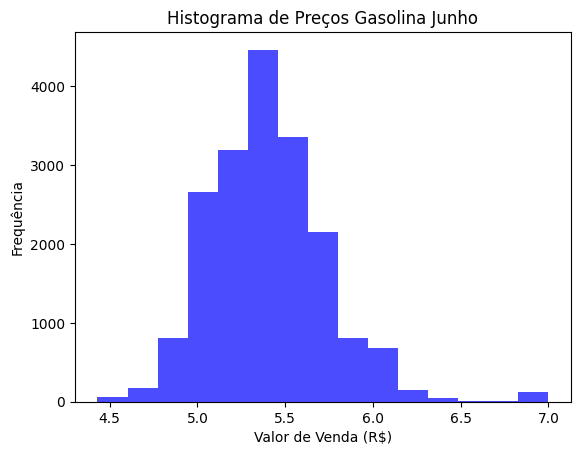

In [ ]:
func_histograma(df_gasolina_junho, 'Gasolina','Junho')

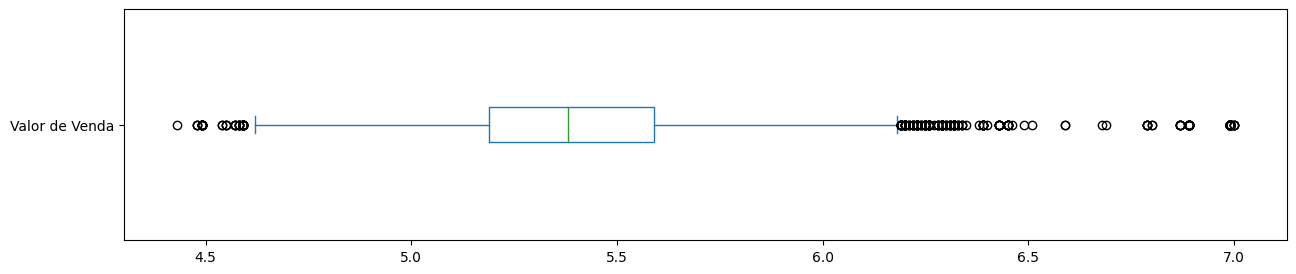

In [ ]:
func_box_plot(df_gasolina_junho)


- A média do preço da gasolina no més de junho foi de 5.39, o desvio padrão foi de 0.33, O menor valor registrado no mês foi de R$4.43, e o maior valor registrado no mês foi de 7.00  
- Primeiro quartil - 25%: 5.19 dos preços coletados da gasolina estão abaixo ou iguais a 5.19
- Segundo quartil - 50%: 5.38 dos preços coletados da gasolina estão abaixo ou iguais a 5.38
- Terceiro quartil - 75%: 5.59 dos preços coletados da gasolina estão abaixo ou iguais a 5.59




- O desvio padrão esta em 0.34, o que indica queo

conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

---

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina aditivada no mês de junho
```

#####>>>>> Etanol Maio

In [ ]:
df_gasolina_adt_junho = junho[junho['Produto']=='GASOLINA ADITIVADA']
descris_gas_adt_junho = df_gasolina_adt_junho['Valor de Venda'].describe()
descris_gas_adt_junho

count    14417.000000
mean         5.572516
std          0.341832
min          4.590000
25%          5.370000
50%          5.550000
75%          5.780000
max          7.990000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.34, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

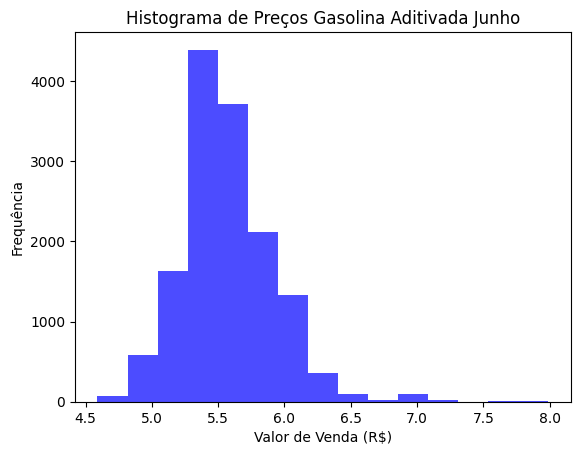

In [ ]:
func_histograma(df_gasolina_adt_junho, 'Gasolina Aditivada','Junho')

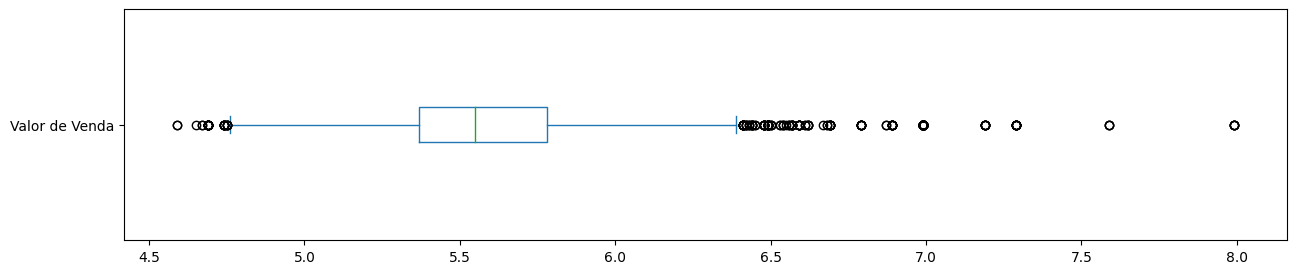

In [ ]:
func_box_plot(df_gasolina_adt_junho)

- A média do preço da gasolina aditivada no més de junho foi de 5.57, o desvio padrão foi de 0.34, O menor valor registrado no mês foi de R$4.59, e o maior valor registrado no mês foi de 7.99  
- Primeiro quartil - 25%: 5.37 dos preços coletados da gasolina estão abaixo ou iguais a 5.37
- Segundo quartil - 50%: 5.55 dos preços coletados da gasolina estão abaixo ou iguais a 5.55
- Terceiro quartil - 75%: 5.78 dos preços coletados da gasolina estão abaixo ou iguais a 5.78

---

```python
- Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina no mês de maio
```

#####>>>>> Gasolina Maio

In [ ]:
maio['Valor de Venda'] = maio['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
maio['Valor de Venda'] =maio['Valor de Venda'].astype('float64')
df_gasolina_maio = maio[maio['Produto']=='GASOLINA']
descris_gasolina_maio = df_gasolina_maio['Valor de Venda'].describe()
descris_gasolina_maio

count    22262.000000
mean         5.402364
std          0.385808
min          4.090000
25%          5.130000
50%          5.390000
75%          5.640000
max          7.350000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.38, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo



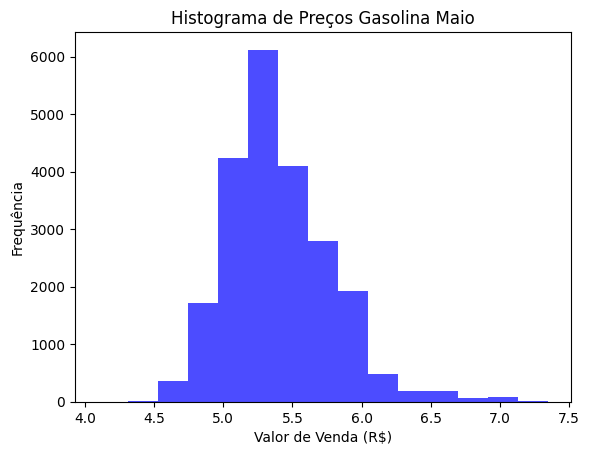

In [ ]:
func_histograma(df_gasolina_maio, 'Gasolina','Maio')

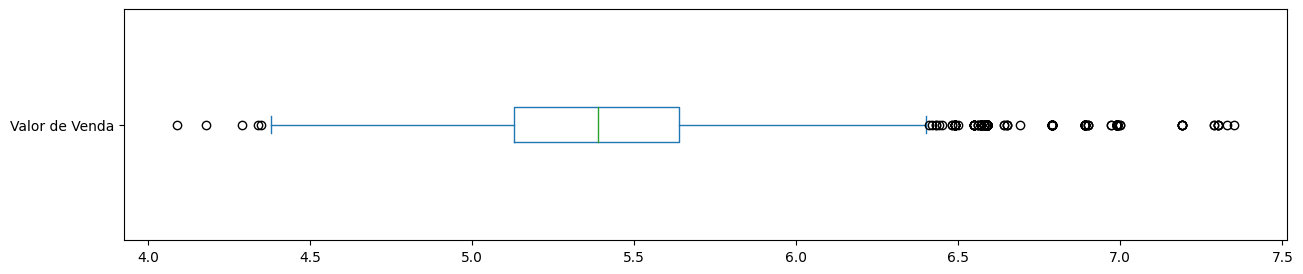

In [ ]:
func_box_plot(df_gasolina_maio)

- A média do preço da gasolina no més de maio foi de 5.40, o desvio padrão foi de 0.38, O menor valor registrado no mês foi de R$4.09, e o maior valor registrado no mês foi de 7.35  
- Primeiro quartil - 25%: 5.13 dos preços coletados da gasolina estão abaixo ou iguais a 5.13
- Segundo quartil - 50%: 5.39 dos preços coletados da gasolina estão abaixo ou iguais a 5.39
- Terceiro quartil - 75%: 5.64 dos preços coletados da gasolina estão abaixo ou iguais a 5.64



---

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina aditivada no mês de maio
```

#####>>>>> Gasolina Adt Maio

In [ ]:
df_gasolina_adt_maio = maio[maio['Produto']=='GASOLINA ADITIVADA']
descris_gas_adt_maio = df_gasolina_adt_maio['Valor de Venda'].describe()
descris_gas_adt_maio

count    17231.000000
mean         5.585725
std          0.391724
min          4.490000
25%          5.290000
50%          5.570000
75%          5.840000
max          7.990000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.39, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

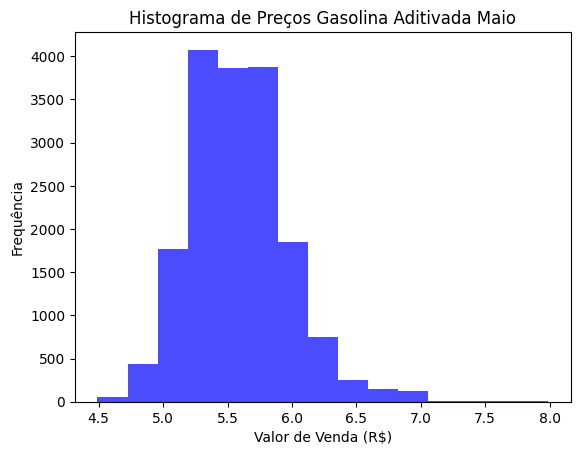

In [ ]:
func_histograma(df_gasolina_adt_maio, 'Gasolina Aditivada','Maio')

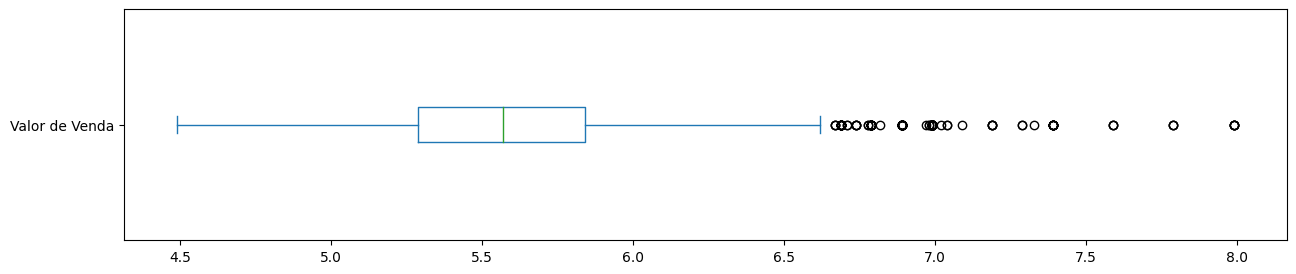

In [ ]:
func_box_plot(df_gasolina_adt_maio)


- A média do preço da gasolina aditivada no més de maio foi de 5.58, o desvio padrão foi de 0.39, O menor valor registrado no mês foi de R$4.49, e o maior valor registrado no mês foi de 7.99  
- Primeiro quartil - 25%: 5.29 dos preços coletados da gasolina estão abaixo ou iguais a 5.29
- Segundo quartil - 50%: 5.57 dos preços coletados da gasolina estão abaixo ou iguais a 5.57
- Terceiro quartil - 75%: 5.84 dos preços coletados da gasolina estão abaixo ou iguais a 5.84

---

#### <font color = blueligh> >>>> Analisando as informções estatísticas do etanol
Após conhecer a estrutura do dataset, veremos a qualidade dos dados identificando outliers, através de estatística descritiva.

##### >>>>> Etanol Junho

In [ ]:
df_etanol_junho = junho[junho['Produto'] == 'ETANOL']
df_etanol_junho['Valor de Venda'].describe()

count    15938.000000
mean         4.006356
std          0.480796
min          2.970000
25%          3.590000
50%          3.930000
75%          4.370000
max          6.730000
Name: Valor de Venda, dtype: float64

--> em Junho foram registrados 15938 preços de Etanol,com 226 valores diferentes
o preço mais comum foi 3,69 ele foi registrado 1090 vezes

#####>>>>> Etanol Maio

In [ ]:
df_etanol_maio = maio[maio['Produto'] == 'ETANOL']
df_etanol_maio['Valor de Venda'].describe()

count    18997.000000
mean         4.178726
std          0.446702
min          2.990000
25%          3.870000
50%          4.100000
75%          4.490000
max          6.500000
Name: Valor de Venda, dtype: float64

--> em maio foram registrados 18997 preços de etanol,com 237 valores diferentes
o preço mais comum foi 3,99 ele foi registrado 1842 vezes

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da etanol no mês de junho
```

#####>>>>>Etanol Junho

In [ ]:
junho['Valor de Venda'] = junho['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
junho['Valor de Venda'] =junho['Valor de Venda'].astype('float64')
df_etanol_jun = junho[junho['Produto']=='ETANOL']
descris_etanol_jun = df_etanol_jun['Valor de Venda'].describe()
descris_etanol_jun

count    15938.000000
mean         4.006356
std          0.480796
min          2.970000
25%          3.590000
50%          3.930000
75%          4.370000
max          6.730000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.48, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

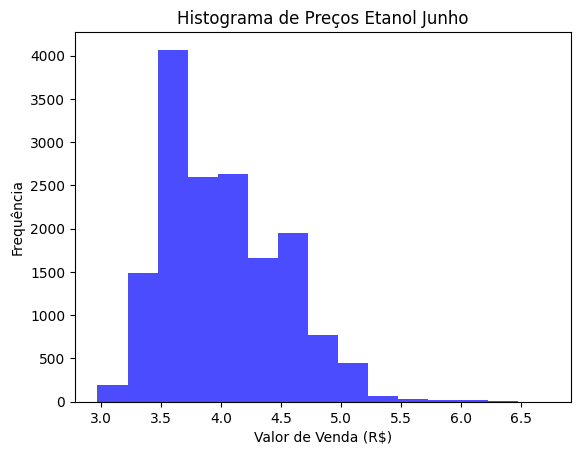

In [ ]:
func_histograma(df_etanol_junho, 'Etanol','Junho')

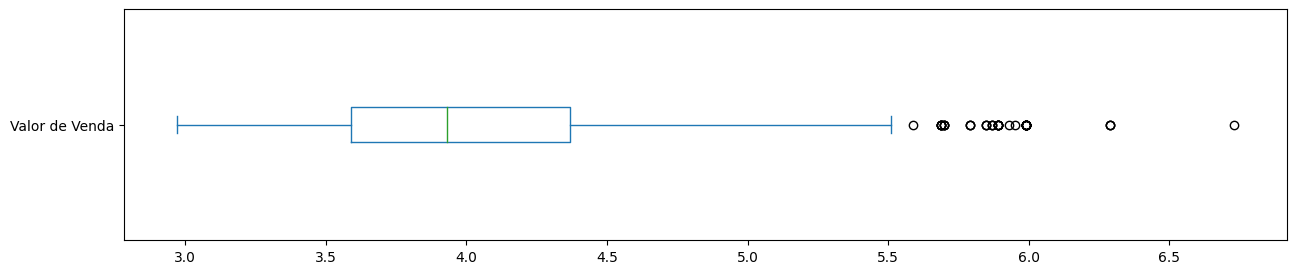

In [ ]:
func_box_plot(df_etanol_junho)

- A média do preço do etanol no més de junho foi de 4.00, o desvio padrão foi de 0.48, O menor valor registrado no mês foi de R$2.97, e o maior valor registrado no mês foi de 6.73  
- Primeiro quartil - 25%: 3.59 dos preços coletados da gasolina estão abaixo ou iguais a 3.59
- Segundo quartil - 50%: 3.93 dos preços coletados da gasolina estão abaixo ou iguais a 3.93
- Terceiro quartil - 75%: 4.37 dos preços coletados da gasolina estão abaixo ou iguais a 4.37

```python
- Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço do etanol no mês de maio
```

##### >>>>> Etanol Maio

In [ ]:
maio['Valor de Venda'] = maio['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
maio['Valor de Venda'] =maio['Valor de Venda'].astype('float64')
df_etanol_maio = maio[maio['Produto']=='ETANOL']
descris_etanol_maio = df_etanol_maio['Valor de Venda'].describe()
descris_etanol_maio

count    18997.000000
mean         4.178726
std          0.446702
min          2.990000
25%          3.870000
50%          4.100000
75%          4.490000
max          6.500000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.44, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

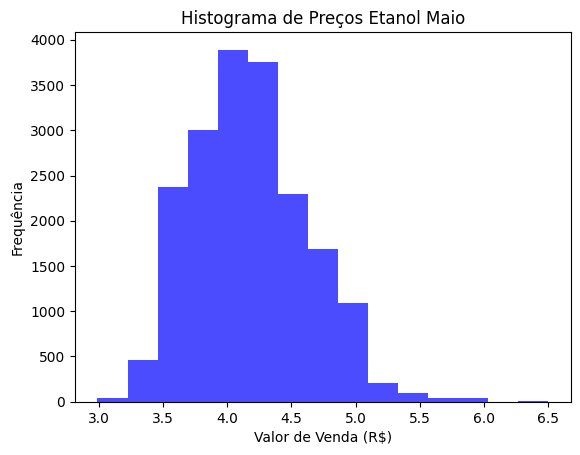

In [ ]:
func_histograma(df_etanol_maio, 'Etanol','Maio')

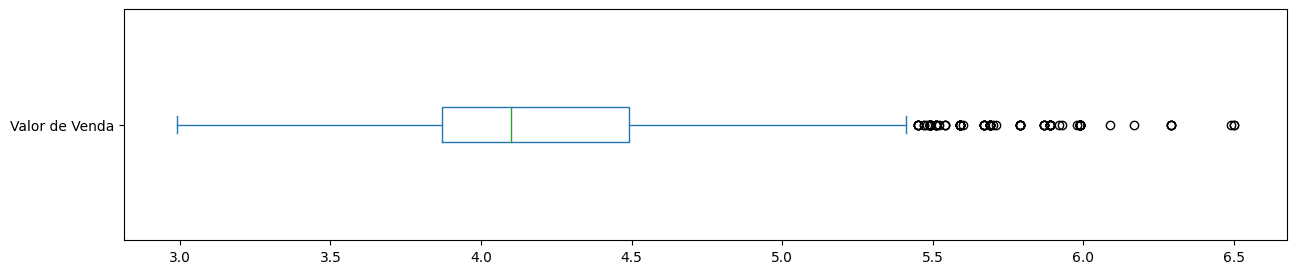

In [ ]:
func_box_plot(df_etanol_maio)


- A média do preço do etanol no més de maio foi de 4.17, o desvio padrão foi de 0.44, O menor valor registrado no mês foi de R$2.99, e o maior valor registrado no mês foi de 6.50  
- Primeiro quartil - 25%: 3.87 dos preços coletados da gasolina estão abaixo ou iguais a 3.87
- Segundo quartil - 50%: 4.10 dos preços coletados da gasolina estão abaixo ou iguais a 4.10
- Terceiro quartil - 75%: 4.49 dos preços coletados da gasolina estão abaixo ou iguais a 4.49

---

###>>> Comportamento dos preços padronizados

#####>>>>> Junho

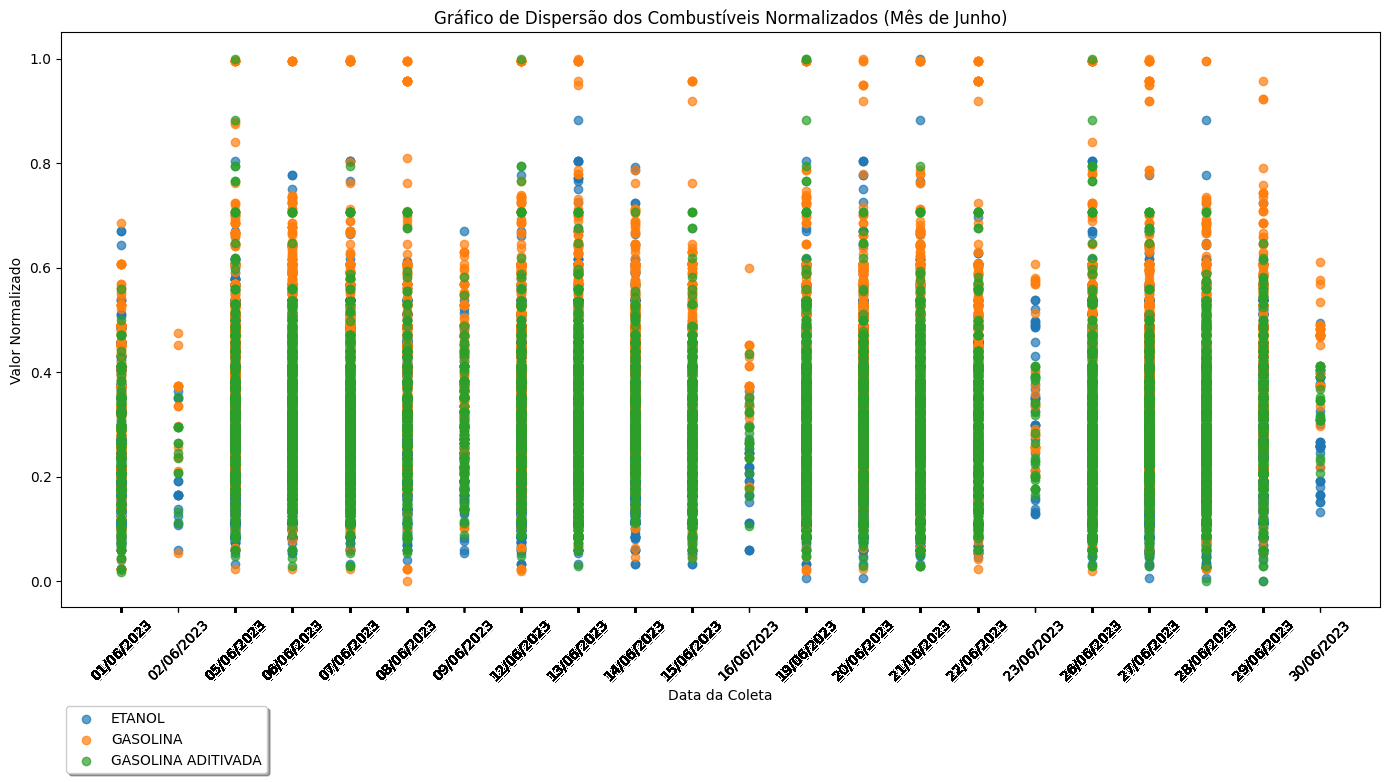

In [ ]:
#Lista de vombustiveis
combustiveis = ["ETANOL", "GASOLINA", "GASOLINA ADITIVADA"]

# Normalização usando MinMaxScaler
scaler = MinMaxScaler()

# Plot do gráfico de dispersão para cada combustível
fig, ax = plt.subplots(figsize=(14, 8))
for combustivel in combustiveis:
    df_produto = junho[junho["Produto"] == combustivel].copy()  # Copie o DataFrame para evitar o SettingWithCopyWarning
    df_produto["Valor Normalizado"] = scaler.fit_transform(df_produto[["Valor de Venda"]])
    ax.scatter(df_produto["Data da Coleta"], df_produto["Valor Normalizado"], label=combustivel, alpha=0.7)

ax.set_xlabel("Data da Coleta")
ax.set_ylabel("Valor Normalizado")
ax.set_title("Gráfico de Dispersão dos Combustíveis Normalizados (Mês de Junho)")

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.08, -0.16), fancybox=True, shadow=True, ncol=1)
plt.xticks(df_produto["Data da Coleta"][::5], rotation=45)
plt.tight_layout()
plt.show()

#####>>>>> Maio

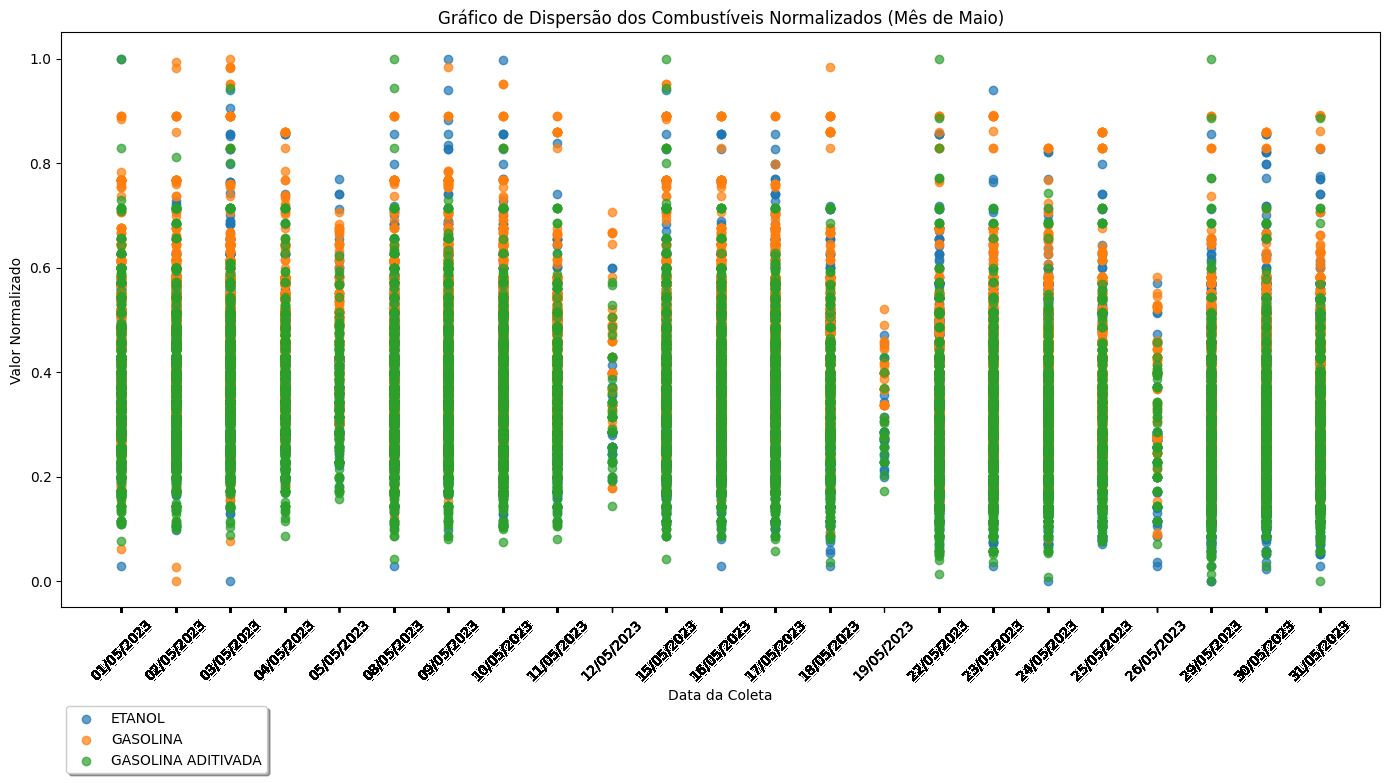

In [ ]:
#Lista de combustiveis
combustiveis = ["ETANOL", "GASOLINA", "GASOLINA ADITIVADA"]

# Normalização usando MinMaxScaler
scaler = MinMaxScaler()

# Plot do gráfico de dispersão para cada combustível
fig, ax = plt.subplots(figsize=(14, 8))
for combustivel in combustiveis:
    df_produto = maio[maio["Produto"] == combustivel].copy()  # Copie o DataFrame para evitar o SettingWithCopyWarning
    df_produto["Valor Normalizado"] = scaler.fit_transform(df_produto[["Valor de Venda"]])
    ax.scatter(df_produto["Data da Coleta"], df_produto["Valor Normalizado"], label=combustivel, alpha=0.7)

ax.set_xlabel("Data da Coleta")
ax.set_ylabel("Valor Normalizado")
ax.set_title("Gráfico de Dispersão dos Combustíveis Normalizados (Mês de Maio)")
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.08, -0.16), fancybox=True, shadow=True, ncol=1)
plt.xticks(df_produto["Data da Coleta"][::5], rotation=45)
plt.tight_layout()
plt.show()

### >>>Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol, da gasolina e gasolina aditivada tiveram uma tendência de alta ou diminuição?

####>>>> Média diaria do preço dos combustiveis Junho.

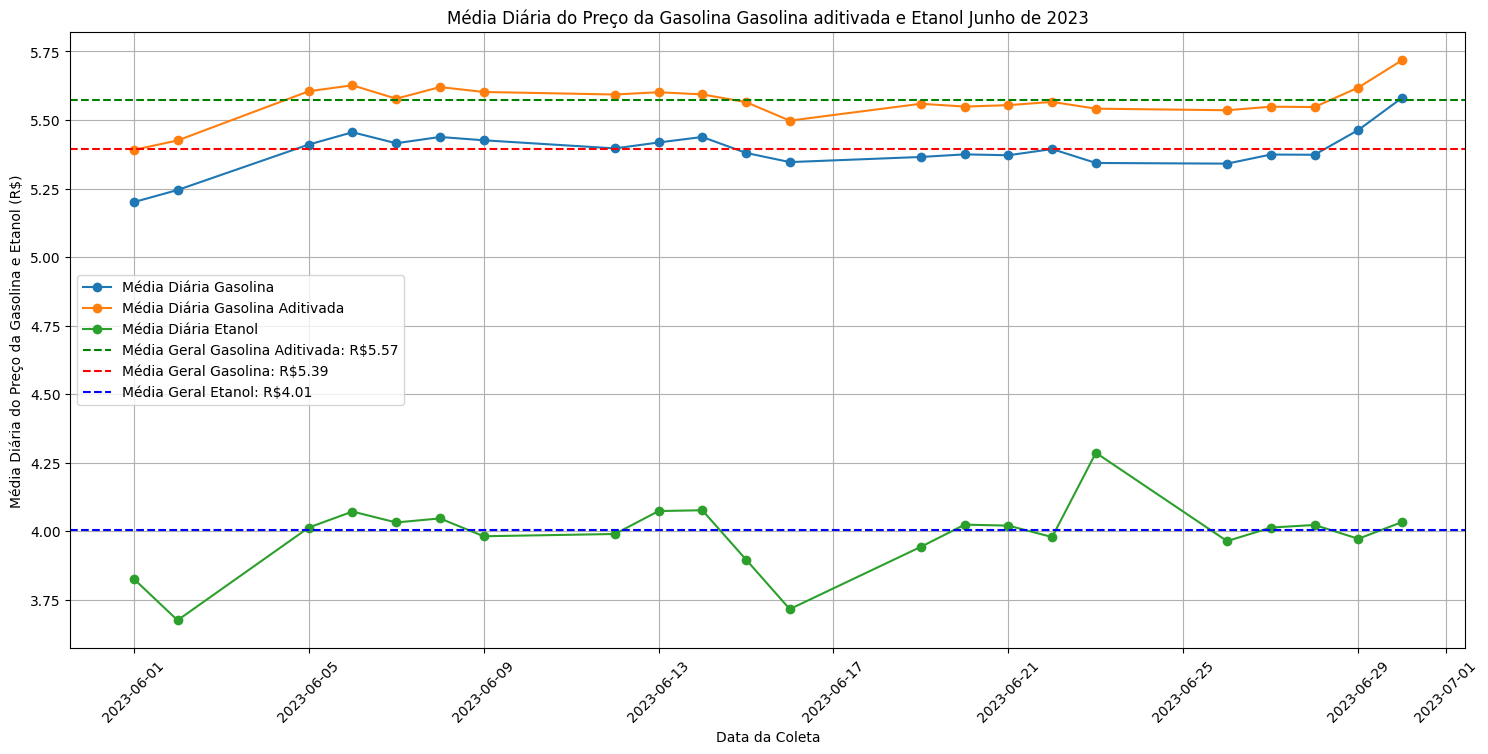

In [ ]:
junho['Data da Coleta'] = pd.to_datetime(junho['Data da Coleta'], format='%d/%m/%Y')

df_etanol_junho = junho[junho['Produto'] == 'ETANOL']
media_diaria_etanol_junho = df_etanol_junho.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_junho = junho[junho['Produto'] == 'GASOLINA']
media_diaria_gasolina_junho = df_gasolina_junho.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_adt_junho = junho[junho['Produto'] == 'GASOLINA ADITIVADA']
media_diaria_gasolina_adt_junho = df_gasolina_adt_junho.groupby('Data da Coleta')['Valor de Venda'].mean()

plt.figure(figsize=(18, 8))
plt.plot(media_diaria_gasolina_junho.index, media_diaria_gasolina_junho, marker='o', linestyle='-')

plt.plot(media_diaria_gasolina_adt_junho.index, media_diaria_gasolina_adt_junho, marker='o', linestyle='-')

plt.plot(media_diaria_etanol_junho.index, media_diaria_etanol_junho, marker='o', linestyle='-')

plt.xlabel('Data da Coleta')
plt.ylabel('Média Diária do Preço da Gasolina e Etanol (R$)')
plt.title('Média Diária do Preço da Gasolina Gasolina aditivada e Etanol Junho de 2023')
plt.grid(True)
plt.xticks(rotation=45)
media_geral_gasolina_junho = df_gasolina_junho['Valor de Venda'].mean()
media_diaria_gasolina_adt_junho = df_gasolina_adt_junho['Valor de Venda'].mean()

media_geral_etanol_junho = df_etanol_junho['Valor de Venda'].mean()
media_geral_gasolina = df_gasolina_junho['Valor de Venda'].mean()
media_geral_gasolina_adt = df_gasolina_adt_junho['Valor de Venda'].mean()

media_geral_etanol = df_etanol_junho['Valor de Venda'].mean()
# linha de tendência ao gráfico
plt.axhline(y=media_diaria_gasolina_adt_junho, color='g', linestyle='--', label=f'Média Diária Gasolina Aditivada')

plt.axhline(y=media_geral_gasolina_junho, color='r', linestyle='--', label=f'Média Diária Gasolina')

plt.axhline(y=media_geral_etanol_junho, color='b', linestyle='--', label=f'Média Geral Etanol')

# Adicionar a legenda dentro do gráfico
legenda_fora = plt.legend(['Média Diária Gasolina', 'Média Diária Gasolina Aditivada','Média Diária Etanol',f'Média Geral Gasolina Aditivada: R${media_geral_gasolina_adt:.2f}',f'Média Geral Gasolina: R${media_geral_gasolina:.2f}', f'Média Geral Etanol: R${media_geral_etanol:.2f}'], loc='center left')

plt.show()


- Em Junho teve uma leve tendencia de alta, podemos observar que o preço iniciou abaixo da média e terminou o mês acima da média geral em todos os combustivéis e podemos observar que etanol acompanha a gasolina mais podemos observar melhor no grafico com a correlção dos valores

---

####>>>> Média diaria dos preços dos combustiveis Maio.

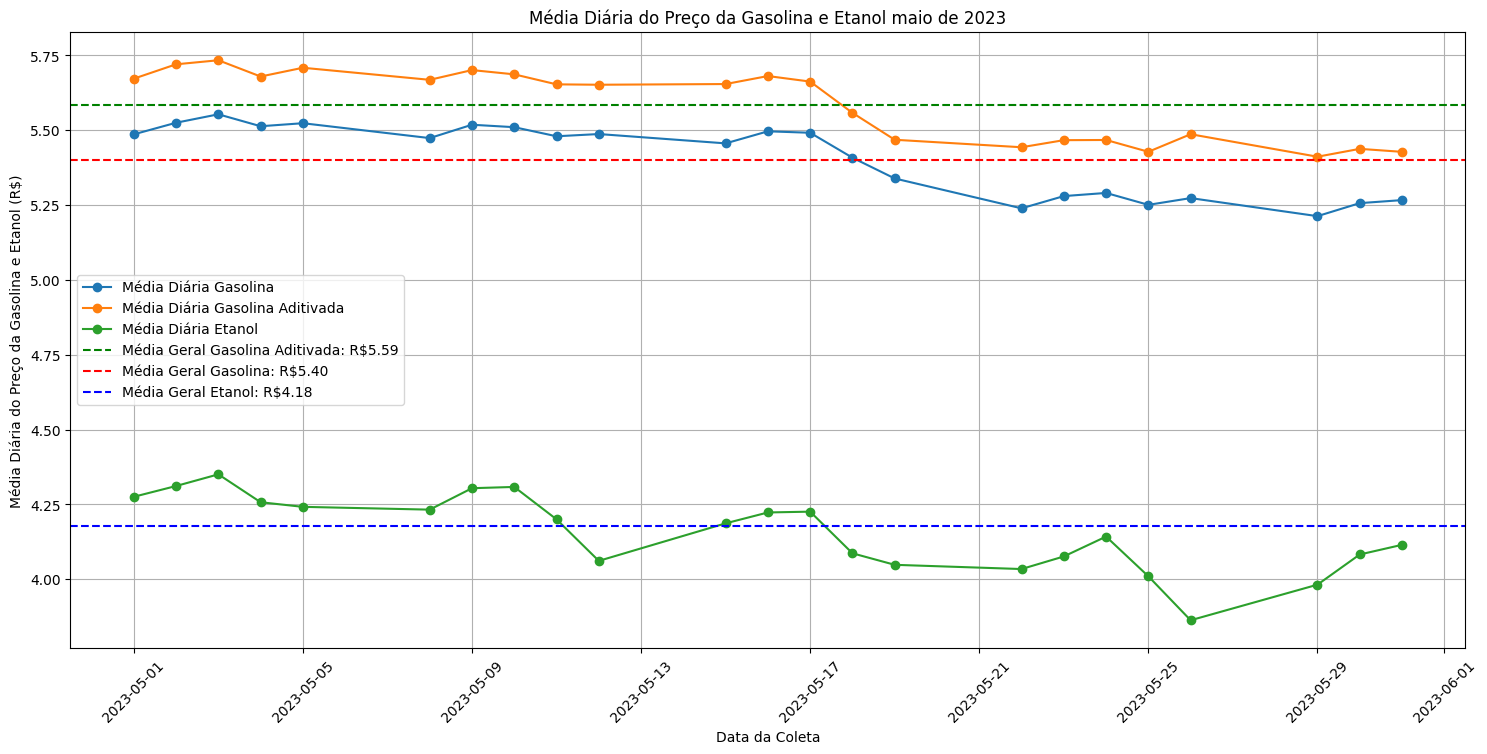

In [ ]:
maio['Data da Coleta'] = pd.to_datetime(maio['Data da Coleta'], format='%d/%m/%Y')

df_etanol_maio = maio[maio['Produto'] == 'ETANOL']
media_diaria_etanol_maio = df_etanol_maio.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_maio = maio[maio['Produto'] == 'GASOLINA']
media_diaria_gasolina_maio = df_gasolina_maio.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_adt_maio = maio[maio['Produto'] == 'GASOLINA ADITIVADA']
media_diaria_gasolina_adt_maio = df_gasolina_adt_maio.groupby('Data da Coleta')['Valor de Venda'].mean()

plt.figure(figsize=(18, 8))
plt.plot(media_diaria_gasolina_maio.index, media_diaria_gasolina_maio, marker='o', linestyle='-')

plt.plot(media_diaria_gasolina_adt_maio.index, media_diaria_gasolina_adt_maio, marker='o', linestyle='-')

plt.plot(media_diaria_etanol_maio.index, media_diaria_etanol_maio, marker='o', linestyle='-')

plt.xlabel('Data da Coleta')
plt.ylabel('Média Diária do Preço da Gasolina e Etanol (R$)')
plt.title('Média Diária do Preço da Gasolina e Etanol maio de 2023')
plt.grid(True)
plt.xticks(rotation=45)
media_geral_gasolina_maio = df_gasolina_maio['Valor de Venda'].mean()
media_diaria_gasolina_adt_maio = df_gasolina_adt_maio['Valor de Venda'].mean()

media_geral_etanol_maio = df_etanol_maio['Valor de Venda'].mean()
media_geral_gasolina = df_gasolina_maio['Valor de Venda'].mean()
media_geral_gasolina_adt = df_gasolina_adt_maio['Valor de Venda'].mean()

media_geral_etanol = df_etanol_maio['Valor de Venda'].mean()
# linha de tendência ao gráfico
plt.axhline(y=media_diaria_gasolina_adt_maio, color='g', linestyle='--', label=f'Média Diária Gasolina Aditivada')

plt.axhline(y=media_geral_gasolina_maio, color='r', linestyle='--', label=f'Média Diária Gasolina')

plt.axhline(y=media_geral_etanol_maio, color='b', linestyle='--', label=f'Média Geral Etanol')

# Adicionar a legenda dentro do gráfico
legenda_fora = plt.legend(['Média Diária Gasolina', 'Média Diária Gasolina Aditivada','Média Diária Etanol',f'Média Geral Gasolina Aditivada: R${media_geral_gasolina_adt:.2f}',f'Média Geral Gasolina: R${media_geral_gasolina:.2f}', f'Média Geral Etanol: R${media_geral_etanol:.2f}'], loc='center left')

plt.show()


- Em Maio teve uma leve tendencia de baixa, podemos observar que o preço iniciou acima da média e terminou o mês abaixo da média geral em todos os combustivéis e podemos observar que etanol acompanha a gasolina mais podemos observar melhor no grafico com a correlção dos valores

#### >>>>Correlação gasolina, gasolina aditivada e tanol no mês Junho

In [ ]:
# Filtrar o dataframe de junho para incluir apenas os registros dos combustíveis
cobustiveis_df = junho[junho['Produto'].isin(['GASOLINA ADITIVADA', 'ETANOL', 'GASOLINA'])]


# Agrupar os dados pela data da coleta e pelo produto e calcular a média dos valores de venda
media_diaria_combustiveis_df = cobustiveis_df.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().unstack()

# Calcular a correlação entre os combustíveis
correlacao = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['ETANOL'])
correlacao2 = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['GASOLINA'])
correlacao3 = media_diaria_combustiveis_df['GASOLINA'].corr(media_diaria_combustiveis_df['ETANOL'])


print(f"Correlação entre GASOLINA ADITIVADA e ETANOL: {correlacao}")
print(25*"***")
print(f"Correlação entre GASOLINA ADITIVADA e GASOLINA: {correlacao2}")
print(25*"***")
print(f"Correlação entre GASOLINA e ETANOL: {correlacao3}")
print(25*"***")
media_diaria_combustiveis_df

Correlação entre GASOLINA ADITIVADA e ETANOL: 0.5805285759150302
***************************************************************************
Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.9797443301491561
***************************************************************************
Correlação entre GASOLINA e ETANOL: 0.49652676139450486
***************************************************************************


Produto           ETANOL  GASOLINA  GASOLINA ADITIVADA
Data da Coleta                                        
2023-06-01      3.826259  5.200629            5.391076
2023-06-02      3.675333  5.244667            5.425385
2023-06-05      4.013458  5.410507            5.604951
2023-06-06      4.071839  5.455382            5.626694
2023-06-07      4.032023  5.415266            5.577719
2023-06-08      4.046817  5.438144            5.620181
2023-06-09      3.981739  5.426090            5.602321
2023-06-12      3.989983  5.396446            5.593055
2023-06-13      4.073669  5.418045            5.601391
2023-06-14      4.076568  5.438135            5.593428
2023-06-15      3.896614  5.380016            5.565222
2023-06-16      3.716000  5.346538            5.497727
2023-06-19      3.943287  5.365250            5.559324
2023-06-20      4.024078  5.374691            5.549044
2023-06-21      4.020507  5.371499            5.554246
2023-06-22      3.978781  5.394016            5.566129
2023-06-23      4.286176  5.343333            5.541429
2023-06-26      3.963998  5.340921            5.535691
2023-06-27      4.013278  5.374029            5.548573
2023-06-28      4.023002  5.373267            5.547356
2023-06-29      3.972529  5.463382            5.618308
2023-06-30      4.033333  5.580769            5.718000

1. Correlação entre GASOLINA ADITIVADA e ETANOL: 0.58
   Esta correlação indica uma relação moderadamente positiva entre os preços da gasolina aditivada e do etanol. Os valores sugerem que, em média, quando os preços da gasolina aditivada aumentam, os preços do etanol também tendem a aumentar
---
2. Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.97
   Aqui, observamos uma correlação muito forte e positiva entre os preços da gasolina aditivada e da gasolina comum. Isso indica que esses preços dois tipos de gasolina estão altamente relacionados.
---
3. Correlação entre GASOLINA e ETANOL: 0.49
   A correlação entre os preços da gasolina e do etanol é moderada e positiva. Isso sugere que, em média, os preços da gasolina têm uma relação de aumento ou diminuição com os preços do etanol. No entanto, a relação não é tão forte



####>>>> Correlação gasolina, gasolina aditivada e tanol no mês maio

In [ ]:
# Filtrar o dataframe de maio para incluir apenas os registros dos combustíveis
cobustiveis_df = maio[maio['Produto'].isin(['GASOLINA ADITIVADA', 'ETANOL', 'GASOLINA'])]


# Agrupar os dados pela data da coleta e pelo produto e calcular a média dos valores de venda
media_diaria_combustiveis_df = cobustiveis_df.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().unstack()

# Calcular a correlação entre os combustíveis
correlacao4 = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['ETANOL'])
correlacao5 = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['GASOLINA'])
correlacao6 = media_diaria_combustiveis_df['GASOLINA'].corr(media_diaria_combustiveis_df['ETANOL'])

correlacao6 = media_diaria_combustiveis_df['GASOLINA'].corr(media_diaria_combustiveis_df['ETANOL'])


In [ ]:
print(f"Correlação entre GASOLINA ADITIVADA e ETANOL: {correlacao4}")
print(25*"***")
print(f"Correlação entre GASOLINA ADITIVADA e GASOLINA: {correlacao5}")
print(25*"***")
print(f"Correlação entre GASOLINA e ETANOL: {correlacao6}")
print(25*"***")
media_diaria_combustiveis_df

Correlação entre GASOLINA ADITIVADA e ETANOL: 0.8346884562596616
***************************************************************************
Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.9880017572873078
***************************************************************************
Correlação entre GASOLINA e ETANOL: 0.8406511702958656
***************************************************************************


Produto           ETANOL  GASOLINA  GASOLINA ADITIVADA
Data da Coleta                                        
2023-05-01      4.275692  5.486517            5.672497
2023-05-02      4.311716  5.525288            5.720500
2023-05-03      4.350719  5.553485            5.734016
2023-05-04      4.257511  5.513592            5.679676
2023-05-05      4.242093  5.523692            5.708973
2023-05-08      4.232767  5.473995            5.668641
2023-05-09      4.304372  5.518595            5.701174
2023-05-10      4.308635  5.510410            5.686959
2023-05-11      4.200355  5.480055            5.653517
2023-05-12      4.061628  5.487500            5.652222
2023-05-15      4.186991  5.456358            5.654523
2023-05-16      4.223354  5.496647            5.681262
2023-05-17      4.226042  5.491780            5.662762
2023-05-18      4.086917  5.408503            5.558327
2023-05-19      4.048438  5.339091            5.468421
2023-05-22      4.034318  5.239319            5.443407
2023-05-23      4.076362  5.280220            5.467042
2023-05-24      4.142770  5.290745            5.467671
2023-05-25      4.010089  5.250975            5.428255
2023-05-26      3.863235  5.273514            5.486923
2023-05-29      3.982059  5.213201            5.411770
2023-05-30      4.082913  5.256675            5.438024
2023-05-31      4.115199  5.266809            5.428071

1. Correlação entre GASOLINA ADITIVADA e ETANOL: 0.83
Há uma correlação forte e positiva entre os preços da gasolina aditivada e do etanol. Isso sugere que, em geral, quando os preços da gasolina aditivada aumentam, os preços do etanol também tendem a subir.
---
2. Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.99
Observamos uma correlação quase perfeita entre os preços da gasolina aditivada e da gasolina comum. Esses dois tipos de gasolina têm uma relação extremamente próxima em termos de variação do preços.
---
3. Correlação entre GASOLINA e ETANOL: 0.84
Há uma correlação forte e positiva entre os preços da gasolina e do etanol. Isso indica que, em média, os preços da gasolina estão intimamente ligados aos preços do etanol, com tendências semelhantes de aumento ou diminuição.









---


## <font color = blueligh>  **>> Análise de média de preços por estado e região, nas três categorias de combustiveis <<<<<**
>- Faremos uma análise de média de valores em relação aos estados brasileiros e suas regiões.

### **>>> Ajustando os dados:**
>- O dataset br_uf esta lendo os dados e localização dos estados brasileiros por cordenadas da biblioteca geobr.
    >- Usaremos o head(), para poder vizualizar como está organizado o dataset

In [ ]:
# trazendo a geobr que para gerar os mapas
br_uf = geobr.read_state()
br_uf.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...

>- Atraves dessa visualização, conseguimos perceber que sera usada a coluna 'abbrev_state' e 'name_region' para fazer o merge e obter o dataset que sera usado para plotar o gráfico mapa.





-> Aqui usamos o dataset Junho, e ajustamos os dados para a pesquisa e analise que sera feita em relação aos estados
 >- O df_ajuste vai ter as colunas renomeadas para facilitar o merge com o br_uf e para faciliar a analise referente aos estados e regioões.

In [ ]:
# df_ajuste sera usado para selecionar o necessário, renomeando as colunas
df_ajuste = junho
df_ajuste.columns=['name_region','abbrev_state','nome_munic','prod_combust','dt_coleta','val_litro','unid_medid','bandeira']
df_ajuste

name_region abbrev_state    nome_munic        prod_combust  dt_coleta  \
0              NE           BA         IRECE              ETANOL 2023-06-01   
1              NE           BA         IRECE            GASOLINA 2023-06-01   
2              NE           BA  SIMOES FILHO              ETANOL 2023-06-01   
3              NE           BA  SIMOES FILHO  GASOLINA ADITIVADA 2023-06-01   
4              NE           BA  SIMOES FILHO            GASOLINA 2023-06-01   
...           ...          ...           ...                 ...        ...   
49036          NE           BA      CAMACARI            GASOLINA 2023-06-30   
49037          NE           BA      CAMACARI              ETANOL 2023-06-30   
49038          NE           BA      CAMACARI  GASOLINA ADITIVADA 2023-06-30   
49039          NE           BA      CAMACARI            GASOLINA 2023-06-30   
49040          NE           BA      CAMACARI            GASOLINA 2023-06-30   

       val_litro  unid_medid       bandeira  
0           4.31  R$ / litro  VIBRA ENERGIA  
1           5.39  R$ / litro  VIBRA ENERGIA  
2           4.19  R$ / litro  VIBRA ENERGIA  
3           5.36  R$ / litro  VIBRA ENERGIA  
4           5.29  R$ / litro  VIBRA ENERGIA  
...          ...         ...            ...  
49036       5.64  R$ / litro         BRANCA  
49037       4.44  R$ / litro         BRANCA  
49038       5.64  R$ / litro         BRANCA  
49039       5.64  R$ / litro         BRANCA  
49040       6.00  R$ / litro       IPIRANGA  

[49041 rows x 8 columns]

-> Aqui as siglas das regiões serão renomeadas de acordo com o dataser br_uf, e assim facilitar o agrupamento por região

In [ ]:
# renomeando as siglas das regioes usando replace e visualizando
df_ajuste['name_region'].replace(['N','S','SE','NE','CO'],['Norte','Sul','Sudeste','Nordeste','Centro Oeste'], inplace =True)
df_ajuste['name_region'].unique()

array(['Nordeste', 'Sudeste', 'Centro Oeste', 'Norte', 'Sul'],
      dtype=object)

 - formatando a coluna dt_coleta para uma melhor vizualisação

In [ ]:
# os valores na coluna 'dt_coleta' no formato 'ano/mes/dia'
df_ajuste['dt_coleta'] = pd.to_datetime(df_ajuste['dt_coleta'], format='%Y/%m/%d')

# Colocando no formato dia/mês/ano
df_ajuste['dt_coleta'] = df_ajuste['dt_coleta'].dt.strftime('%d/%m/%Y')

df_ajuste.head()

name_region abbrev_state    nome_munic        prod_combust   dt_coleta  \
0    Nordeste           BA         IRECE              ETANOL  01/06/2023   
1    Nordeste           BA         IRECE            GASOLINA  01/06/2023   
2    Nordeste           BA  SIMOES FILHO              ETANOL  01/06/2023   
3    Nordeste           BA  SIMOES FILHO  GASOLINA ADITIVADA  01/06/2023   
4    Nordeste           BA  SIMOES FILHO            GASOLINA  01/06/2023   

   val_litro  unid_medid       bandeira  
0       4.31  R$ / litro  VIBRA ENERGIA  
1       5.39  R$ / litro  VIBRA ENERGIA  
2       4.19  R$ / litro  VIBRA ENERGIA  
3       5.36  R$ / litro  VIBRA ENERGIA  
4       5.29  R$ / litro  VIBRA ENERGIA

###>>> Funções utilizadas para um melhor reaproveitamento do código


--> Func_percentual_variac  
 - Funçao usada para coletar as médias de preços no primeiro e ultimo dia do mês, e asim obter o percentual de variação médio nacional.

In [ ]:
def func_percentual_variac(df_mes):
# Calcular a média de preços para o primeiro dia de junho
  preco_media_primeiro_dia = df_mes[df_mes['dt_coleta'] == df_mes['dt_coleta'].min()]['val_litro'].mean()

# Calcular a média de preços para o último dia de junho
  preco_media_ultimo_dia = df_mes[df_mes['dt_coleta'] == df_mes['dt_coleta'].max()]['val_litro'].mean()
  preco_medio_mes = df_mes['val_litro'].mean()
# Calcular a variação e o percentual de variação
  variacao = preco_media_ultimo_dia - preco_media_primeiro_dia
  percentual_variacao = (variacao / preco_media_primeiro_dia) * 100
  s_percentual = pd.DataFrame([[preco_media_primeiro_dia, preco_media_ultimo_dia, preco_medio_mes, variacao, percentual_variacao]],
                         columns =['med_prim_dia','med_ult_dia', 'med_mes', 'variac', 'perc_variac'])

  print('*'*55)
  print(f'Média de Preço Nacional no Primeiro Dia: {preco_media_primeiro_dia :.2f} R$/litro')
  print('*'*55)
  print(f"Média de Preço Nacional no Último Dia: {preco_media_ultimo_dia:.2f} R$/litro")
  print('*'*55)
  print(f'Média do Preço Nacional do mes: {preco_medio_mes:.2f} R$/litro')
  print('*'*55)
  print(f"Variação da média: {variacao:.2f}")
  print('*'*55)
  print(f"Percentual de Variação da Média: {percentual_variacao:.2f} %")

  return s_percentual


--> Função func_agrupa_media
   - função usada para agrupar o valor da venda e calcular a média, usada para filtrar a média por estado e por região, usada nas três categorias de combutivel.

In [ ]:
#funçao agrupa media por estado
def func_agrupa_media (df,coluna_agrup,nome_coluna):
  df_agrupa_media= df.groupby(coluna_agrup)['val_litro'].mean()
  df_agrupa_media= df_agrupa_media.rename (nome_coluna)
  return df_agrupa_media

--> Função func_print_ordem
   - função usada para printar a média de preços em ordem decrescente dos estados,  usado na analise das três categorias de combustivel.

In [ ]:
#funçao para printar a ordem de valores de media
def func_print_ordem(df,var_combust,mes):
  df_ordem = df.sort_values(ascending=False)
  print (f'Os estados estão ordenados pela média mais alta no valor do {var_combust} no mês de {mes}')
  for i, (uf, valor) in enumerate(df_ordem.items(), start=1):
     print ('*'*50)
     print (f'o estado do {uf} é o {i}º com média de R$ {valor:.2f} /litro')

--> Função func_print_ordem_reg
   - função usada para printar a média de valores em ordem decrescente por região, nas três categorias de combustivel.

In [ ]:
#funçao para gerar o print com a ordem por regiao
def func_print_ordem_reg(df,var_combust,mes):
  df_ordem_reg = df.sort_values(ascending=False)
  print (f'Os estados estão ordenados pela média mais alta no valor de {var_combust} no mês de {mes}')
  for i, (rg, valor) in enumerate(df_ordem_reg.items(), start=1):
       print ('*'*50)
       print (f'A região do {rg} é a {i}º com média de {valor:.2f} R$/litro')

--> Funcão add_region_labels
 - Funçao usada para nomear as regiões brasileiras, posicionar o texte dentro do gráfico mapa, teve que ser usada uma condição para cada posição texto.

In [ ]:
# funçao para colocar o nome nas regiões brasileiras e ajustar os parametros do texto
def add_region_labels(ax, geometries, label_column):
    region_labels = {}  # Dicionário para manter o nome da região único
    for idx, row in geometries.iterrows():
        region_name = row[label_column]
        if region_name not in region_labels:
            region_geometry = row['geometry']
            bbox = region_geometry.bounds  # Bounding box da região
            x_center = (bbox[0] + bbox[2]) / 2  # Ponto x no centro da bounding box
            y_center = (bbox[1] + bbox[3]) / 2  # Ponto y no centro da bounding box
            if region_name =='Norte':
                y_offset = 6
                ax.text(x_center, y_center + y_offset, region_name, fontsize=12, ha='center', va='center')
            elif region_name =='Nordeste':
                y_offset = 1
                x_offset = 3
                ax.text(x_center + x_offset, y_center -y_offset, region_name, fontsize=12, ha='center', va='center')
            elif region_name == 'Sul':
                y_offset = 4
                x_offset = 1
                ax.text(x_center - x_offset, y_center - y_offset, region_name, fontsize=12, ha='center', va='center')
            elif region_name == 'Centro Oeste':
                y_offset = 4
                x_offset = 1
                ax.text(x_center - x_offset, y_center + y_offset, region_name, fontsize=12, ha='center', va='center')
            else:
               y_offset = 0
               x_offset = 0
               ax.text(x_center - x_offset, y_center + y_offset, region_name, fontsize=12, ha='center', va='center')
            region_labels[region_name]=True

--> Função add_state_labels
 - Usada para nomear os estado colocando a sigla de cada sobre o mapa.

In [ ]:
# função para colocar os nomes dos estados usada na função que gera os gráficos
def add_state_labels(ax, geometries, label_column):
    for idx, row in geometries.iterrows():
        state_name = row[label_column]
        state_geometry = row['geometry']
        centroid = state_geometry.centroid
        ax.text(centroid.x, centroid.y, state_name, fontsize=10, ha='center', va='center')

--> Função func_gerar_mapa
   - função usada para plotar o mapa do Brasil, e colorir de acordo com a média de valores em ordem decrescente de estados e de região, nas três categorias de combustivel.

In [ ]:
# funçao para gerar o mapa

def func_gerar_mapa(df_mapa, coluna_valor, titulo_map,label_column,vari_percentual):
  f, ax = plt.subplots()
  f.set_size_inches(10, 10)
  df_mapa.plot(
    ax=ax,                              # Axis de destino do gráfico
    column=coluna_valor,  # Coluna com os valores usados para colorir o mapa
    edgecolor='0.8',
    cmap="Blues",                      # Mapa de cores                  # Cor dos contornos
    linewidth=0.35,                     # Espessura dos contornos
  )
  if label_column== 'abbrev_state':
    add_state_labels(ax, br_uf, label_column)
  else:
    add_region_labels(ax, br_uf, label_column)
# Adiciona escala Colorbar (https://stackoverflow.com/a/36080553)
# Cria um Axis usado para fazer o Colorbar
  cax = f.add_axes(
      [
        0.82,    # posicao x (entre 0.0 e 1.0)
        0.18,    # posicao y (entre 0.0 e 1.0)
        0.03,    # largura x
        0.40,    # altura y
    ]
  )

  sm = plt.cm.ScalarMappable(
    cmap="Blues",               # Usa o mesmo cmap do mapa
    norm=plt.Normalize(
        vmin=df_mapa[coluna_valor].min(),  # Valor mínimo
        vmax=df_mapa[coluna_valor].max(),  # Valor máximo
    ),
  )
  # Põe o Axis com Colorbar na mesma figura do mapa
  f.colorbar(
      sm,
      cax=cax,
      label="-->-->-->-->",
    # Formata a escala do Colorbar
       format=ticker.FuncFormatter(lambda x, pos: f"{x*1: >5,.2f} R$ /litro"),
  )
  #plt.legend(['Média Diária Gasolina'],loc='upper left')
  ax.set_title(titulo_map,
               fontdict={"fontsize": 15,
                         "color": "blue", "weight": "bold"},pad=20)
  sub_titulo = "Média por litro"
  ax.text(0.5, 1, sub_titulo, fontsize=12,
          ha='center', va='center', transform=ax.transAxes
  )

  f.text(
    0.15,                  # Posição x
    0.20,                  # Posição y
    "Fonte:ANP(2023)."  # Texto
  )

# Valores  para percentual e variação
  percentual = vari_percentual.loc[0]['perc_variac']
  prim_med=vari_percentual.loc[0]['med_prim_dia']
  ult_med=vari_percentual.loc[0]['med_ult_dia']
  med_mes=vari_percentual.loc[0]['med_mes']


# Cria um subplot para o mini mapa e informações

  mini_map_ax = f.add_axes(
    [
        0.15,    # posicao x (entre 0.0 e 1.0)
        0.25,    # posicao y (entre 0.0 e 1.0)
        0.25,    # largura x
        0.16,    # altura y
    ]
    # ... Seu código anterior para criar o mini mapa e o texto ...
)
  df_mapa.plot(ax=mini_map_ax, color='lightblue', edgecolor='black')
  if label_column== 'abbrev_state':
     mini_map_ax.text(
       -55, 8, f"Nacional \nMédia 1° dia do mês: {prim_med:.2f}\nMédia do 30° dia do mês: {ult_med:.2f}\nMédia do mês: {med_mes:.2f}",
             fontsize=10, color="black", ha='center',
)
  else:
    mini_map_ax.text(
     -55, 8, f"Percentual médio de variaçao\n no Brasil: {percentual:.2f}%\n", fontsize=10, color="black", ha='center',
)

# Remove os eixos do mini mapa
  mini_map_ax.set_axis_off()
  ax.axis("off")          # Rem



--> Função func_correlacao_bandeira
   - função usada para printar o resultados das correlações entre os combustiveis filtrados pelas bandeiras e um pequeno gráfico para uma melhor vizualisação

In [ ]:
def func_correlacao_bandeira(df_gasolina, df_gasolina_adt, df_etanol, mes, posto):

  for bandeira in (posto):
    cor_gas_etan= df_etanol[bandeira].corr(df_gasolina[bandeira])
    cor_eta_gas_adt = df_etanol[bandeira].corr(df_gasolina_adt[bandeira])
    cor_gas_adt_gas = df_gasolina[bandeira].corr(df_gasolina_adt[bandeira])
    print('>>'*50)
    print(f'Correlação gasolina x etanol da bandeira {bandeira} : {cor_gas_etan:.2f} em {mes}')
    print('-'*50)
    print(f'Correlação etanol x gasolina aditivada da bandeira {bandeira} : {cor_eta_gas_adt:.2f} em {mes}')
    print('-'*50)
    print(f'Correlação gasolina x gasolina aditivada da bandeira {bandeira} : {cor_gas_adt_gas:.2f} em {mes}')
    print('-'*50)
    # Crie um gráfico de linha
    tipos_combustivel = ['Gasolina vs Etanol', 'Gasolina vs Gasolina Aditivada', 'Etanol vs Gasolina Aditivada']
    correlacoes = [cor_gas_etan, cor_eta_gas_adt, cor_gas_adt_gas]

    plt.figure(figsize=(10, 2))
    plt.plot(tipos_combustivel, correlacoes, marker='o',color ='red' )
    plt.title(f"Correlações na bandeira {bandeira} - Mês de {mes}")
    plt.xlabel('Tipo de Combustível')
    plt.ylabel('Correlação')
    plt.grid(True)
    plt.show()

-->Função func_mostra_analise_grafico
 - Função que mostra uma analise conjunta dos combustiveis por estado
  

In [ ]:
def func_mostra_analise_grafico(df_mostra_analise_estado):
  data= pd.DataFrame(df_mostra_analise_estado)
  print(data)
# Configuração do gráfico
  plt.figure(figsize=(10, 6))  # Tamanho da figura

# Criação dos gráficos de linha
  for column in df_mostra_analise_estado.columns:
    plt.plot(df_mostra_analise_estado.index, df_mostra_analise_estado[column], marker='o', label=column)


# Configurações do eixo

  plt.xlabel('Estado')
  plt.ylabel('Média')
  plt.title('Media de Combustiveis por Estado')
  plt.legend()


# Exibe o gráfico
  plt.show()


In [ ]:
def func_cor_mpas(cor_gas_eta, cor_gas_gas, cor_eta_gas_adt, mes, regiao):

 df_correlacao = pd.DataFrame([[cor_gas_eta, cor_gas_gas, cor_eta_gas_adt]],
                                  columns=['Gasolina vs Etanol', 'Gasolina vs Gasolina Aditivada', 'Etanol vs Gasolina Aditivada'])

 plt.figure(figsize=(10, 4))
 sns.heatmap(df_correlacao, annot=True, cmap="coolwarm", center=0, fmt=".2f")
 plt.title(f"Mapa de Correlação na Região {regiao} - Mês de {mes}")
 plt.show()


In [ ]:
def func_correlacao_regiao(df_gas,df_eta,df_gas_adt, regiao, mes):
  cor_gas_etan= df_gas[regiao].corr(df_eta[regiao])
  cor_gas_gas_adt= df_gas[regiao].corr(df_gas_adt[regiao])
  cor_eta_gas_adt =df_eta[regiao].corr(df_gas_adt[regiao])
  print ('*'*50)
  print(f'Correlação de gasolina com etanol no mês de {mes} na região {regiao}: {cor_gas_etan:.2f}')
  print ('*'*50)
  print(f'Correlação de gasolina com gasolina aditivada no mês de {mes} na região {regiao}: {cor_gas_gas_adt:.2f}')
  print ('*'*50)
  print(f'Correlação de etanol com gasolina aditivada no mês de {mes} na região {regiao}: {cor_eta_gas_adt:.2f}')
  func_cor_mpas( cor_gas_etan,cor_gas_gas_adt,cor_eta_gas_adt,mes,regiao)

###>>> Junho

#### <font color= bluelight >**>>>> Etanol no mês de Junho**


> - Nessa fase do projeto será feito uma analise sobre o preço do combústivel etanol no mês de Junho/2023;
> - Será feito uma análise do percentual de variação da média dos preços, nível nacional;
> - Calculado a média das cinco regiões e quais tem o valor mais alto;
>- Calculado a média de preços por estado, os estados com maior média;

#####   >>>>> Lendo os dados

In [ ]:
# filtrando o dataset e agrupando os dados do etanol no mês de Junho
df_etanol_junho = df_ajuste[df_ajuste['prod_combust'] == 'ETANOL']
df_etanol_junho['val_litro'].describe()


count    15938.000000
mean         4.006356
std          0.480796
min          2.970000
25%          3.590000
50%          3.930000
75%          4.370000
max          6.730000
Name: val_litro, dtype: float64

#####>>>>> Percentual de Variação Nacional Junho

>- Foi pego a média de preço do primeiro dia do mês e do ultimo dia, foi calculado o percentual de variação da média do mês


In [ ]:
#chama a funçao do percentual de variaçao nacional do etanol em junho
df_percentual= func_percentual_variac(df_etanol_junho)

*******************************************************
Média de Preço Nacional no Primeiro Dia: 3.83 R$/litro
*******************************************************
Média de Preço Nacional no Último Dia: 4.03 R$/litro
*******************************************************
Média do Preço Nacional do mes: 4.01 R$/litro
*******************************************************
Variação da média: 0.21
*******************************************************
Percentual de Variação da Média: 5.41 %


##### >>>>> Municípios com maior valor de preço do etanol em Junho

######>>>>>> Filtrando pelo nome do municipio e consultando por registros nulos

> - carregando o dataframe e verificando a ocorrencia de registros nulos na coluna nome do municipio

In [ ]:
df_etanol_junho[df_etanol_junho['nome_munic'].isnull()].shape[0]

0

>- aqui observamos que não há registros nulos

>- logo verificamos que existe 449 municípios, e a quantidade de registros de cada um

In [ ]:
df_etanol_junho['nome_munic'].value_counts()

SAO PAULO                778
RIO DE JANEIRO           281
FORTALEZA                190
BRASILIA                 183
GOIANIA                  175
                        ... 
MACAPA                     2
CRUZ ALTA                  2
ALEGRETE                   1
ITAITUBA                   1
CONCEICAO DO ARAGUAIA      1
Name: nome_munic, Length: 449, dtype: int64

> - São Paulo tem o maior número de registros 778

In [ ]:
df_etanol_municipio_j =df_etanol_junho.groupby('nome_munic')['val_litro'].max()
df_etanol_municipio_j_ordem = df_etanol_municipio_j.sort_values(ascending=False)
df_etanol_municipio_j_ordem

nome_munic
BAGE                 6.73
SANTA CRUZ DO SUL    5.99
DELMIRO GOUVEIA      5.99
MOSSORO              5.95
CAUCAIA              5.93
                     ... 
BIRIGUI              3.49
VARZEA GRANDE        3.49
ADAMANTINA           3.49
CUIABA               3.49
CAMPO MOURAO         3.49
Name: val_litro, Length: 449, dtype: float64

> - Vericamos então que o município com maior preço de Etanol em Junho
   - Bage com valor de  6.73 reais/litro
> - o município com menor preço de Etanol em Junho:
   - Campo Mourão com 3.49 reais/litro


#####>>>>> Média de Preços por Estado

>- Usando a função func_agrupa_media, para obter as médias do valor do etanol por estado no mes de Junho

In [ ]:
#  chmando a função e agrupando por estado a media do preço do etanol
df_etanol_uf_jun = func_agrupa_media(df_etanol_junho,'abbrev_state','med_etan_uf_ju')
df_etanol_uf_jun

abbrev_state
AC    4.776875
AL    4.529078
AM    4.532800
AP    5.186667
BA    4.380951
CE    4.550434
DF    3.833770
ES    4.428102
GO    3.755829
MA    4.634930
MG    3.737021
MS    3.893391
MT    3.462817
PA    4.650543
PB    4.085798
PE    4.288970
PI    4.316517
PR    4.033835
RJ    4.331780
RN    4.664607
RO    4.923444
RR    5.065000
RS    4.805658
SC    4.623317
SE    4.398241
SP    3.628249
TO    4.530261
Name: med_etan_uf_ju, dtype: float64

##### >>>>> Criando o DataFrame (Mapa)

>- Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_etanol_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_etanol_uf_jun, on ='abbrev_state')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_etan_uf_ju  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...        4.923444  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...        4.776875  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...        4.532800  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...        5.065000  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...        4.650543

#####>>>>> Gráfico Mapa - Estados

>- criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

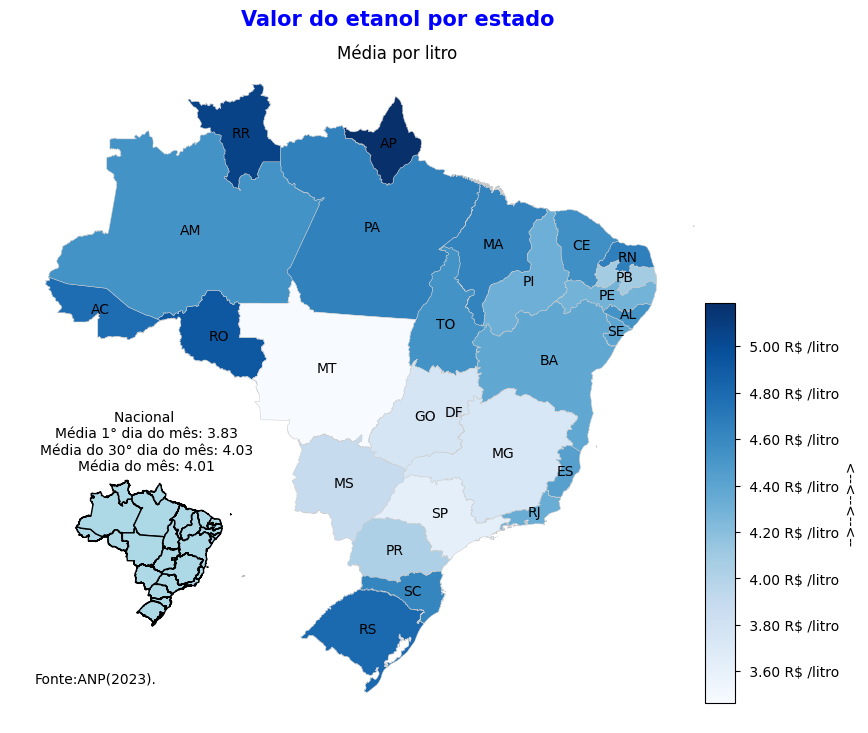

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado e mostrando o mapa com as medias por estado e media nacional
func_gerar_mapa(br_uf_mapa,'med_etan_uf_ju','Valor do etanol por estado','abbrev_state', df_percentual)

#####>>>>> Print Respostas - Estados

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_etanol_uf_jun,'Etanol','Junho')

Os estados estão ordenados pela média mais alta no valor do Etanol no mês de Junho
**************************************************
o estado do AP é o 1º com média de R$ 5.19 /litro
**************************************************
o estado do RR é o 2º com média de R$ 5.07 /litro
**************************************************
o estado do RO é o 3º com média de R$ 4.92 /litro
**************************************************
o estado do RS é o 4º com média de R$ 4.81 /litro
**************************************************
o estado do AC é o 5º com média de R$ 4.78 /litro
**************************************************
o estado do RN é o 6º com média de R$ 4.66 /litro
**************************************************
o estado do PA é o 7º com média de R$ 4.65 /litro
**************************************************
o estado do MA é o 8º com média de R$ 4.63 /litro
**************************************************
o estado do SC é o 9º com média de R$ 4.62 /litro
********

- Aqui selecionamos os cinco estados com média no valor do litro do etanol, mais alto de acordo com os dados em Junho
  >- Amapa esta em primeiro com um valor de R$ 5,19 por litro;

  >- Roraima esta em segundo  com um valor de R$ 5,07 por litro;

  >- Rondonia esta em terceiro com um valor de R$ 4,92 por litro;

  >- Rio Grande do sul esta em quarto com um valor de R$ 4,81 por litro

  >- Acre esta em quinto com um valor de R$ 4,78 por litro

#####>>>>> Média por Região



>- Agrupando o etanol por média por região

In [ ]:
# chamando a funçao e agrupando por regiao
df_etanol_reg_jun = func_agrupa_media(df_etanol_junho,'name_region','med_etan_reg_ju')
df_etanol_reg_jun

name_region
Centro Oeste    3.735889
Nordeste        4.410514
Norte           4.651818
Sudeste         3.787070
Sul             4.348599
Name: med_etan_reg_ju, dtype: float64

#####>>>>> Criando o DataFrame(Mapa) - Região

>- Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_etanol_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_etanol_reg_jun, on ='name_region')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_etan_reg_ju  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...         4.651818  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...         4.651818  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...         4.651818  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...         4.651818  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...         4.651818

#####>>>>> Gráfico Mapa - Região

>- Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

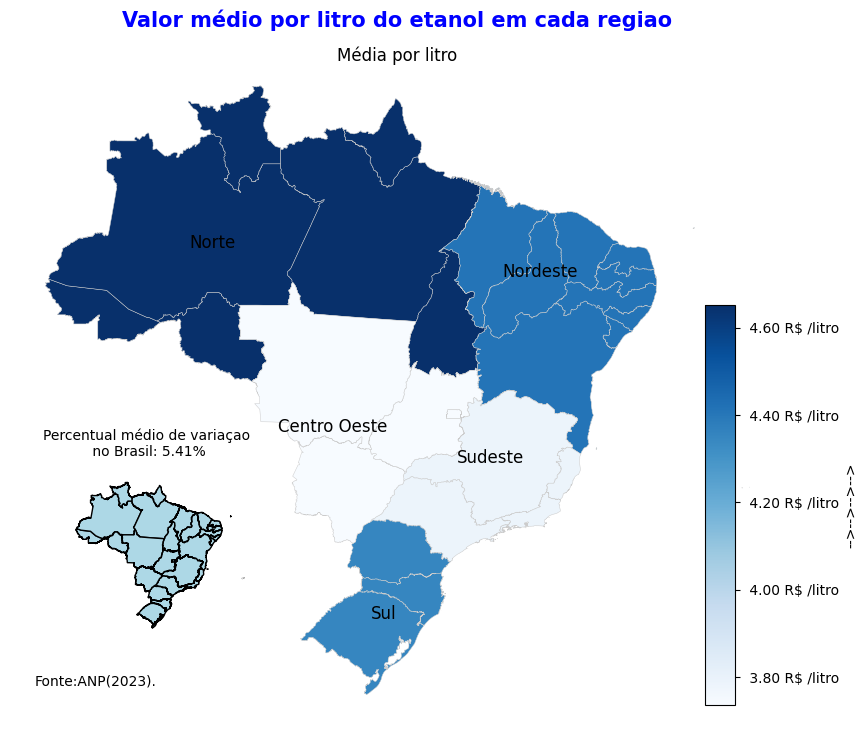

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_etan_reg_ju','Valor médio por litro do etanol em cada regiao','name_region',df_percentual)

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
func_print_ordem_reg(df_etanol_reg_jun,'Etanol','Junho')

Os estados estão ordenados pela média mais alta no valor de Etanol no mês de Junho
**************************************************
A região do Norte é a 1º com média de 4.65 R$/litro
**************************************************
A região do Nordeste é a 2º com média de 4.41 R$/litro
**************************************************
A região do Sul é a 3º com média de 4.35 R$/litro
**************************************************
A região do Sudeste é a 4º com média de 3.79 R$/litro
**************************************************
A região do Centro Oeste é a 5º com média de 3.74 R$/litro


#### <font color= bluelight >**>>>> Gasolina no mês de Junho**
>- Nessa fase do projeto será feito uma analise sobre o preço do combústivel gasolina no mês de Junho/2023;
- Será feito uma análise do percentual de variação da média dos preços, nível nacional;
- Calculado a média das cinco regiões e quais tem o valor mais alto;
- Calculado a média de preços por estado, os estados com maior média;

#####   >>>>> Lendo os dados

In [ ]:
# filtrando o dataset e agrupando os dados do gasolina no mês de Junho
df_gasolina_junho = df_ajuste[df_ajuste['prod_combust'] == 'GASOLINA']
df_gasolina_junho['val_litro'].describe()


count    18686.000000
mean         5.392589
std          0.334964
min          4.430000
25%          5.190000
50%          5.380000
75%          5.590000
max          7.000000
Name: val_litro, dtype: float64

#####>>>>> Percentual de Variação Nacional Junho

>- Foi pego a média de preço do primeiro dia do mês e do ultimo dia, foi calculado o percentual de variação da média do mês


In [ ]:
#chama a funçao do percentual de variaçao nacional do gasolina em junho
df_percentual= func_percentual_variac(df_gasolina_junho)

*******************************************************
Média de Preço Nacional no Primeiro Dia: 5.20 R$/litro
*******************************************************
Média de Preço Nacional no Último Dia: 5.58 R$/litro
*******************************************************
Média do Preço Nacional do mes: 5.39 R$/litro
*******************************************************
Variação da média: 0.38
*******************************************************
Percentual de Variação da Média: 7.31 %


##### >>>>> Municípios com maior valor de preço do Gasolina em Junho

######>>>>>> Filtrando pelo nome do municipio e consultando por registros nulos

> - carregando o dataframe e verificando a ocorrencia de registros nulos na coluna nome do municipio

In [ ]:
df_gasolina_junho[df_gasolina_junho['nome_munic'].isnull()].shape[0]

0

>- aqui observamos que não há registros nulos

In [ ]:
df_gasolina_junho['nome_munic'].value_counts()

SAO PAULO           781
RIO DE JANEIRO      285
BRASILIA            198
FORTALEZA           195
GOIANIA             175
                   ... 
SORRISO               4
PRESIDENTE DUTRA      4
ITAPEVA               4
GOIANA                4
CAETITE               4
Name: nome_munic, Length: 458, dtype: int64

>- logo verificamos que existe 458 municípios, e a quantidade de registros de cada um

> - São Paulo tem o maior número de registros 781

In [ ]:
df_gasolina_municipio_j =df_gasolina_junho.groupby('nome_munic')['val_litro'].max()
df_gasolina_municipio_j_ordem = df_gasolina_municipio_j.sort_values(ascending=False)
df_gasolina_municipio_j_ordem

nome_munic
TEFE            7.00
SAO PAULO       6.99
SANTO ANDRE     6.99
BARUERI         6.99
PARINTINS       6.89
                ... 
ANANINDEUA      5.19
LAJEDO          5.18
CAMPO MOURAO    5.15
ARAGUARI        5.15
GOIANA          4.89
Name: val_litro, Length: 458, dtype: float64

> - Vericamos então que o município com maior preço de Gasolina em Junho
   - Tefe com valor de  7.00 reais/litro
> - o município com menor preço de Gasolina em Junho:
   - Goiana com 4.89 reais/litro


#####>>>>> Média de Preços por Estado

>- Usando a função func_agrupa_media, para obter as médias do valor da gasolina por estado no mes de Junho

In [ ]:
#  chmando a função e agrupando por estado a media do preço do gasolina
df_gasolina_uf_jun = func_agrupa_media(df_gasolina_junho,'abbrev_state','med_gasol_uf_ju')
df_gasolina_uf_jun

abbrev_state
AC    6.099859
AL    5.554126
AM    6.196349
AP    5.032159
BA    5.573506
CE    5.435315
DF    5.425000
ES    5.586825
GO    5.357657
MA    5.270888
MG    5.255166
MS    5.418806
MT    5.390577
PA    5.480069
PB    5.219474
PE    5.420409
PI    5.279953
PR    5.446632
RJ    5.418361
RN    5.709698
RO    5.911519
RR    5.743088
RS    5.429748
SC    5.548600
SE    5.417712
SP    5.261103
TO    5.613514
Name: med_gasol_uf_ju, dtype: float64

##### >>>>> Criando o DataFrame (Mapa)

>- Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_uf_jun, on ='abbrev_state')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_uf_ju  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...         5.911519  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...         6.099859  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...         6.196349  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...         5.743088  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...         5.480069

#####>>>>> Gráfico Mapa - Estados

>- criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

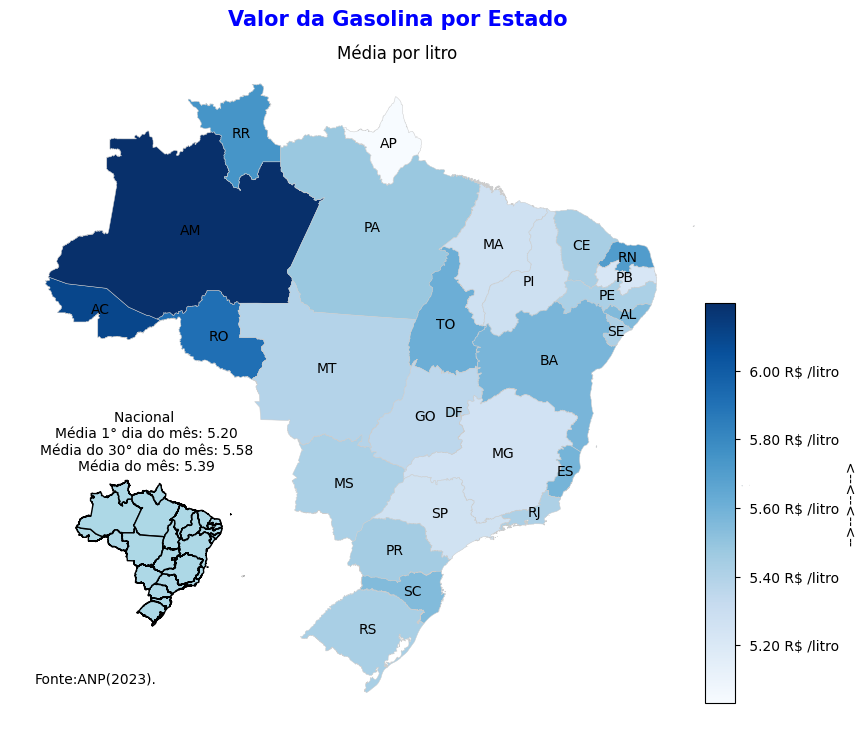

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado e mostrando o mapa com as medias por estado e media nacional
func_gerar_mapa(br_uf_mapa,'med_gasol_uf_ju','Valor da Gasolina por Estado','abbrev_state', df_percentual)

#####>>>>> Print Respostas - Estados

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_gasolina_uf_jun,'Gasolina','Junho')

Os estados estão ordenados pela média mais alta no valor do Gasolina no mês de Junho
**************************************************
o estado do AM é o 1º com média de R$ 6.20 /litro
**************************************************
o estado do AC é o 2º com média de R$ 6.10 /litro
**************************************************
o estado do RO é o 3º com média de R$ 5.91 /litro
**************************************************
o estado do RR é o 4º com média de R$ 5.74 /litro
**************************************************
o estado do RN é o 5º com média de R$ 5.71 /litro
**************************************************
o estado do TO é o 6º com média de R$ 5.61 /litro
**************************************************
o estado do ES é o 7º com média de R$ 5.59 /litro
**************************************************
o estado do BA é o 8º com média de R$ 5.57 /litro
**************************************************
o estado do AL é o 9º com média de R$ 5.55 /litro
******

- Aqui selecionamos os cinco estados com média no preço do litro da gasolina mais alto de acordo com os dados em Junho
  >- Amazonas esta em primeiro com um valor de R$ 6,20 por litro;

 > - Acre esta em segundo  com um valor de R$ 6,10 por litro;

 > - Rondonia esta em terceiro com um valor de R$ 5,91 por litro;

 > - Roraima esta em quarto com um valor de R$ 5,74 por litro

 > - Rio Grande do Norte esta em quinto com um valor de R$ 5,71 por litro

#####>>>>> Média por Região



>- Agrupando gasolina por preço médio e região

In [ ]:
# chamando a funçao e agrupando por regiao
df_gasolina_reg_jun = func_agrupa_media(df_gasolina_junho,'name_region','med_gasol_reg_ju')
df_gasolina_reg_jun

name_region
Centro Oeste    5.383646
Nordeste        5.449496
Norte           5.722751
Sudeste         5.299054
Sul             5.464082
Name: med_gasol_reg_ju, dtype: float64

#####>>>>> Criando o DataFrame(Mapa) - Região

>- Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_reg_jun, on ='name_region')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_reg_ju  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...          5.722751  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...          5.722751  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...          5.722751  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...          5.722751  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...          5.722751

#####>>>>> Gráfico Mapa - Região

>- Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

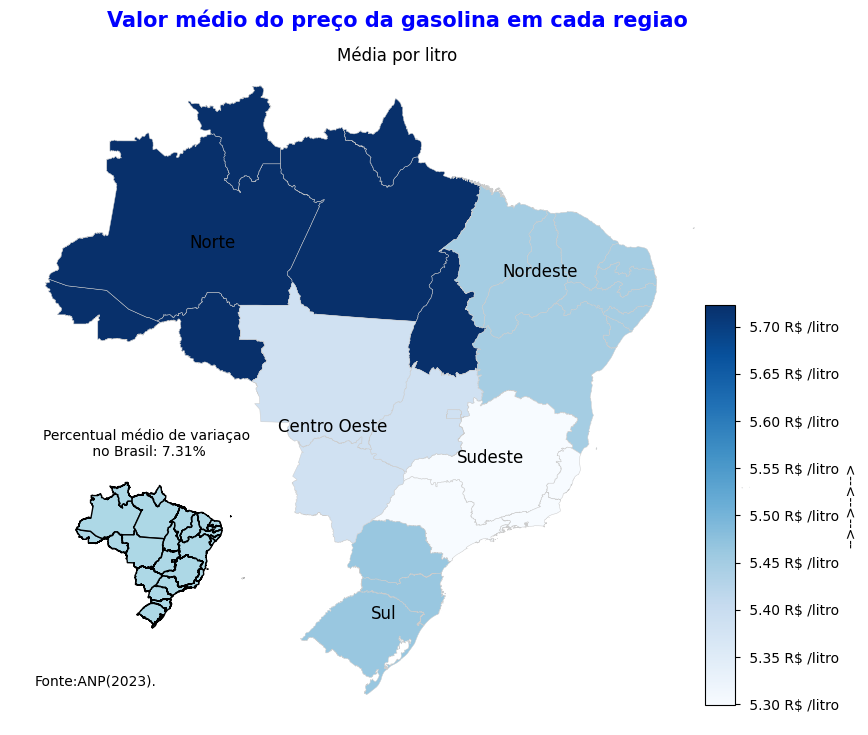

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_gasol_reg_ju','Valor médio do preço da gasolina em cada regiao','name_region',df_percentual)

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
func_print_ordem_reg(df_gasolina_reg_jun,'Gasolina','Junho')

Os estados estão ordenados pela média mais alta no valor de Gasolina no mês de Junho
**************************************************
A região do Norte é a 1º com média de 5.72 R$/litro
**************************************************
A região do Sul é a 2º com média de 5.46 R$/litro
**************************************************
A região do Nordeste é a 3º com média de 5.45 R$/litro
**************************************************
A região do Centro Oeste é a 4º com média de 5.38 R$/litro
**************************************************
A região do Sudeste é a 5º com média de 5.30 R$/litro


#### <font color= bluelight >**>>>> Gasolina Aditivada no mês de Junho**
>- Nessa fase do projeto será feito uma analise sobre o preço do combústivel gasolina aditividano mês de Junho/2023;
- Será feito uma análise do percentual de variação da média dos preços, nível nacional;
- Calculado a média das cinco regiões e quais tem o valor mais alto;
- Calculado a média de preços por estado, os estados com maior média;

#####   >>>>> Lendo os dados

In [ ]:
# filtrando o dataset e agrupando os dados do gasolina no mês de Junho
df_gasolina_adt_junho = df_ajuste[df_ajuste['prod_combust'] == 'GASOLINA ADITIVADA']
df_gasolina_adt_junho['val_litro'].describe()


count    14417.000000
mean         5.572516
std          0.341832
min          4.590000
25%          5.370000
50%          5.550000
75%          5.780000
max          7.990000
Name: val_litro, dtype: float64

#####>>>>> Percentual de Variação Nacional Junho

>- Foi pego a média de preço do primeiro dia do mês e do ultimo dia, foi calculado o percentual de variação da média do mês


In [ ]:
#chama a funçao do percentual de variaçao nacional do gasolina em junho
df_percentual= func_percentual_variac(df_gasolina_adt_junho)

*******************************************************
Média de Preço Nacional no Primeiro Dia: 5.39 R$/litro
*******************************************************
Média de Preço Nacional no Último Dia: 5.72 R$/litro
*******************************************************
Média do Preço Nacional do mes: 5.57 R$/litro
*******************************************************
Variação da média: 0.33
*******************************************************
Percentual de Variação da Média: 6.06 %


##### >>>>> Municípios com maior valor de preço do Gasolina Aditivada em Junho

######>>>>>> Filtrando pelo nome do municipio e consultando por registros nulos

> - carregando o dataframe e verificando a ocorrencia de registros nulos na coluna nome do municipio

In [ ]:
df_gasolina_adt_junho[df_gasolina_adt_junho['nome_munic'].isnull()].shape[0]

0

>- aqui observamos que não há registros nulos

In [ ]:
df_gasolina_adt_junho['nome_munic'].value_counts()

SAO PAULO         754
RIO DE JANEIRO    292
BRASILIA          179
FORTALEZA         161
PORTO ALEGRE      138
                 ... 
MARABA              3
TEOFILO OTONI       3
GOIANA              2
ITAPEVA             2
ITAITUBA            2
Name: nome_munic, Length: 456, dtype: int64

>- logo verificamos que existe 456 municípios, e a quantidade de registros de cada um

> - São Paulo tem o maior número de registros 754

In [ ]:
df_gasolina_adt_municipio_j =df_gasolina_adt_junho.groupby('nome_munic')['val_litro'].max()
df_gasolina_adt_municipio_j_ordem = df_gasolina_adt_municipio_j.sort_values(ascending=False)
df_gasolina_adt_municipio_j_ordem

nome_munic
SAO PAULO          7.99
TABOAO DA SERRA    7.29
TEFE               6.99
BARUERI            6.99
SANTO ANDRE        6.99
                   ... 
ARCOVERDE          5.30
ITABAIANA          5.29
LAJEDO             5.28
ARAGUARI           5.17
GOIANA             5.09
Name: val_litro, Length: 456, dtype: float64

> - Vericamos então que o município com maior preço de Gasolina em Junho
   - São Paulo com valor de  7.99 reais/litro
> - o município com menor preço de Gasolina em Junho:
   - Goiana com 5.09 reais/litro


#####>>>>> Média de Preços por Estado

>- Usando a função func_agrupa_media, para obter as médias do valor do gasolina aditivada por estado no mês de Junho

In [ ]:
#  chmando a função e agrupando por estado a media do preço do gasolina
df_gasolina_adt_uf_jun = func_agrupa_media(df_gasolina_adt_junho,'abbrev_state','med_gasol_adt_uf_ju')
df_gasolina_adt_uf_jun

abbrev_state
AC    6.105345
AL    5.670529
AM    6.154737
AP    5.318333
BA    5.664814
CE    5.587515
DF    5.506872
ES    5.725753
GO    5.489750
MA    5.378857
MG    5.443049
MS    5.604649
MT    5.512360
PA    5.710678
PB    5.395096
PE    5.584239
PI    5.506784
PR    5.603535
RJ    5.569812
RN    5.798092
RO    5.980904
RR    5.817619
RS    5.596797
SC    5.667877
SE    5.498889
SP    5.506391
TO    5.720438
Name: med_gasol_adt_uf_ju, dtype: float64

##### >>>>> Criando o DataFrame (Mapa)

>- Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_adt_uf_jun, on ='abbrev_state')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_adt_uf_ju  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...             5.980904  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...             6.105345  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...             6.154737  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...             5.817619  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...             5.710678

#####>>>>> Gráfico Mapa - Estados

>- criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

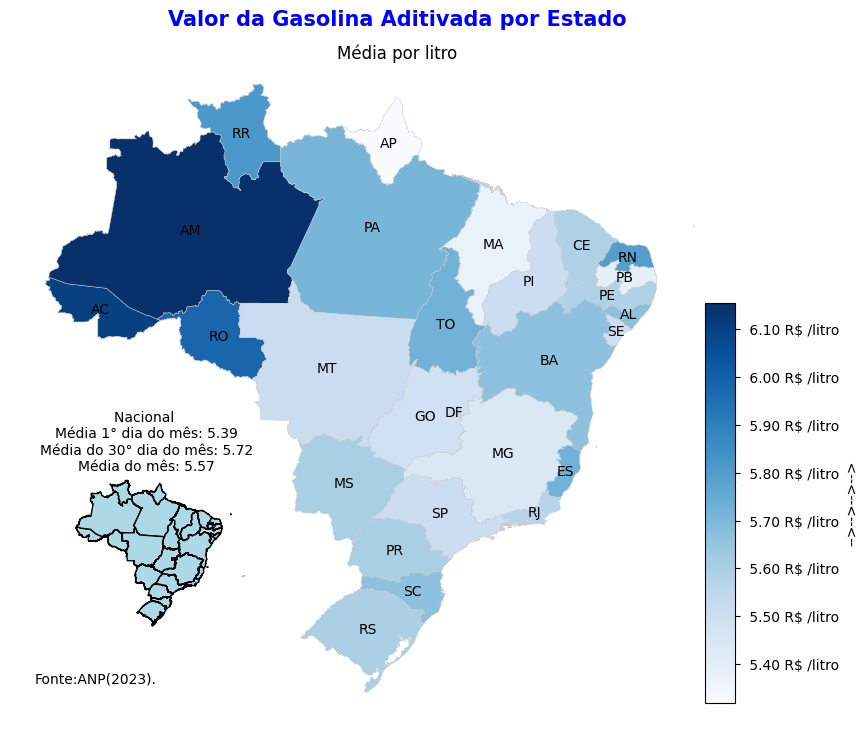

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado e mostrando o mapa com as medias por estado e media nacional
func_gerar_mapa(br_uf_mapa,'med_gasol_adt_uf_ju','Valor da Gasolina Aditivada por Estado','abbrev_state', df_percentual)

#####>>>>> Print Respostas - Estados

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_gasolina_adt_uf_jun,'Gasolina Aditivada','Junho')

Os estados estão ordenados pela média mais alta no valor do Gasolina Aditivada no mês de Junho
**************************************************
o estado do AM é o 1º com média de R$ 6.15 /litro
**************************************************
o estado do AC é o 2º com média de R$ 6.11 /litro
**************************************************
o estado do RO é o 3º com média de R$ 5.98 /litro
**************************************************
o estado do RR é o 4º com média de R$ 5.82 /litro
**************************************************
o estado do RN é o 5º com média de R$ 5.80 /litro
**************************************************
o estado do ES é o 6º com média de R$ 5.73 /litro
**************************************************
o estado do TO é o 7º com média de R$ 5.72 /litro
**************************************************
o estado do PA é o 8º com média de R$ 5.71 /litro
**************************************************
o estado do AL é o 9º com média de R$ 5.67 /li

- Aqui selecionamos os cinco estados com média no preço do litro da gasolina aditivada mais alto de acordo com os dados em Junho
 > - Amazonas esta em primeiro com um valor de R$ 6,15 por litro;

 > - Acre esta em segundo  com um valor de R$ 6,11 por litro;

 > - Rondonia esta em terceiro com um valor de R$ 5,98 por litro;

 > - Roraima esta em quarto com um valor de R$ 5,82 por litro

 > - Rio Grande do Norte esta em quinto com um valor de R$ 5,80 por litro

- Analisando os preços mais altos da gasolina aditivada nos cinco estados em junho, insights:

>1. **Variação regional:** A presença desses cinco estados na lista dos preços mais altos da gasolina aditivada sugere que há uma tendência regional de preços elevados. Isso pode estar relacionado a fatores como distância dos centros de refino, infraestrutura de transporte e logística, e políticas estaduais de impostos sobre combustíveis.

>2. **Isolamento geográfico:** Três dos estados listados (Amazonas, Acre e Roraima) estão localizados na região Norte do Brasil, que é caracterizada por seu isolamento geográfico em relação ao centro econômico e de refino do país. Essa distância pode aumentar os custos de transporte e, consequentemente, os preços dos combustíveis.

>3. **Impacto do transporte:** A distância desses estados em relação aos centros de produção e refino pode resultar em custos de transporte mais altos. Esses custos são frequentemente repassados aos preços dos combustíveis, o que pode contribuir para os valores elevados.

>4. **Políticas de impostos:** Diferenças nas políticas estaduais de impostos sobre combustíveis também podem influenciar os preços. Alguns estados podem ter impostos mais altos sobre combustíveis, o que contribui para os preços mais elevados.

>5. **Possíveis medidas governamentais:** A lista dos estados com preços mais altos pode chamar a atenção das autoridades estaduais e federais para a necessidade de avaliar políticas que possam aliviar o impacto dos preços dos combustíveis sobre a população.

Em resumo, a análise dos preços mais altos da gasolina aditivada nos estados listados sugere uma combinação de fatores geográficos, econômicos e políticos que influenciam os preços dos combustíveis em cada região.

#####>>>>> Média por Região



>- Agrupando gasolina aditivada por preço médio e região

In [ ]:
# chamando a funçao e agrupando por regiao
df_gasolina_adt_reg_jun = func_agrupa_media(df_gasolina_adt_junho,'name_region','med_gasol_adt_reg_ju')
df_gasolina_adt_reg_jun

name_region
Centro Oeste    5.519978
Nordeste        5.584703
Norte           5.879761
Sudeste         5.518035
Sul             5.615670
Name: med_gasol_adt_reg_ju, dtype: float64

#####>>>>> Criando o DataFrame(Mapa) - Região

>- Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_adt_reg_jun, on ='name_region')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_adt_reg_ju  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...              5.879761  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...              5.879761  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...              5.879761  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...              5.879761  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...              5.879761

#####>>>>> Gráfico Mapa - Região

>- Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

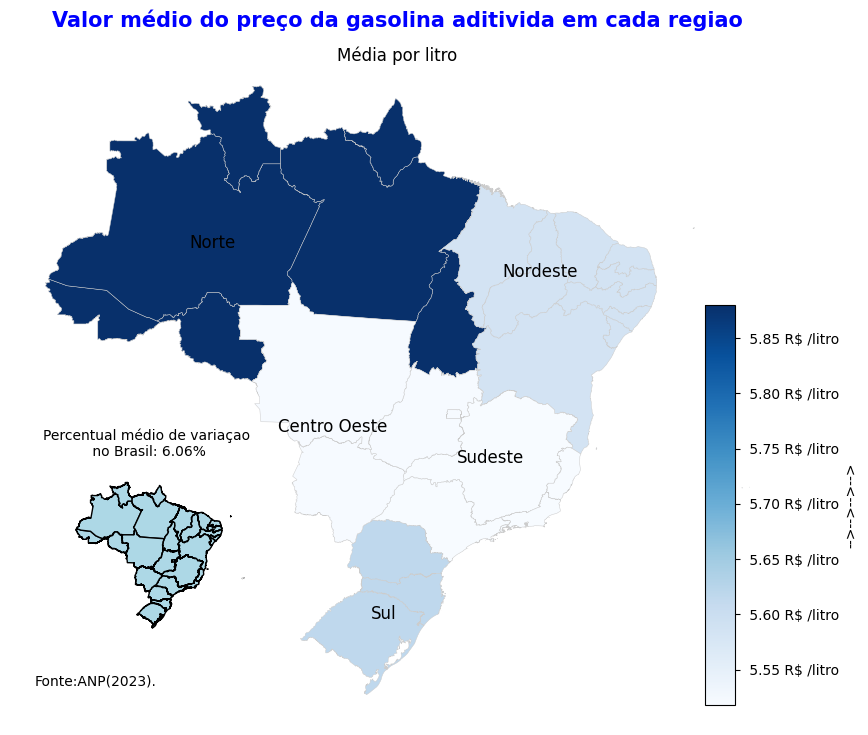

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_gasol_adt_reg_ju','Valor médio do preço da gasolina aditivida em cada regiao','name_region',df_percentual)

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
func_print_ordem_reg(df_gasolina_adt_reg_jun,'Gasolina Aditivada','Junho')

Os estados estão ordenados pela média mais alta no valor de Gasolina Aditivada no mês de Junho
**************************************************
A região do Norte é a 1º com média de 5.88 R$/litro
**************************************************
A região do Sul é a 2º com média de 5.62 R$/litro
**************************************************
A região do Nordeste é a 3º com média de 5.58 R$/litro
**************************************************
A região do Centro Oeste é a 4º com média de 5.52 R$/litro
**************************************************
A região do Sudeste é a 5º com média de 5.52 R$/litro


##### >>>>> <font color= bluelight > >>> Analisando as médias de preço da gasolina aditivida nas diferentes regiões no mês de junho, insights:

> **Disparidades regionais:** As variações nas médias de preço da gasolina entre as regiões indicam diferenças no mercado e nas condições econômicas. A região Norte, por exemplo, apresenta a média mais alta de 4.65, enquanto a região Centro-Oeste possui a média mais baixa de 3.74. Isso sugere que há influências específicas em cada região que afetam os preços.

 > - **Fatores geográficos e logísticos;**
 > - **Produção local;**
 >- **Diferenças na demanda;**
 >- **Políticas e impostos;**
 >- **Variações climáticas;**
 >- **Comportamento do consumidor;**
 >- **Concorrência;**

Em resumo, as diferenças nas médias de preço do etanol entre as regiões podem ser atribuídas a uma combinação de fatores geográficos, econômicos, logísticos, de produção e de comportamento do consumidor.

#### <font color= bluelight > >>> Analisando as médias dos preços do etanol, gasolina e gasolina aditivada nos cinco estados com média mais alta no país, em Junho insights:

#####>>>>> Obtendo os dados

              media gasolina  media etanol  media gasolina adt
abbrev_state                                                  
AC                  6.099859      4.776875            6.105345
AL                  5.554126      4.529078            5.670529
AM                  6.196349      4.532800            6.154737
AP                  5.032159      5.186667            5.318333
BA                  5.573506      4.380951            5.664814
CE                  5.435315      4.550434            5.587515
DF                  5.425000      3.833770            5.506872
ES                  5.586825      4.428102            5.725753
GO                  5.357657      3.755829            5.489750
MA                  5.270888      4.634930            5.378857
MG                  5.255166      3.737021            5.443049
MS                  5.418806      3.893391            5.604649
MT                  5.390577      3.462817            5.512360
PA                  5.480069      4.650543            5

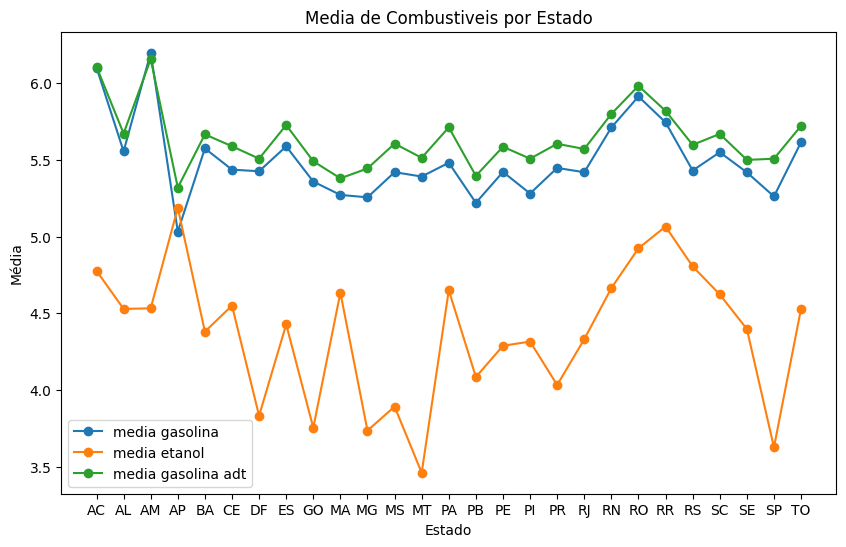

In [ ]:
df_mostra_analise_estado =pd.DataFrame({'media gasolina':df_gasolina_uf_jun,
                        'media etanol':df_etanol_uf_jun,
                        'media gasolina adt':df_gasolina_adt_uf_jun})
func_mostra_analise_grafico(df_mostra_analise_estado)



>1. **Diferenças regionais consistentes:** Os estados da região Norte, como Amazonas, Acre, Roraima e Rondônia, tendem a ter preços mais elevados para todos os tipos de combustíveis. Essa tendência sugere uma influência regional sobre os preços dos combustíveis.

>2. **Isolamento geográfico e logística:** A região Norte está geograficamente isolada das áreas de produção e refino de combustíveis no Brasil. Isso pode aumentar os custos de transporte e logística.

>3. **Influência de impostos:** Alguns estados podem ter políticas fiscais que impactam os preços dos combustíveis. A presença de Amazonas, Acre e Rondônia na lista dos preços mais altos sugere que os impostos estaduais podem estar contribuindo para os preços elevados.

>4. **Possíveis políticas de mitigação:** A lista dos estados com preços mais altos pode chamar a atenção das autoridades governamentais para a necessidade de avaliar políticas que possam reduzir o impacto dos preços dos combustíveis sobre a população. Isso pode incluir medidas para reduzir impostos ou incentivar a produção local.

Em resumo, os insights extraídos dessas informações refletem a complexidade das dinâmicas de preços dos combustíveis em diferentes regiões do Brasil.

#### <font color= bluelight> >>> Comparando os percentuais de variação dos preços no mês de junho para o etanol (5.41%), gasolina (7.31%) e gasolina aditivada (6.06%), obtivemos seguintes insights:



>1. **Diferenças nas variações:** O aumento no preço da gasolina é o mais significativo entre os três combustíveis, com 7.31%. Isso pode indicar uma pressão maior sobre o custo da gasolina em relação ao etanol e à gasolina aditivada. Pode ser interessante investigar as razões por trás desse aumento mais acentuado.

>2. **Variação relativa:** Observando os percentuais de variação em relação ao etanol (base de 5.41%), você pode notar que a gasolina teve um aumento maior (7.31%), enquanto a gasolina aditivada teve um aumento menor (6.06%). Isso pode refletir mudanças na oferta e demanda, bem como flutuações nos preços das matérias-primas.

>3. **Escolha de combustível:** Considerando essas variações, os consumidores que possuem veículos flex fuel (capazes de utilizar etanol ou gasolina) podem reconsiderar suas escolhas de abastecimento. Se o aumento da gasolina for substancial, o etanol poderia se tornar mais atraente em termos de custo-benefício.

>4. **Impacto econômico:** O aumento dos preços dos combustíveis, especialmente da gasolina, pode ter um impacto mais amplo na economia, uma vez que afeta os custos de transporte de mercadorias e pessoas. Isso pode influenciar a inflação e a tomada de decisões econômicas em diferentes setores.

>5. **Avaliação da aditivada:** A gasolina aditivada apresentou uma variação intermediária entre o etanol e a gasolina comum. Isso pode indicar que a aditivada está seguindo uma tendência similar à gasolina, mas com uma menor amplitude de variação. Os consumidores podem considerar se os benefícios da gasolina aditivada compensam o aumento de preço em relação à gasolina comum.

Insights são baseados exclusivamente nos percentuais de variação e a análise completa requer uma compreensão mais profunda das condições econômicas, políticas e de mercado que podem influenciar os preços dos combustíveis.

#### <font color= bluelight> >>> Correlação das médias diarias dos combustiveis e as regiões brasileiras

- vamos pegar o df_etanol_junho que ja esta filtrado por categoria, e fazer um agrupamento por região

##### >> Agrupando por região a média diaria <font color= bluelight> >> Etanol

In [ ]:
media_diaria_etanol = df_etanol_junho.groupby(['dt_coleta','name_region'])['val_litro'].mean().unstack()
media_diaria_etanol

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/06/2023       3.836429  4.292564  4.640000  3.719779  4.597273
02/06/2023            NaN  4.290000       NaN  3.631429       NaN
05/06/2023       3.694474  4.421728  4.623529  3.804646  4.420714
06/06/2023       3.815000  4.447414  4.580179  3.841582  4.437651
07/06/2023       3.697922  4.404980  4.772000  3.803440  4.370082
08/06/2023       3.839310  4.418760  4.681429  3.867204  4.251750
09/06/2023       3.838889  4.548125  4.643750  3.834429  3.970588
12/06/2023       3.800735  4.423298  4.628448  3.770055  4.473455
13/06/2023       3.738406  4.412936  4.688750  3.840720  4.539919
14/06/2023       3.759610  4.450362  4.866316  3.891137  4.419254
15/06/2023       3.749123  4.369237  4.574667  3.696678  3.951571
16/06/2023       3.740000       NaN  4.340000  3.649500  3.943333
19/06/2023       3.677033  4.385909  4.568333  3.737771  4.340995
20/06/2023       3.745536  4.350635  4.615000  3.790420  4.451852
21/06/2023       3.681442  4.379860  4.808500  3.811491  4.383226
22/06/2023       3.609130  4.429474  4.903571  3.733681  4.011571
23/06/2023       3.580000  4.578636       NaN  4.090000       NaN
26/06/2023       3.674623  4.410760  4.635769  3.764267  4.258737
27/06/2023       3.675625  4.391570  4.637551  3.757936  4.324916
28/06/2023       3.721143  4.387088  4.674062  3.754310  4.445862
29/06/2023       3.757419  4.547864  4.753333  3.790704  4.099315
30/06/2023       3.884211  4.490000       NaN  3.790000       NaN

##### >> Verificando a ocorrência de valores nulos

In [ ]:
nulos = media_diaria_etanol.isna().sum()
nulos

name_region
Centro Oeste    1
Nordeste        1
Norte           3
Sudeste         0
Sul             3
dtype: int64

>- como resultado vimos que existe alguns dias com média diaria nula em algumas regiões, dessa forma terão que ser tratados esses registros

##### >> Tratando os valores nulos

>- Usaremos o método 'ffill' para colocar no espaço nulo a média anterior

In [ ]:
# usando o metodo ffill para colocar um valor medio nos valores nulos
media_corrigido_etan =media_diaria_etanol.fillna(method='ffill')
media_corrigido_etan

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/06/2023       3.836429  4.292564  4.640000  3.719779  4.597273
02/06/2023       3.836429  4.290000  4.640000  3.631429  4.597273
05/06/2023       3.694474  4.421728  4.623529  3.804646  4.420714
06/06/2023       3.815000  4.447414  4.580179  3.841582  4.437651
07/06/2023       3.697922  4.404980  4.772000  3.803440  4.370082
08/06/2023       3.839310  4.418760  4.681429  3.867204  4.251750
09/06/2023       3.838889  4.548125  4.643750  3.834429  3.970588
12/06/2023       3.800735  4.423298  4.628448  3.770055  4.473455
13/06/2023       3.738406  4.412936  4.688750  3.840720  4.539919
14/06/2023       3.759610  4.450362  4.866316  3.891137  4.419254
15/06/2023       3.749123  4.369237  4.574667  3.696678  3.951571
16/06/2023       3.740000  4.369237  4.340000  3.649500  3.943333
19/06/2023       3.677033  4.385909  4.568333  3.737771  4.340995
20/06/2023       3.745536  4.350635  4.615000  3.790420  4.451852
21/06/2023       3.681442  4.379860  4.808500  3.811491  4.383226
22/06/2023       3.609130  4.429474  4.903571  3.733681  4.011571
23/06/2023       3.580000  4.578636  4.903571  4.090000  4.011571
26/06/2023       3.674623  4.410760  4.635769  3.764267  4.258737
27/06/2023       3.675625  4.391570  4.637551  3.757936  4.324916
28/06/2023       3.721143  4.387088  4.674062  3.754310  4.445862
29/06/2023       3.757419  4.547864  4.753333  3.790704  4.099315
30/06/2023       3.884211  4.490000  4.753333  3.790000  4.099315

##### >> Agrupando por região a média diaria <font color= bluelight> >> Gasolina

In [ ]:
media_diaria_gasolina =df_gasolina_junho.groupby(['dt_coleta','name_region'])['val_litro'].mean().unstack()
media_diaria_gasolina

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/06/2023       5.149286  5.298810  5.215833  5.162892  5.466667
02/06/2023            NaN  5.650000       NaN  5.215714       NaN
05/06/2023       5.285063  5.495645  5.722903  5.331315  5.485645
06/06/2023       5.505515  5.491986  5.664746  5.341485  5.551004
07/06/2023       5.321235  5.424051  5.820652  5.339461  5.550890
08/06/2023       5.530333  5.478298  6.113226  5.355741  5.386825
09/06/2023       5.375926  5.728750  5.515714  5.373600  5.341765
12/06/2023       5.480139  5.434260  5.761471  5.318430  5.424976
13/06/2023       5.421014  5.470233  5.695726  5.309258  5.520569
14/06/2023       5.421585  5.460873  5.792424  5.338619  5.543277
15/06/2023       5.361500  5.409779  5.555957  5.332663  5.433816
16/06/2023       5.970000       NaN  5.590000  5.303810  5.356667
19/06/2023       5.338763  5.463813  5.677955  5.286252  5.418154
20/06/2023       5.301197  5.401429  5.759492  5.268026  5.477500
21/06/2023       5.330000  5.387432  5.703026  5.293575  5.447606
22/06/2023       5.344348  5.476331  5.792037  5.269169  5.450000
23/06/2023       5.127500  5.468000  5.300000  5.162500       NaN
26/06/2023       5.297838  5.450842  5.683404  5.264096  5.355893
27/06/2023       5.370122  5.441541  5.737177  5.241846  5.438769
28/06/2023       5.453718  5.411582  5.718780  5.265952  5.452587
29/06/2023       5.402879  5.587442  5.841724  5.385069  5.520104
30/06/2023       5.571579  5.716364       NaN  5.434444       NaN

##### >> Verificando a ocorrência de valores nulos

In [ ]:
nulos = media_diaria_gasolina.isna().sum()
nulos

name_region
Centro Oeste    1
Nordeste        1
Norte           2
Sudeste         0
Sul             3
dtype: int64

>- como resultado vimos que existe alguns dias com média diaria nula em algumas regiões, dessa forma terão que ser tratados esses registros

##### >> Tratando os valores nulos

>- Usaremos o método 'ffill' para colocar no espaço nulo a média anterior

In [ ]:
media_corrigido_gasol =media_diaria_gasolina.fillna(method='ffill')
media_corrigido_gasol

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/06/2023       5.149286  5.298810  5.215833  5.162892  5.466667
02/06/2023       5.149286  5.650000  5.215833  5.215714  5.466667
05/06/2023       5.285063  5.495645  5.722903  5.331315  5.485645
06/06/2023       5.505515  5.491986  5.664746  5.341485  5.551004
07/06/2023       5.321235  5.424051  5.820652  5.339461  5.550890
08/06/2023       5.530333  5.478298  6.113226  5.355741  5.386825
09/06/2023       5.375926  5.728750  5.515714  5.373600  5.341765
12/06/2023       5.480139  5.434260  5.761471  5.318430  5.424976
13/06/2023       5.421014  5.470233  5.695726  5.309258  5.520569
14/06/2023       5.421585  5.460873  5.792424  5.338619  5.543277
15/06/2023       5.361500  5.409779  5.555957  5.332663  5.433816
16/06/2023       5.970000  5.409779  5.590000  5.303810  5.356667
19/06/2023       5.338763  5.463813  5.677955  5.286252  5.418154
20/06/2023       5.301197  5.401429  5.759492  5.268026  5.477500
21/06/2023       5.330000  5.387432  5.703026  5.293575  5.447606
22/06/2023       5.344348  5.476331  5.792037  5.269169  5.450000
23/06/2023       5.127500  5.468000  5.300000  5.162500  5.450000
26/06/2023       5.297838  5.450842  5.683404  5.264096  5.355893
27/06/2023       5.370122  5.441541  5.737177  5.241846  5.438769
28/06/2023       5.453718  5.411582  5.718780  5.265952  5.452587
29/06/2023       5.402879  5.587442  5.841724  5.385069  5.520104
30/06/2023       5.571579  5.716364  5.841724  5.434444  5.520104

##### >> Agrupando por região a média diaria <font color= bluelight> >> Gasolina Adt

In [ ]:
media_diaria_gasolina_adt =df_gasolina_adt_junho.groupby(['dt_coleta','name_region'])['val_litro'].mean().unstack()
media_diaria_gasolina_adt

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/06/2023       5.410000  5.402258  5.421667  5.364164  5.591515
02/06/2023            NaN       NaN       NaN  5.425385       NaN
05/06/2023       5.453800  5.627852  5.936061  5.560906  5.632716
06/06/2023       5.645619  5.615459  5.867941  5.564286  5.678750
07/06/2023       5.434528  5.552030  5.850000  5.519357  5.716613
08/06/2023       5.628750  5.596972  6.172222  5.598174  5.577667
09/06/2023       5.505455  5.876000  5.625000  5.567931  5.505000
12/06/2023       5.606279  5.603049  5.876267  5.551344  5.592189
13/06/2023       5.542075  5.607552  5.835698  5.535767  5.672934
14/06/2023       5.536863  5.582123  5.975128  5.539820  5.665741
15/06/2023       5.561316  5.547885  5.838333  5.534085  5.581515
16/06/2023       6.070000       NaN       NaN  5.483889  5.390000
19/06/2023       5.469310  5.604224  5.886102  5.523048  5.563321
20/06/2023       5.441807  5.521373  5.845238  5.486780  5.633532
21/06/2023       5.492456  5.532526  5.958085  5.505227  5.595664
22/06/2023       5.426429  5.618731  5.887941  5.482785  5.614416
23/06/2023       5.365000  5.625238       NaN  5.190000       NaN
26/06/2023       5.410667  5.583487  5.899687  5.514055  5.495305
27/06/2023       5.457759  5.567108  5.910247  5.472564  5.579129
28/06/2023       5.571509  5.556872  5.813898  5.469703  5.633310
29/06/2023       5.579091  5.726667  5.838000  5.549097  5.705625
30/06/2023       5.717778  5.724444       NaN  5.690000       NaN

##### >> Verificando a ocorrência de valores nulos

In [ ]:
nulos = media_diaria_gasolina_adt.isna().sum()
nulos

name_region
Centro Oeste    1
Nordeste        2
Norte           4
Sudeste         0
Sul             3
dtype: int64

>- como resultado vimos que existe alguns dias com média diaria nula em algumas regiões, dessa forma terão que ser tratados esses registros

##### >> Tratando os valores nulos

>- Usaremos o método 'ffill' para colocar no espaço nulo a média anterior

In [ ]:
media_corrigido_gasol_adt =media_diaria_gasolina_adt.fillna(method='ffill')
media_corrigido_gasol_adt

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/06/2023       5.410000  5.402258  5.421667  5.364164  5.591515
02/06/2023       5.410000  5.402258  5.421667  5.425385  5.591515
05/06/2023       5.453800  5.627852  5.936061  5.560906  5.632716
06/06/2023       5.645619  5.615459  5.867941  5.564286  5.678750
07/06/2023       5.434528  5.552030  5.850000  5.519357  5.716613
08/06/2023       5.628750  5.596972  6.172222  5.598174  5.577667
09/06/2023       5.505455  5.876000  5.625000  5.567931  5.505000
12/06/2023       5.606279  5.603049  5.876267  5.551344  5.592189
13/06/2023       5.542075  5.607552  5.835698  5.535767  5.672934
14/06/2023       5.536863  5.582123  5.975128  5.539820  5.665741
15/06/2023       5.561316  5.547885  5.838333  5.534085  5.581515
16/06/2023       6.070000  5.547885  5.838333  5.483889  5.390000
19/06/2023       5.469310  5.604224  5.886102  5.523048  5.563321
20/06/2023       5.441807  5.521373  5.845238  5.486780  5.633532
21/06/2023       5.492456  5.532526  5.958085  5.505227  5.595664
22/06/2023       5.426429  5.618731  5.887941  5.482785  5.614416
23/06/2023       5.365000  5.625238  5.887941  5.190000  5.614416
26/06/2023       5.410667  5.583487  5.899687  5.514055  5.495305
27/06/2023       5.457759  5.567108  5.910247  5.472564  5.579129
28/06/2023       5.571509  5.556872  5.813898  5.469703  5.633310
29/06/2023       5.579091  5.726667  5.838000  5.549097  5.705625
30/06/2023       5.717778  5.724444  5.838000  5.690000  5.705625

##### >><font color= bluelight> Correlação Sul

**************************************************
Correlação de gasolina com etanol no mês de Junho na região Sul: 0.42
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Junho na região Sul: 0.91
**************************************************
Correlação de etanol com gasolina aditivada no mês de Junho na região Sul: 0.34


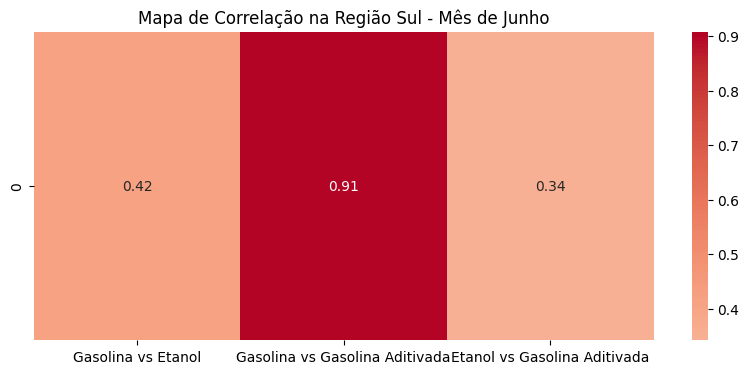

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Sul', 'Junho')

>- Correlação de gasolina com etanol: 0,42 Existe uma variação moderada entre os preços da gasolina e do etanol. Isso sugere que os preços da gasolina e do etanol têm alguma relação, mas não muito forte.

>- Correlação de gasolina com gasolina aditivada: 0,91 Existe uma relação muito forte entre os preços da gasolina e da gasolina aditivada. Isso indica que os preços desses dois tipos de gasolina estão altamente correlacionados e tendem a se mover em conjunto.

>- Correlação de etanol com gasolina aditivada: 0,34 Existe uma pequena relação entre os preços do etanol e da gasolina aditivada na região Sul em junho. Isso sugere que quase não existe relação entre eles.

##### >><font color= bluelight> Correlação Norte

**************************************************
Correlação de gasolina com etanol no mês de Junho na região Norte: 0.13
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Junho na região Norte: 0.80
**************************************************
Correlação de etanol com gasolina aditivada no mês de Junho na região Norte: 0.19


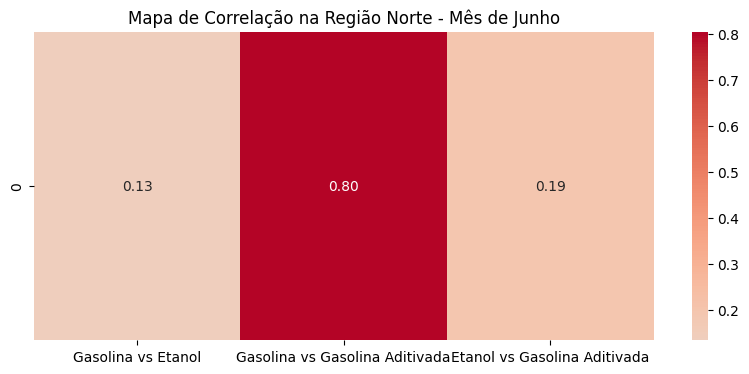

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Norte', 'Junho')

>- Correlação de gasolina com etanol: -0,03 A relação entre os preços da gasolina e do etanol na região Norte em junho é muito próximo de zero, indicando uma relação praticamente nula entre esses preços. Eles não estão correlacionados de maneira significativa.

>- Correlação de gasolina com gasolina aditivada: 0,83 Existe uma relação forte entre os preços da gasolina e da gasolina aditivada na região Norte em junho. Isso sugere que os preços desses dois tipos de gasolina estão bem correlacionados e tendem a se mover em conjunto.

>- Correlação de etanol com gasolina aditivada: 0,28 Existe uma relação moderada entre os preços do etanol e da gasolina aditivada na região Norte em junho. Isso indica que esses preços têm alguma relação, mas essa relação não é significativa.

##### >><font color= bluelight> Correlação Nordeste

**************************************************
Correlação de gasolina com etanol no mês de Junho na região Nordeste: 0.51
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Junho na região Nordeste: 0.65
**************************************************
Correlação de etanol com gasolina aditivada no mês de Junho na região Nordeste: 0.86


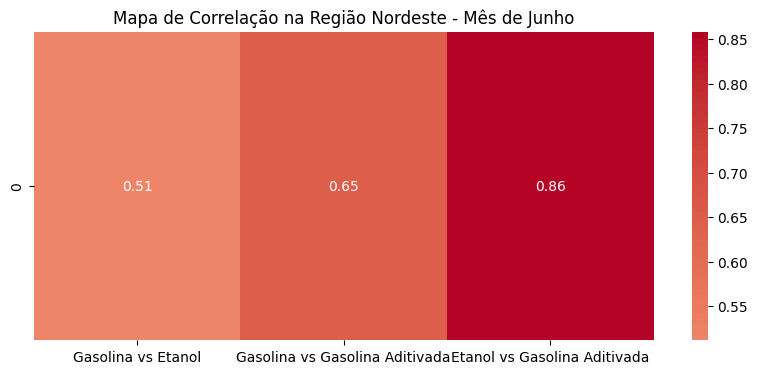

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Nordeste', 'Junho')

> - Correlação de gasolina com etanol: 0,51 Existe uma variação moderada entre os preços da gasolina e do etanol na região Nordeste em junho. Isso sugere que os preços desses dois combustíveis estão razoavelmente interligados, indicando uma relação positiva.

> - Correlação de gasolina com gasolina aditivada: 0,65 Existe uma modulada entre os preços da gasolina e da gasolina aditivada na região Nordeste em junho. Isso sugere que os preços desses dois tipos de gasolina têm uma relação razoável e tendem a se mover em conjunto.

> - Correlação de etanol com gasolina aditivada: 0,86 Existe uma relação forte entre os preços do etanol e da gasolina aditivada na região Nordeste

##### >><font color= bluelight> Correlação Sudeste

**************************************************
Correlação de gasolina com etanol no mês de Junho na região Sudeste: -0.01
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Junho na região Sudeste: 0.90
**************************************************
Correlação de etanol com gasolina aditivada no mês de Junho na região Sudeste: -0.27


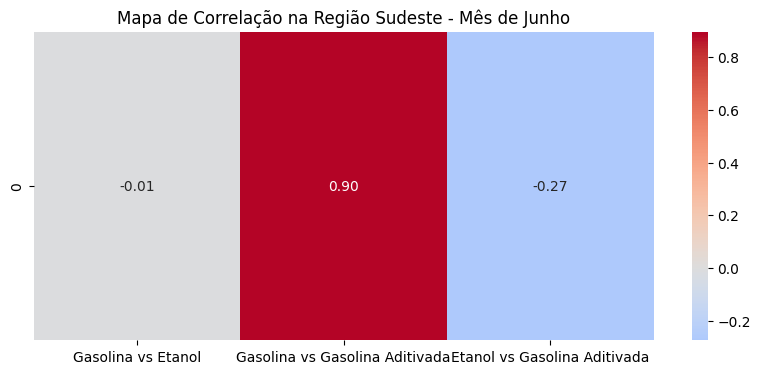

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Sudeste', 'Junho')

Correlação de gasolina com etanol: -0,01 A relação entre os preços da gasolina e do etanol na região Sudeste em junho é muito próximo de zero, indicando uma relação praticamente nula entre esses preços. Não há uma significativa entre eles.

Correlação de gasolina com gasolina aditivada: 0,90 Existe uma correlação muito forte entre os preços da gasolina e da gasolina aditivada na região Sudeste em junho. Isso indica que os preços desses dois tipos de gasolina estão altamente correlacionados e tendem a se mover em conjunto.

Correlação de etanol com gasolina aditivada: -0,27 A variação entre os preços do etanol e da gasolina aditivada na região Sudeste em junho é negativa e moderada. Isso sugere uma relação inversa entre esses preços, ou seja, quando um sobe, o outro tende a diminuir

##### >><font color= bluelight> Correlação Centro Oeste

**************************************************
Correlação de gasolina com etanol no mês de Junho na região Centro Oeste: 0.26
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Junho na região Centro Oeste: 0.96
**************************************************
Correlação de etanol com gasolina aditivada no mês de Junho na região Centro Oeste: 0.36


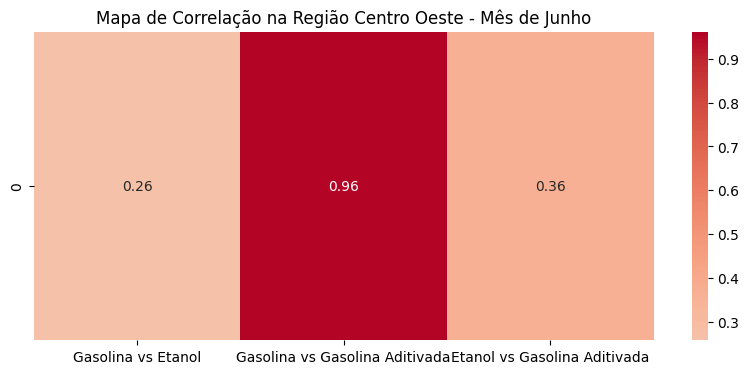

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Centro Oeste', 'Junho')

> - Correlação de gasolina com etanol: 0,87 Existe uma forte relação entre os preços da gasolina e do etanol na região Centro-Oeste em junho. Isso sugere que os preços desses dois combustíveis estão bem correlacionados e têm uma relação positiva.

> - Correlação de gasolina com gasolina aditivada: 0,94 Existe uma relação muito forte entre os preços da gasolina e da gasolina aditivada na região Centro-Oeste em junho. Isso indica que os preços desses dois tipos de gasolina estão altamente correlacionados e tendem a se mover em conjunto.

> - Correlação de etanol com gasolina aditivada: 0,82 Existe uma relação forte entre os preços do etanol e da gasolina aditivada na região Centro-Oeste em junho. Isso sugere que esses preços estão bem correlacionados e têm uma relação positiva.

#### <font color= bluelight> >>> Correlação das médias diarias dos combustiveis e bandeiras

#####<font color= bluelight> >> Etanol

######>> Lendo os Dados

In [ ]:
media_diaria_etanol_ban = df_etanol_junho.groupby(['dt_coleta','bandeira'])['val_litro'].mean().unstack()
media_diaria_etanol_ban

bandeira      ALESAT   ATEM' S  ATLÂNTICA    BRANCA   CHARRUA  CIAPETRO  \
dt_coleta                                                                 
01/06/2023  3.849000       NaN        NaN  3.714103       NaN       NaN   
02/06/2023  3.390000       NaN        NaN  3.716000       NaN       NaN   
05/06/2023  4.158913  4.604286       4.54  3.911173  4.805000  3.735000   
06/06/2023  4.060833  4.640000        NaN  3.965941  4.880000  3.430000   
07/06/2023  4.088444       NaN        NaN  3.942842       NaN  3.880000   
08/06/2023  4.030870  4.750000        NaN  3.943427  4.850000       NaN   
09/06/2023  4.153333       NaN        NaN  3.894510       NaN  3.590000   
12/06/2023  3.983404  4.652500        NaN  3.901512  4.686667  3.883333   
13/06/2023  4.112703  4.540000       4.54  3.947257  4.820000  3.430000   
14/06/2023  4.000556  3.890000       4.93  4.030212  5.230000  3.980000   
15/06/2023  4.038800  4.750000       4.45  3.775604       NaN       NaN   
16/06/2023  3.640000       NaN        NaN  3.640000       NaN       NaN   
19/06/2023  4.004286  4.504286       4.69  3.842875       NaN  3.740000   
20/06/2023  4.060652  4.573333       4.54  3.945724  4.580000       NaN   
21/06/2023  4.048235       NaN        NaN  3.926270  4.990000  4.030000   
22/06/2023  3.883571  4.750000        NaN  3.795104       NaN  3.590000   
23/06/2023  4.800000       NaN        NaN  4.146923       NaN       NaN   
26/06/2023  3.991500  4.602500        NaN  3.899087  4.685000  3.720000   
27/06/2023  4.073023  4.515000       4.51  3.940911  4.790000  3.380000   
28/06/2023  3.960233       NaN        NaN  3.895515  4.520000  4.170000   
29/06/2023  4.088667  4.320000        NaN  3.893926       NaN  3.890000   
30/06/2023  3.940000       NaN        NaN  3.866875       NaN       NaN   

bandeira      DISLUB  D`MAIS  EQUADOR  ESTRADA  ...  SETTA DISTRIBUIDORA  \
dt_coleta                                       ...                        
01/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   
02/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   
05/06/2023  4.302500    3.57     4.74      NaN  ...                 4.27   
06/06/2023  4.535000     NaN      NaN      NaN  ...                  NaN   
07/06/2023  4.640000     NaN      NaN      NaN  ...                 4.29   
08/06/2023  4.180000     NaN      NaN      NaN  ...                  NaN   
09/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   
12/06/2023  4.365000    3.57     4.59      NaN  ...                  NaN   
13/06/2023  4.386667     NaN     4.59      NaN  ...                  NaN   
14/06/2023       NaN     NaN      NaN      NaN  ...                 4.19   
15/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   
16/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   
19/06/2023  4.336667    3.57     4.49      NaN  ...                  NaN   
20/06/2023  4.453333     NaN     4.89      NaN  ...                  NaN   
21/06/2023  4.520000     NaN      NaN      NaN  ...                  NaN   
22/06/2023       NaN     NaN      NaN     3.84  ...                  NaN   
23/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   
26/06/2023  4.290000     NaN     4.49     3.94  ...                  NaN   
27/06/2023  4.190000     NaN     4.89      NaN  ...                  NaN   
28/06/2023  4.640000     NaN      NaN      NaN  ...                  NaN   
29/06/2023       NaN    3.49      NaN      NaN  ...                  NaN   
30/06/2023       NaN     NaN      NaN      NaN  ...                  NaN   

bandeira    SIMARELLI        SP     STANG    TAURUS  TDC DISTRIBUIDORA  \
dt_coleta                                                                
01/06/2023        NaN  4.530000  4.690000       NaN                NaN   
02/06/2023        NaN       NaN       NaN       NaN                NaN   
05/06/2023       4.58  4.890000  4.056667  3.660000              4.190   
06/0

###### >> obtendo o numero de bandeiras e quantos registros possui

In [ ]:
df_etanol_junho['bandeira'].value_counts()

BRANCA                  5823
IPIRANGA                3273
VIBRA ENERGIA           3200
RAIZEN                  2363
ALESAT                   649
SABBÁ                     86
TAURUS                    55
ATEM' S                   54
STANG                     45
RAIZEN MIME               37
SP                        35
DISLUB                    31
TOTALENERGIES             26
CIAPETRO                  26
CHARRUA                   25
PETROX DISTRIBUIDORA      23
RODOIL                    19
POTENCIAL                 18
PETROBAHIA                16
FAN                       14
ATLÂNTICA                 13
RIO BRANCO                12
MASUT DISTRIBUIDORA       12
MAXSUL                    11
IDAZA                     10
TDC DISTRIBUIDORA         10
EQUADOR                    8
D`MAIS                     8
LARCO                      7
SIMARELLI                  5
FEDERAL ENERGIA            4
UNI                        4
ON PETRO                   3
WALENDOWSKY                3
SETTA DISTRIBU

>- Atraves desses dados ja podemos observar que existe bandeiras que nâo serão utilizadas na análise, pois possuem um numero muito baixo de registros

###### >> consultando o número de registros nulos por bandeira e sua porcentagem

In [ ]:
nulos_count=media_diaria_etanol_ban.isna().sum()
nulos_percent=round(media_diaria_etanol_ban. isnull().mean()*100,2)
nulos =pd.DataFrame ({'Contagem de nulos': nulos_count, 'Percentual Nulos': nulos_percent})
nulos

Contagem de nulos  Percentual Nulos
bandeira                                                 
ALESAT                                0              0.00
ATEM' S                               9             40.91
ATLÂNTICA                            15             68.18
BRANCA                                0              0.00
CHARRUA                              11             50.00
CIAPETRO                              8             36.36
DISLUB                               10             45.45
D`MAIS                               18             81.82
EQUADOR                              15             68.18
ESTRADA                              20             90.91
FAN                                  12             54.55
FEDERAL ENERGIA                      18             81.82
IDAZA                                13             59.09
IPIRANGA                              0              0.00
LARCO                                16             72.73
MASUT DISTRIBUIDORA                  13             59.09
MAXSUL                               12             54.55
ON PETRO                             19             86.36
PELIKANO                             21             95.45
PETROBAHIA                           11             50.00
PETROBRASIL                          19             86.36
PETROX DISTRIBUIDORA                 16             72.73
POTENCIAL                            12             54.55
RAIZEN                                0              0.00
RAIZEN MIME                           9             40.91
RIO BRANCO                           12             54.55
RODOIL                               10             45.45
ROYAL FIC                            21             95.45
SABBÁ                                 4             18.18
SETTA DISTRIBUIDORA                  19             86.36
SIMARELLI                            17             77.27
SP                                    4             18.18
STANG                                 5             22.73
TAURUS                                5             22.73
TDC DISTRIBUIDORA                    15             68.18
TOTALENERGIES                         7             31.82
UNI                                  18             81.82
VIBRA ENERGIA                         0              0.00
WALENDOWSKY                          19             86.36

>- resolvemos utilizar as bandeiras que tenham até 18% de registros nulos, mais que isso não seria um número significativo para a análise

###### >> Retirando as bandeiras que não serão utilizadas, nesse caso as bandeiras que tiverem até quatro registros nulos ficaram

In [ ]:
media_diaria_etanol_ban_cor = media_diaria_etanol_ban.dropna(thresh=18, axis =1)
media_diaria_etanol_ban_cor

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN     SABBÁ        SP  \
dt_coleta                                                                
01/06/2023  3.849000  3.714103  3.911837  3.786508  4.590000  4.530000   
02/06/2023  3.390000  3.716000  3.873333  3.565000       NaN       NaN   
05/06/2023  4.158913  3.911173  3.994976  3.968526  4.541250  4.890000   
06/06/2023  4.060833  3.965941  4.087045  4.034444  4.490000  4.540000   
07/06/2023  4.088444  3.942842  4.031489  3.946214  4.692500  4.770000   
08/06/2023  4.030870  3.943427  4.031188  4.048161  4.590000  4.490000   
09/06/2023  4.153333  3.894510  3.869286  4.084091  4.930000  4.590000   
12/06/2023  3.983404  3.901512  3.946479  3.967095  4.534286  4.590000   
13/06/2023  4.112703  3.947257  4.134935  4.006158  5.048750  4.550000   
14/06/2023  4.000556  4.030212  4.051062  4.011429  4.803333  4.778000   
15/06/2023  4.038800  3.775604  3.870465  3.920706  4.590000  4.490000   
16/06/2023  3.640000  3.640000  3.681429  3.732000       NaN       NaN   
19/06/2023  4.004286  3.842875  3.960205  3.903869  4.656667  4.390000   
20/06/2023  4.060652  3.945724  4.021245  3.953797  4.445714  4.585000   
21/06/2023  4.048235  3.926270  4.038675  3.962460  4.546667       NaN   
22/06/2023  3.883571  3.795104  4.043934  3.932717  4.590000  4.490000   
23/06/2023  4.800000  4.146923  4.302500  4.378333       NaN  4.830000   
26/06/2023  3.991500  3.899087  3.969051  3.892686  4.590000  4.540000   
27/06/2023  4.073023  3.940911  4.007680  3.936914  4.564000  4.430000   
28/06/2023  3.960233  3.895515  4.037135  4.001946  4.517500  4.543333   
29/06/2023  4.088667  3.893926  3.972290  3.993636  4.766000       NaN   
30/06/2023  3.940000  3.866875  4.116667  4.022000       NaN  4.830000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/06/2023       3.980769  
02/06/2023       3.640000  
05/06/2023       4.099308  
06/06/2023       4.228479  
07/06/2023       4.204833  
08/06/2023       4.195321  
09/06/2023       4.105769  
12/06/2023       4.107893  
13/06/2023       4.197100  
14/06/2023       4.179831  
15/06/2023       4.076275  
16/06/2023       3.890000  
19/06/2023       4.050551  
20/06/2023       4.124444  
21/06/2023       4.209939  
22/06/2023       4.236000  
23/06/2023       4.301111  
26/06/2023       4.044710  
27/06/2023       4.148630  
28/06/2023       4.223478  
29/06/2023       4.070280  
30/06/2023       4.226250

###### >> Tratando os registros
> - usando os métodos 'ffill' e  'bfill colocando o a média da linha anterior no espaço nulo, e um valor foi tratado com 'bfill'

In [ ]:
media_etanol_cor_ban =media_diaria_etanol_ban_cor.fillna(method='ffill')
media_etanol_cor_ban =media_etanol_cor_ban.fillna(method='bfill')
media_etanol_cor_ban

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN     SABBÁ        SP  \
dt_coleta                                                                
01/06/2023  3.849000  3.714103  3.911837  3.786508  4.590000  4.530000   
02/06/2023  3.390000  3.716000  3.873333  3.565000  4.590000  4.530000   
05/06/2023  4.158913  3.911173  3.994976  3.968526  4.541250  4.890000   
06/06/2023  4.060833  3.965941  4.087045  4.034444  4.490000  4.540000   
07/06/2023  4.088444  3.942842  4.031489  3.946214  4.692500  4.770000   
08/06/2023  4.030870  3.943427  4.031188  4.048161  4.590000  4.490000   
09/06/2023  4.153333  3.894510  3.869286  4.084091  4.930000  4.590000   
12/06/2023  3.983404  3.901512  3.946479  3.967095  4.534286  4.590000   
13/06/2023  4.112703  3.947257  4.134935  4.006158  5.048750  4.550000   
14/06/2023  4.000556  4.030212  4.051062  4.011429  4.803333  4.778000   
15/06/2023  4.038800  3.775604  3.870465  3.920706  4.590000  4.490000   
16/06/2023  3.640000  3.640000  3.681429  3.732000  4.590000  4.490000   
19/06/2023  4.004286  3.842875  3.960205  3.903869  4.656667  4.390000   
20/06/2023  4.060652  3.945724  4.021245  3.953797  4.445714  4.585000   
21/06/2023  4.048235  3.926270  4.038675  3.962460  4.546667  4.585000   
22/06/2023  3.883571  3.795104  4.043934  3.932717  4.590000  4.490000   
23/06/2023  4.800000  4.146923  4.302500  4.378333  4.590000  4.830000   
26/06/2023  3.991500  3.899087  3.969051  3.892686  4.590000  4.540000   
27/06/2023  4.073023  3.940911  4.007680  3.936914  4.564000  4.430000   
28/06/2023  3.960233  3.895515  4.037135  4.001946  4.517500  4.543333   
29/06/2023  4.088667  3.893926  3.972290  3.993636  4.766000  4.543333   
30/06/2023  3.940000  3.866875  4.116667  4.022000  4.766000  4.830000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/06/2023       3.980769  
02/06/2023       3.640000  
05/06/2023       4.099308  
06/06/2023       4.228479  
07/06/2023       4.204833  
08/06/2023       4.195321  
09/06/2023       4.105769  
12/06/2023       4.107893  
13/06/2023       4.197100  
14/06/2023       4.179831  
15/06/2023       4.076275  
16/06/2023       3.890000  
19/06/2023       4.050551  
20/06/2023       4.124444  
21/06/2023       4.209939  
22/06/2023       4.236000  
23/06/2023       4.301111  
26/06/2023       4.044710  
27/06/2023       4.148630  
28/06/2023       4.223478  
29/06/2023       4.070280  
30/06/2023       4.226250

#####<font color= bluelight> >> Gasolina

######>> Lendo os Dados

In [ ]:
media_diaria_gasolina_ban = df_gasolina_junho.groupby(['dt_coleta','bandeira'])['val_litro'].mean().unstack()
media_diaria_gasolina_ban

bandeira      ALESAT  AMERICANOIL   ATEM' S  ATLÂNTICA    BRANCA   CHARRUA  \
dt_coleta                                                                    
01/06/2023  5.271304          NaN       NaN   5.820000  5.073234       NaN   
02/06/2023  5.040000          NaN       NaN        NaN  5.124000       NaN   
05/06/2023  5.444545          NaN  6.062222   5.430000  5.274751  5.421667   
06/06/2023  5.410357          NaN  5.865000   6.170000  5.358038  5.550000   
07/06/2023  5.416327          NaN  5.790000        NaN  5.320782  5.685000   
08/06/2023  5.375417          NaN  6.217500   5.990000  5.353247  5.390000   
09/06/2023  5.640000          NaN       NaN        NaN  5.325667       NaN   
12/06/2023  5.353818          NaN  6.073636   5.340000  5.279892  5.362500   
13/06/2023  5.426957         5.39  5.898000   5.363333  5.308252  5.502500   
14/06/2023  5.371707          NaN  5.786667   6.090000  5.372480  5.583333   
15/06/2023  5.425185          NaN  6.180000   5.740000  5.278836       NaN   
16/06/2023  5.270000          NaN       NaN        NaN  5.163750       NaN   
19/06/2023  5.363214         5.39  6.046250   5.535000  5.246958  5.540000   
20/06/2023  5.383469          NaN  5.975000   5.286667  5.308548  5.313750   
21/06/2023  5.363333          NaN  6.356667   5.780000  5.258440  5.425000   
22/06/2023  5.345313          NaN  5.815000   5.790000  5.259628  5.750000   
23/06/2023  5.890000          NaN       NaN        NaN  5.210714       NaN   
26/06/2023  5.332400          NaN  6.031250        NaN  5.245318  5.328000   
27/06/2023  5.345490         5.39  6.286667   5.266000  5.291410  5.500000   
28/06/2023  5.317451          NaN  5.760000   5.640000  5.265340  5.336667   
29/06/2023  5.543235          NaN  5.880000        NaN  5.370075       NaN   
30/06/2023  5.640000          NaN       NaN        NaN  5.480625       NaN   

bandeira    CIAPETRO  DIBRAPE    DISLUB  D`MAIS  ...        SP   STANG  \
dt_coleta                                        ...                     
01/06/2023       NaN     4.82       NaN     NaN  ...  5.430000  5.5700   
02/06/2023       NaN      NaN       NaN     NaN  ...       NaN     NaN   
05/06/2023  5.180000      NaN  5.542000    4.95  ...  5.585000  5.2900   
06/06/2023  5.080000      NaN  5.556667     NaN  ...  5.313333  5.5550   
07/06/2023  5.390000      NaN  5.640000     NaN  ...  5.670000  5.4900   
08/06/2023       NaN     5.59  5.460000     NaN  ...  5.390000     NaN   
09/06/2023  5.190000      NaN       NaN     NaN  ...  5.490000  5.3900   
12/06/2023  5.343333      NaN  5.512500    5.09  ...  5.490000  5.3000   
13/06/2023  5.170000      NaN  5.485000     NaN  ...  5.170000  5.5200   
14/06/2023  5.365000      NaN       NaN     NaN  ...  5.635000  5.4025   
15/06/2023       NaN     5.49       NaN     NaN  ...  5.270000     NaN   
16/06/2023       NaN      NaN       NaN     NaN  ...       NaN  5.3900   
19/06/2023  5.180000      NaN  5.615000    5.09  ...  5.440000  5.0700   
20/06/2023       NaN      NaN  5.520000     NaN  ...  5.282000  5.4800   
21/06/2023  5.430000      NaN  5.553333     NaN  ...  5.610000  5.4900   
22/06/2023  5.190000     5.36  5.190000     NaN  ...  5.170000  5.1400   
23/06/2023       NaN      NaN       NaN     NaN  ...  5.910000     NaN   
26/06/2023  5.160000      NaN  5.250000     NaN  ...  5.453333  4.8900   
27/06/2023  4.890000      NaN  5.740000     NaN  ...  5.366667  5.3140   
28/06/2023  5.570000     5.36  5.640000     NaN  ...  5.414000  5.3620   
29/06/2023  5.290000      NaN       NaN    4.99  ...       NaN  5.9100   
30/06/2023       NaN      NaN       NaN     NaN  ...  5.910000     NaN   

bandeira    SUL COMBUSTÍVEIS    TAURUS  TDC DISTRIBUIDORA  TEMAPE  \
dt_coleta                                                           
01/06/2023              5.25       NaN                NaN     NaN   
02/06/2023               NaN       NaN                NaN     NaN   
05/06/2023               NaN  4.927500             5.4900     NaN   
06/06

> - aqui percebemos que o número de colunas ou de bandeiras é maior que o do etanol tem cinco bandeiras a mais.

###### >> obtendo o numero de bandeiras e quantos registros possui

In [ ]:
df_gasolina_junho['bandeira'].value_counts()

BRANCA                  6596
IPIRANGA                3922
VIBRA ENERGIA           3913
RAIZEN                  2568
ALESAT                   747
SABBÁ                    157
ATEM' S                   81
RAIZEN MIME               71
RODOIL                    63
TAURUS                    56
CHARRUA                   48
SP                        48
EQUADOR                   47
STANG                     45
DISLUB                    39
ATLÂNTICA                 29
POTENCIAL                 27
CIAPETRO                  26
TOTALENERGIES             26
PETROX DISTRIBUIDORA      23
MAXSUL                    21
PETROBAHIA                17
FAN                       14
RIO BRANCO                12
MASUT DISTRIBUIDORA       12
IDAZA                     10
TDC DISTRIBUIDORA         10
D`MAIS                     8
LARCO                      7
DIBRAPE                    5
UNI                        4
TEMAPE                     4
FEDERAL ENERGIA            4
SETTA DISTRIBUIDORA        3
PETROBRASIL   

>- Atraves desses dados ja podemos observar que existe bandeiras que nâo serão utilizadas na análise, pois possuem um numero muito baixo de registros

###### >> consultando o número de registros nulos por bandeira e sua porcentagem

In [ ]:
nulos_count=media_diaria_gasolina_ban.isna().sum()
nulos_percent=round(media_diaria_gasolina_ban. isnull().mean()*100,2)
nulos =pd.DataFrame ({'Contagem de nulos': nulos_count, 'Percentual Nulos': nulos_percent})
nulos.sort_values(by='Percentual Nulos', ascending =False)

Contagem de nulos  Percentual Nulos
bandeira                                                 
ROYAL FIC                            21             95.45
PELIKANO                             21             95.45
ESTRADA                              20             90.91
SUL COMBUSTÍVEIS                     20             90.91
REJAILE                              20             90.91
PETROBRASIL                          19             86.36
SIMARELLI                            19             86.36
SETTA DISTRIBUIDORA                  19             86.36
AMERICANOIL                          19             86.36
ON PETRO                             19             86.36
WALENDOWSKY                          19             86.36
FEDERAL ENERGIA                      18             81.82
UNI                                  18             81.82
D`MAIS                               18             81.82
TEMAPE                               18             81.82
DIBRAPE                              17             77.27
LARCO                                16             72.73
PETROX DISTRIBUIDORA                 16             72.73
TDC DISTRIBUIDORA                    15             68.18
IDAZA                                13             59.09
MASUT DISTRIBUIDORA                  13             59.09
FAN                                  12             54.55
RIO BRANCO                           12             54.55
PETROBAHIA                           10             45.45
MAXSUL                               10             45.45
POTENCIAL                            10             45.45
DISLUB                                9             40.91
CIAPETRO                              8             36.36
ATLÂNTICA                             8             36.36
CHARRUA                               8             36.36
TOTALENERGIES                         7             31.82
EQUADOR                               7             31.82
RAIZEN MIME                           7             31.82
ATEM' S                               6             27.27
STANG                                 5             22.73
TAURUS                                5             22.73
RODOIL                                5             22.73
SABBÁ                                 4             18.18
SP                                    3             13.64
BRANCA                                0              0.00
RAIZEN                                0              0.00
IPIRANGA                              0              0.00
VIBRA ENERGIA                         0              0.00
ALESAT                                0              0.00

>- resolvemos utilizar as bandeiras que tenham até 18% de registros nulos, mais que isso não seria um número significativo para a análise, casualmente foram classificados as mesmas bandeiras do etanol

###### >> Retirando as bandeiras que não serão utilizadas
 >- nesse caso as bandeiras que tiverem até quatro registros nulos ficam

In [ ]:
media_diaria_gasolina_ban_cor = media_diaria_gasolina_ban.dropna(thresh=18, axis =1)
media_diaria_gasolina_ban_cor

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN     SABBÁ        SP  \
dt_coleta                                                                
01/06/2023  5.271304  5.073234  5.309810  5.231406  5.225000  5.430000   
02/06/2023  5.040000  5.124000  5.423333  5.290000       NaN       NaN   
05/06/2023  5.444545  5.274751  5.476085  5.430165  5.580000  5.585000   
06/06/2023  5.410357  5.358038  5.503258  5.434381  5.367143  5.313333   
07/06/2023  5.416327  5.320782  5.499869  5.379079  5.538750  5.670000   
08/06/2023  5.375417  5.353247  5.479426  5.428830  5.456667  5.390000   
09/06/2023  5.640000  5.325667  5.440968  5.537917  5.460000  5.490000   
12/06/2023  5.353818  5.279892  5.455692  5.397387  5.477000  5.490000   
13/06/2023  5.426957  5.308252  5.507986  5.358985  5.481176  5.170000   
14/06/2023  5.371707  5.372480  5.483750  5.400893  5.656364  5.635000   
15/06/2023  5.425185  5.278836  5.421096  5.400778  5.465000  5.270000   
16/06/2023  5.270000  5.163750  5.474286  5.506000       NaN       NaN   
19/06/2023  5.363214  5.246958  5.417356  5.385158  5.615000  5.440000   
20/06/2023  5.383469  5.308548  5.435635  5.340900  5.343571  5.282000   
21/06/2023  5.363333  5.258440  5.413613  5.353015  5.640000  5.610000   
22/06/2023  5.345313  5.259628  5.479643  5.349381  5.578333  5.170000   
23/06/2023  5.890000  5.210714  5.517500  5.311667       NaN  5.910000   
26/06/2023  5.332400  5.245318  5.388379  5.344479  5.560000  5.453333   
27/06/2023  5.345490  5.291410  5.415828  5.327330  5.440769  5.366667   
28/06/2023  5.317451  5.265340  5.436889  5.384808  5.424444  5.414000   
29/06/2023  5.543235  5.370075  5.528681  5.489872  5.746250       NaN   
30/06/2023  5.640000  5.480625  5.685714  5.462000       NaN  5.910000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/06/2023       5.310476  
02/06/2023       5.290000  
05/06/2023       5.487171  
06/06/2023       5.580961  
07/06/2023       5.507713  
08/06/2023       5.498306  
09/06/2023       5.504138  
12/06/2023       5.489103  
13/06/2023       5.502801  
14/06/2023       5.511505  
15/06/2023       5.473525  
16/06/2023       5.306667  
19/06/2023       5.444542  
20/06/2023       5.409668  
21/06/2023       5.523846  
22/06/2023       5.532560  
23/06/2023       5.377143  
26/06/2023       5.405974  
27/06/2023       5.461708  
28/06/2023       5.475547  
29/06/2023       5.516119  
30/06/2023       5.694286

###### >> Tratando os registros
> - usando os método 'ffill' colocando o a média da linha anterior no espaço nulo.

In [ ]:
media_gasolina_cor_ban =media_diaria_gasolina_ban_cor.fillna(method='ffill')
media_gasolina_cor_ban

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN     SABBÁ        SP  \
dt_coleta                                                                
01/06/2023  5.271304  5.073234  5.309810  5.231406  5.225000  5.430000   
02/06/2023  5.040000  5.124000  5.423333  5.290000  5.225000  5.430000   
05/06/2023  5.444545  5.274751  5.476085  5.430165  5.580000  5.585000   
06/06/2023  5.410357  5.358038  5.503258  5.434381  5.367143  5.313333   
07/06/2023  5.416327  5.320782  5.499869  5.379079  5.538750  5.670000   
08/06/2023  5.375417  5.353247  5.479426  5.428830  5.456667  5.390000   
09/06/2023  5.640000  5.325667  5.440968  5.537917  5.460000  5.490000   
12/06/2023  5.353818  5.279892  5.455692  5.397387  5.477000  5.490000   
13/06/2023  5.426957  5.308252  5.507986  5.358985  5.481176  5.170000   
14/06/2023  5.371707  5.372480  5.483750  5.400893  5.656364  5.635000   
15/06/2023  5.425185  5.278836  5.421096  5.400778  5.465000  5.270000   
16/06/2023  5.270000  5.163750  5.474286  5.506000  5.465000  5.270000   
19/06/2023  5.363214  5.246958  5.417356  5.385158  5.615000  5.440000   
20/06/2023  5.383469  5.308548  5.435635  5.340900  5.343571  5.282000   
21/06/2023  5.363333  5.258440  5.413613  5.353015  5.640000  5.610000   
22/06/2023  5.345313  5.259628  5.479643  5.349381  5.578333  5.170000   
23/06/2023  5.890000  5.210714  5.517500  5.311667  5.578333  5.910000   
26/06/2023  5.332400  5.245318  5.388379  5.344479  5.560000  5.453333   
27/06/2023  5.345490  5.291410  5.415828  5.327330  5.440769  5.366667   
28/06/2023  5.317451  5.265340  5.436889  5.384808  5.424444  5.414000   
29/06/2023  5.543235  5.370075  5.528681  5.489872  5.746250  5.414000   
30/06/2023  5.640000  5.480625  5.685714  5.462000  5.746250  5.910000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/06/2023       5.310476  
02/06/2023       5.290000  
05/06/2023       5.487171  
06/06/2023       5.580961  
07/06/2023       5.507713  
08/06/2023       5.498306  
09/06/2023       5.504138  
12/06/2023       5.489103  
13/06/2023       5.502801  
14/06/2023       5.511505  
15/06/2023       5.473525  
16/06/2023       5.306667  
19/06/2023       5.444542  
20/06/2023       5.409668  
21/06/2023       5.523846  
22/06/2023       5.532560  
23/06/2023       5.377143  
26/06/2023       5.405974  
27/06/2023       5.461708  
28/06/2023       5.475547  
29/06/2023       5.516119  
30/06/2023       5.694286

#####<font color= bluelight> >> Gasolina Aditivada

######>> Lendo os Dados

In [ ]:
media_diaria_gasolina_adt_ban = df_gasolina_adt_junho.groupby(['dt_coleta','bandeira'])['val_litro'].mean().unstack()
media_diaria_gasolina_adt_ban

bandeira      ALESAT   ATEM' S  ATLÂNTICA    BRANCA   CHARRUA  CIAPETRO  \
dt_coleta                                                                 
01/06/2023  5.530000       NaN   5.820000  5.192437       NaN       NaN   
02/06/2023       NaN       NaN        NaN  5.230000       NaN       NaN   
05/06/2023  5.567667  6.071250   5.430000  5.404821  5.593333  5.300000   
06/06/2023  5.579189  5.881667   6.170000  5.482609  5.667500       NaN   
07/06/2023  5.563125       NaN        NaN  5.406731  5.810000  5.400000   
08/06/2023  5.591333  6.560000   6.190000  5.439587  5.590000       NaN   
09/06/2023  6.090000       NaN        NaN  5.436061       NaN  5.390000   
12/06/2023  5.519063  6.021250   5.340000  5.405757  5.527500  5.453333   
13/06/2023  5.623333  5.830000   5.430000  5.414167  5.672500       NaN   
14/06/2023  5.527273  5.420000   6.090000  5.470605  5.805000  5.545000   
15/06/2023  5.538667  6.190000   5.900000  5.380500       NaN       NaN   
16/06/2023  5.475000       NaN        NaN  5.258333       NaN       NaN   
19/06/2023  5.524063  5.988571   5.577500  5.378647  5.640000  5.235000   
20/06/2023  5.540278  5.987500   5.353333  5.396478  5.480000       NaN   
21/06/2023  5.553913  6.410000   5.780000  5.369889  5.505000  5.595000   
22/06/2023  5.511250  5.890000   5.990000  5.366090  5.850000  5.290000   
23/06/2023  5.900000       NaN        NaN  5.472222       NaN       NaN   
26/06/2023  5.495714  6.031250        NaN  5.354143  5.507500  5.215000   
27/06/2023  5.546452  6.166000   5.388000  5.405370  5.653333       NaN   
28/06/2023  5.482069       NaN   5.840000  5.367752  5.496667  5.890000   
29/06/2023  5.743684  5.853333        NaN  5.452260       NaN  5.300000   
30/06/2023  5.640000       NaN        NaN  5.658333       NaN       NaN   

bandeira    DIBRAPE  DISLUB  D`MAIS   EQUADOR  ...  SIMARELLI        SP  \
dt_coleta                                      ...                        
01/06/2023     4.84     NaN     NaN       NaN  ...        NaN  5.445000   
02/06/2023      NaN     NaN     NaN       NaN  ...        NaN       NaN   
05/06/2023      NaN   5.795    4.99  6.075000  ...       5.79  5.675000   
06/06/2023      NaN   5.940     NaN       NaN  ...        NaN  5.220000   
07/06/2023      NaN     NaN     NaN       NaN  ...        NaN  5.670000   
08/06/2023     5.61   5.460     NaN       NaN  ...        NaN  5.420000   
09/06/2023      NaN     NaN     NaN       NaN  ...        NaN       NaN   
12/06/2023      NaN   5.920    5.19  6.040000  ...       5.69       NaN   
13/06/2023      NaN   5.590     NaN  5.473333  ...        NaN  5.203333   
14/06/2023      NaN     NaN     NaN  6.130000  ...       5.39  5.672000   
15/06/2023     5.51     NaN     NaN  6.100000  ...        NaN  5.290000   
16/06/2023      NaN     NaN     NaN       NaN  ...        NaN       NaN   
19/06/2023      NaN   5.755    5.19  6.040000  ...        NaN  5.590000   
20/06/2023      NaN   5.890     NaN  6.080000  ...        NaN  5.237500   
21/06/2023      NaN   5.490     NaN  6.100000  ...        NaN       NaN   
22/06/2023     5.38     NaN     NaN  5.440000  ...        NaN  5.250000   
23/06/2023      NaN     NaN     NaN       NaN  ...        NaN  5.920000   
26/06/2023      NaN   5.480     NaN  6.040000  ...        NaN  5.675000   
27/06/2023      NaN   5.870     NaN  6.080000  ...        NaN  5.310000   
28/06/2023     5.38     NaN     NaN  6.100000  ...        NaN  5.266667   
29/06/2023      NaN     NaN    5.09  5.440000  ...       5.39       NaN   
30/06/2023      NaN     NaN     NaN       NaN  ...        NaN  5.920000   

bandeira     STANG  SUL COMBUSTÍVEIS    TAURUS  TDC DISTRIBUIDORA  \
dt_coleta                                                           
01/06/2023  5.5700              5.29       NaN                NaN   
02/06/2023     NaN               NaN       NaN                NaN   
05/06/2023  5.2900               NaN  5.080000               5.49   
06/06/2023  5.5550               NaN  6.370000       

> - Aqui percebemos que o número de colunas ou de bandeiras é igual ao etanol.

###### >> obtendo o numero de bandeiras e quantos registros possui

In [ ]:
df_gasolina_adt_junho['bandeira'].value_counts()

BRANCA                  4275
IPIRANGA                3428
VIBRA ENERGIA           3292
RAIZEN                  2253
ALESAT                   439
SABBÁ                    142
ATEM' S                   67
RODOIL                    59
RAIZEN MIME               53
STANG                     45
CHARRUA                   44
SP                        33
ATLÂNTICA                 29
EQUADOR                   24
MAXSUL                    23
DISLUB                    23
CIAPETRO                  19
IDAZA                     18
TOTALENERGIES             17
TAURUS                    16
POTENCIAL                 16
PETROX DISTRIBUIDORA      15
TDC DISTRIBUIDORA         10
PETROBAHIA                 9
D`MAIS                     8
MASUT DISTRIBUIDORA        8
RIO BRANCO                 8
FAN                        7
LARCO                      7
DIBRAPE                    5
SUL COMBUSTÍVEIS           4
UNI                        4
SIMARELLI                  4
FEDERAL ENERGIA            3
WALENDOWSKY   

>- Atraves desses dados ja podemos observar que existe bandeiras que nâo serão utilizadas na análise, pois possuem um numero muito baixo de registros

###### >> consultando o número de registros nulos por bandeira e sua porcentagem

In [ ]:
nulos_count=media_diaria_gasolina_adt_ban.isna().sum()
nulos_percent=round(media_diaria_gasolina_adt_ban. isnull().mean()*100,2)
nulos =pd.DataFrame ({'Contagem de nulos': nulos_count, 'Percentual Nulos': nulos_percent})
nulos.sort_values(by='Percentual Nulos', ascending =False)

Contagem de nulos  Percentual Nulos
bandeira                                                 
PELIKANO                             21             95.45
ROYAL FIC                            21             95.45
ESTRADA                              20             90.91
ON PETRO                             19             86.36
FEDERAL ENERGIA                      19             86.36
WALENDOWSKY                          19             86.36
D`MAIS                               18             81.82
UNI                                  18             81.82
SUL COMBUSTÍVEIS                     18             81.82
SIMARELLI                            18             81.82
DIBRAPE                              17             77.27
LARCO                                16             72.73
PETROX DISTRIBUIDORA                 16             72.73
TDC DISTRIBUIDORA                    15             68.18
FAN                                  15             68.18
RIO BRANCO                           15             68.18
PETROBAHIA                           14             63.64
MASUT DISTRIBUIDORA                  14             63.64
TAURUS                               12             54.55
DISLUB                               12             54.55
POTENCIAL                            12             54.55
IDAZA                                12             54.55
CIAPETRO                             11             50.00
EQUADOR                               9             40.91
TOTALENERGIES                         9             40.91
ATEM' S                               8             36.36
MAXSUL                                8             36.36
ATLÂNTICA                             8             36.36
CHARRUA                               8             36.36
RAIZEN MIME                           7             31.82
SP                                    6             27.27
STANG                                 5             22.73
RODOIL                                5             22.73
SABBÁ                                 4             18.18
ALESAT                                1              4.55
BRANCA                                0              0.00
IPIRANGA                              0              0.00
RAIZEN                                0              0.00
VIBRA ENERGIA                         0              0.00

>- resolvemos utilizar as bandeiras que tenham até 18% de registros nulos, mais que isso não seria um número significativo para a análise, casualmente foram classificados as mesmas bandeiras do etanol

###### >> Retirando as bandeiras que não serão utilizadas


 >- nesse caso a bandeira 'SP' mesmo tendo um número de nulos maior que 4 que estamos usando como limite, será usada pelo fato que na categoria gasolina e etanol esta presente então o número de tresh será menor

In [ ]:
media_diaria_gasolina_adt_ban_cor = media_diaria_gasolina_adt_ban.dropna(thresh=16, axis =1)
media_diaria_gasolina_adt_ban_cor

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN    RODOIL     SABBÁ  \
dt_coleta                                                                
01/06/2023  5.530000  5.192437  5.492414  5.520714  5.415000  5.468000   
02/06/2023       NaN  5.230000  5.590000  5.490000       NaN       NaN   
05/06/2023  5.567667  5.404821  5.672707  5.739691  5.612500  5.893333   
06/06/2023  5.579189  5.482609  5.674480  5.723780  5.820000  5.655714   
07/06/2023  5.563125  5.406731  5.660667  5.655440  5.832000  5.724286   
08/06/2023  5.591333  5.439587  5.677212  5.730361  5.632500  5.830000   
09/06/2023  6.090000  5.436061  5.638400  5.799091       NaN  5.885000   
12/06/2023  5.519063  5.405757  5.650044  5.707456  5.584000  5.843333   
13/06/2023  5.623333  5.414167  5.720115  5.667714  5.714000  5.750000   
14/06/2023  5.527273  5.470605  5.643567  5.683368  5.580000  5.853000   
15/06/2023  5.538667  5.380500  5.611721  5.703976  5.885000  5.690000   
16/06/2023  5.475000  5.258333  5.625000  5.686000       NaN       NaN   
19/06/2023  5.524063  5.378647  5.614313  5.684765  5.723333  5.852500   
20/06/2023  5.540278  5.396478  5.632778  5.652655  5.631429  5.692500   
21/06/2023  5.553913  5.369889  5.621111  5.651885  5.540000  5.765556   
22/06/2023  5.511250  5.366090  5.648931  5.624824  5.670000  5.896000   
23/06/2023  5.900000  5.472222  5.560000  5.534000       NaN       NaN   
26/06/2023  5.495714  5.354143  5.582291  5.643779  5.692500  5.932857   
27/06/2023  5.546452  5.405370  5.616066  5.603273  5.616667  5.694545   
28/06/2023  5.482069  5.367752  5.618128  5.674632  5.720000  5.600000   
29/06/2023  5.743684  5.452260  5.698561  5.767600  5.880000  5.891429   
30/06/2023  5.640000  5.658333  5.785000  5.676667       NaN       NaN   

bandeira          SP   STANG  VIBRA ENERGIA  
dt_coleta                                    
01/06/2023  5.445000  5.5700       5.475098  
02/06/2023       NaN     NaN       5.440000  
05/06/2023  5.675000  5.2900       5.665625  
06/06/2023  5.220000  5.5550       5.707763  
07/06/2023  5.670000  5.4900       5.669200  
08/06/2023  5.420000     NaN       5.655700  
09/06/2023       NaN  5.3900       5.588519  
12/06/2023       NaN  5.3000       5.672126  
13/06/2023  5.203333  5.5200       5.661375  
14/06/2023  5.672000  5.4025       5.639205  
15/06/2023  5.290000     NaN       5.639787  
16/06/2023       NaN  5.3900       5.440000  
19/06/2023  5.590000  5.0700       5.619388  
20/06/2023  5.237500  5.4800       5.570375  
21/06/2023       NaN  5.4900       5.686949  
22/06/2023  5.250000  5.1400       5.658462  
23/06/2023  5.920000     NaN       5.526667  
26/06/2023  5.675000  4.8900       5.613608  
27/06/2023  5.310000  5.3140       5.609268  
28/06/2023  5.266667  5.3620       5.616101  
29/06/2023       NaN  5.9100       5.648037  
30/06/2023  5.920000     NaN       5.736000

>- aqui vamos dropar as outras bandeiras que entraram (numero de tresh menor), para ficar apenas as sete bandeiras que serão trabalhadas

In [ ]:
media_gasl_adt_cor_ban =media_diaria_gasolina_adt_ban_cor.drop(columns =['RODOIL','STANG'])
media_gasl_adt_cor_ban

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN     SABBÁ        SP  \
dt_coleta                                                                
01/06/2023  5.530000  5.192437  5.492414  5.520714  5.468000  5.445000   
02/06/2023       NaN  5.230000  5.590000  5.490000       NaN       NaN   
05/06/2023  5.567667  5.404821  5.672707  5.739691  5.893333  5.675000   
06/06/2023  5.579189  5.482609  5.674480  5.723780  5.655714  5.220000   
07/06/2023  5.563125  5.406731  5.660667  5.655440  5.724286  5.670000   
08/06/2023  5.591333  5.439587  5.677212  5.730361  5.830000  5.420000   
09/06/2023  6.090000  5.436061  5.638400  5.799091  5.885000       NaN   
12/06/2023  5.519063  5.405757  5.650044  5.707456  5.843333       NaN   
13/06/2023  5.623333  5.414167  5.720115  5.667714  5.750000  5.203333   
14/06/2023  5.527273  5.470605  5.643567  5.683368  5.853000  5.672000   
15/06/2023  5.538667  5.380500  5.611721  5.703976  5.690000  5.290000   
16/06/2023  5.475000  5.258333  5.625000  5.686000       NaN       NaN   
19/06/2023  5.524063  5.378647  5.614313  5.684765  5.852500  5.590000   
20/06/2023  5.540278  5.396478  5.632778  5.652655  5.692500  5.237500   
21/06/2023  5.553913  5.369889  5.621111  5.651885  5.765556       NaN   
22/06/2023  5.511250  5.366090  5.648931  5.624824  5.896000  5.250000   
23/06/2023  5.900000  5.472222  5.560000  5.534000       NaN  5.920000   
26/06/2023  5.495714  5.354143  5.582291  5.643779  5.932857  5.675000   
27/06/2023  5.546452  5.405370  5.616066  5.603273  5.694545  5.310000   
28/06/2023  5.482069  5.367752  5.618128  5.674632  5.600000  5.266667   
29/06/2023  5.743684  5.452260  5.698561  5.767600  5.891429       NaN   
30/06/2023  5.640000  5.658333  5.785000  5.676667       NaN  5.920000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/06/2023       5.475098  
02/06/2023       5.440000  
05/06/2023       5.665625  
06/06/2023       5.707763  
07/06/2023       5.669200  
08/06/2023       5.655700  
09/06/2023       5.588519  
12/06/2023       5.672126  
13/06/2023       5.661375  
14/06/2023       5.639205  
15/06/2023       5.639787  
16/06/2023       5.440000  
19/06/2023       5.619388  
20/06/2023       5.570375  
21/06/2023       5.686949  
22/06/2023       5.658462  
23/06/2023       5.526667  
26/06/2023       5.613608  
27/06/2023       5.609268  
28/06/2023       5.616101  
29/06/2023       5.648037  
30/06/2023       5.736000

###### >> Tratando os registros

> - usando os método 'ffill' colocando o a média da linha anterior no espaço nulo.

In [ ]:
media_gasolina_adt_cor_ban =media_gasl_adt_cor_ban.fillna(method='ffill')
media_gasolina_adt_cor_ban

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN     SABBÁ        SP  \
dt_coleta                                                                
01/06/2023  5.530000  5.192437  5.492414  5.520714  5.468000  5.445000   
02/06/2023  5.530000  5.230000  5.590000  5.490000  5.468000  5.445000   
05/06/2023  5.567667  5.404821  5.672707  5.739691  5.893333  5.675000   
06/06/2023  5.579189  5.482609  5.674480  5.723780  5.655714  5.220000   
07/06/2023  5.563125  5.406731  5.660667  5.655440  5.724286  5.670000   
08/06/2023  5.591333  5.439587  5.677212  5.730361  5.830000  5.420000   
09/06/2023  6.090000  5.436061  5.638400  5.799091  5.885000  5.420000   
12/06/2023  5.519063  5.405757  5.650044  5.707456  5.843333  5.420000   
13/06/2023  5.623333  5.414167  5.720115  5.667714  5.750000  5.203333   
14/06/2023  5.527273  5.470605  5.643567  5.683368  5.853000  5.672000   
15/06/2023  5.538667  5.380500  5.611721  5.703976  5.690000  5.290000   
16/06/2023  5.475000  5.258333  5.625000  5.686000  5.690000  5.290000   
19/06/2023  5.524063  5.378647  5.614313  5.684765  5.852500  5.590000   
20/06/2023  5.540278  5.396478  5.632778  5.652655  5.692500  5.237500   
21/06/2023  5.553913  5.369889  5.621111  5.651885  5.765556  5.237500   
22/06/2023  5.511250  5.366090  5.648931  5.624824  5.896000  5.250000   
23/06/2023  5.900000  5.472222  5.560000  5.534000  5.896000  5.920000   
26/06/2023  5.495714  5.354143  5.582291  5.643779  5.932857  5.675000   
27/06/2023  5.546452  5.405370  5.616066  5.603273  5.694545  5.310000   
28/06/2023  5.482069  5.367752  5.618128  5.674632  5.600000  5.266667   
29/06/2023  5.743684  5.452260  5.698561  5.767600  5.891429  5.266667   
30/06/2023  5.640000  5.658333  5.785000  5.676667  5.891429  5.920000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/06/2023       5.475098  
02/06/2023       5.440000  
05/06/2023       5.665625  
06/06/2023       5.707763  
07/06/2023       5.669200  
08/06/2023       5.655700  
09/06/2023       5.588519  
12/06/2023       5.672126  
13/06/2023       5.661375  
14/06/2023       5.639205  
15/06/2023       5.639787  
16/06/2023       5.440000  
19/06/2023       5.619388  
20/06/2023       5.570375  
21/06/2023       5.686949  
22/06/2023       5.658462  
23/06/2023       5.526667  
26/06/2023       5.613608  
27/06/2023       5.609268  
28/06/2023       5.616101  
29/06/2023       5.648037  
30/06/2023       5.736000

###### >> Vamos testar aqui se todos os frames estão de acordo com o numero e nome de bandeiras

In [ ]:
posto=media_gasolina_cor_ban.columns.tolist()
posto

['ALESAT', 'BRANCA', 'IPIRANGA', 'RAIZEN', 'SABBÁ', 'SP', 'VIBRA ENERGIA']

In [ ]:
posto=media_gasolina_adt_cor_ban.columns.tolist()
posto

['ALESAT', 'BRANCA', 'IPIRANGA', 'RAIZEN', 'SABBÁ', 'SP', 'VIBRA ENERGIA']

In [ ]:
posto=media_etanol_cor_ban.columns.tolist()
posto

['ALESAT', 'BRANCA', 'IPIRANGA', 'RAIZEN', 'SABBÁ', 'SP', 'VIBRA ENERGIA']

#####<font color= bluelight> >> Correlações Combustíveis Bandeiras

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira ALESAT : 0.86 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira ALESAT : 0.56 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira ALESAT : 0.76 em Junho
--------------------------------------------------


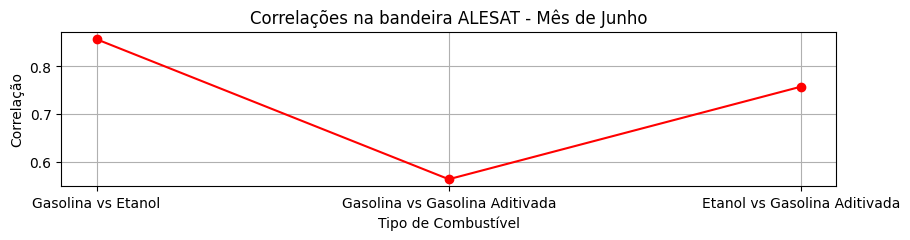

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira BRANCA : 0.50 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira BRANCA : 0.63 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira BRANCA : 0.91 em Junho
--------------------------------------------------


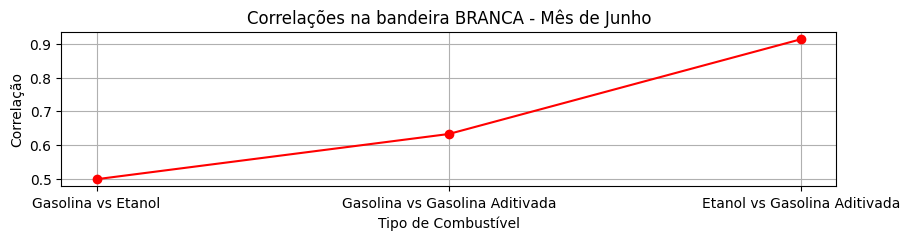

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira IPIRANGA : 0.43 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira IPIRANGA : 0.24 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira IPIRANGA : 0.84 em Junho
--------------------------------------------------


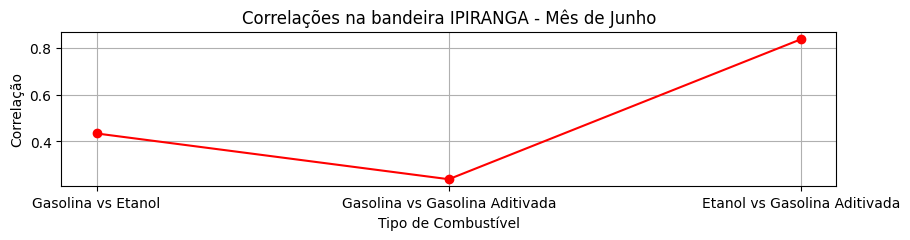

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira RAIZEN : 0.20 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira RAIZEN : 0.29 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira RAIZEN : 0.87 em Junho
--------------------------------------------------


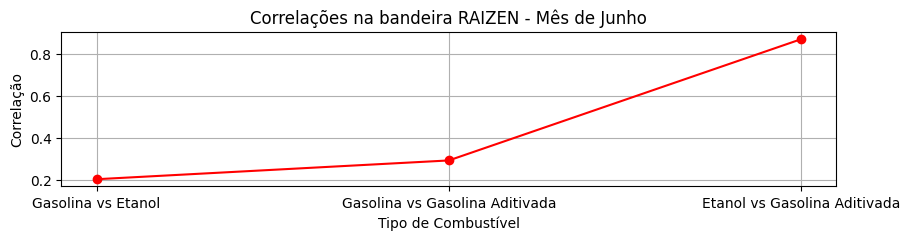

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira SABBÁ : 0.33 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira SABBÁ : 0.29 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira SABBÁ : 0.82 em Junho
--------------------------------------------------


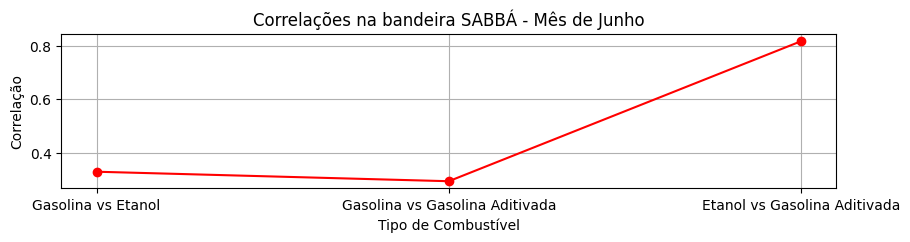

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira SP : 0.77 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira SP : 0.70 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira SP : 0.85 em Junho
--------------------------------------------------


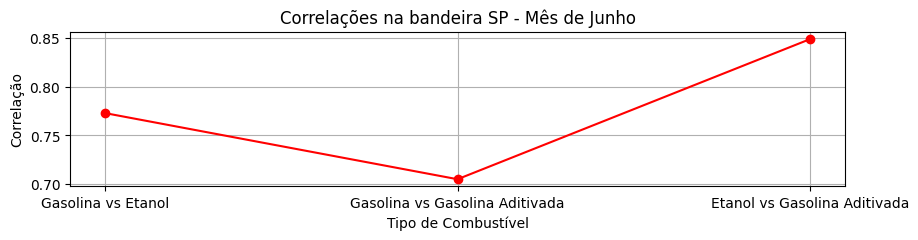

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira VIBRA ENERGIA : 0.69 em Junho
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira VIBRA ENERGIA : 0.70 em Junho
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira VIBRA ENERGIA : 0.93 em Junho
--------------------------------------------------


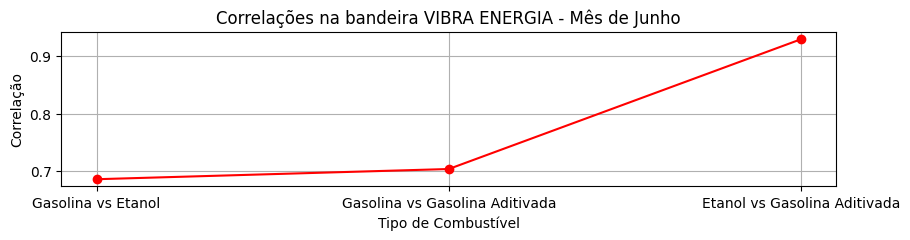

In [ ]:
func_correlacao_bandeira(media_gasolina_cor_ban, media_gasolina_adt_cor_ban, media_etanol_cor_ban, 'Junho',posto)



>- Insight :
Em junho, as correlações de preços dos combustíveis para diferentes bandeiras mostram que os preços da gasolina e do etanol têm relações variáveis, enquanto os preços da gasolina e da gasolina aditivada tendem a ser mais sustentáveis. Essas correlações sugeriam distintas entre os preços dos combustíveis em diferentes bandeiras ao longo desse período.
>- as correlações proximas a zero indicam que quase nao existe relação entre os preços, as relações acima de 0.50 ja demonstram uma relação positiva  moderada.
>- caso houvesse uma relação negativa proximo a -1 a proporção seria inversa, ou seja, se um combustivel subisse o valor a outra cairia na mesma proporção, porem no mes Junho não temos essa correlação.

### >>> Maio

#### >>>> Ajustando os Dados

In [ ]:
# df_ajuste sera usado para selecionar o necessário, renomeando as colunas
df_ajuste_m = maio
df_ajuste_m.columns=['name_region','abbrev_state','nome_munic','prod_combust','dt_coleta','val_litro','unid_medid','bandeira']
df_ajuste_m

name_region abbrev_state       nome_munic        prod_combust  \
0              SE           SP         SOROCABA              ETANOL   
1              SE           SP         SOROCABA            GASOLINA   
2               N           AC  CRUZEIRO DO SUL              ETANOL   
3               N           AC  CRUZEIRO DO SUL  GASOLINA ADITIVADA   
4               N           AC  CRUZEIRO DO SUL            GASOLINA   
...           ...          ...              ...                 ...   
58485          SE           SP         VALINHOS              ETANOL   
58486          SE           SP         VALINHOS  GASOLINA ADITIVADA   
58487          SE           SP         VALINHOS            GASOLINA   
58488          SE           SP     PIRASSUNUNGA              ETANOL   
58489          SE           SP     PIRASSUNUNGA            GASOLINA   

       dt_coleta  val_litro  unid_medid  bandeira  
0     2023-05-01       3.79  R$ / litro    BRANCA  
1     2023-05-01       4.69  R$ / litro    BRANCA  
2     2023-05-01       5.49  R$ / litro  IPIRANGA  
3     2023-05-01       6.97  R$ / litro  IPIRANGA  
4     2023-05-01       6.97  R$ / litro  IPIRANGA  
...          ...        ...         ...       ...  
58485 2023-05-31       3.49  R$ / litro  IPIRANGA  
58486 2023-05-31       4.99  R$ / litro  IPIRANGA  
58487 2023-05-31       4.69  R$ / litro  IPIRANGA  
58488 2023-05-31       3.49  R$ / litro  IPIRANGA  
58489 2023-05-31       4.89  R$ / litro  IPIRANGA  

[58490 rows x 8 columns]

-> Aqui as siglas das regiões serão renomeadas de acordo com o dataser br_uf, e assim facilitar o agrupamento por região

In [ ]:
# renomeando as siglas das regioes usando replace e visualizando
df_ajuste_m['name_region'].replace(['N','S','SE','NE','CO'],['Norte','Sul','Sudeste','Nordeste','Centro Oeste'], inplace =True)
df_ajuste_m['name_region'].unique()

array(['Sudeste', 'Norte', 'Nordeste', 'Centro Oeste', 'Sul'],
      dtype=object)

 - formatando a coluna dt_coleta para uma melhor vizualisação

In [ ]:
# os valores na coluna 'dt_coleta' no formato 'ano/mes/dia'
df_ajuste_m['dt_coleta'] = pd.to_datetime(df_ajuste_m['dt_coleta'], format='%Y/%m/%d')

# Colocando no formato dia/mês/ano
df_ajuste_m['dt_coleta'] = df_ajuste_m['dt_coleta'].dt.strftime('%d/%m/%Y')

df_ajuste_m.head()

name_region abbrev_state       nome_munic        prod_combust   dt_coleta  \
0     Sudeste           SP         SOROCABA              ETANOL  01/05/2023   
1     Sudeste           SP         SOROCABA            GASOLINA  01/05/2023   
2       Norte           AC  CRUZEIRO DO SUL              ETANOL  01/05/2023   
3       Norte           AC  CRUZEIRO DO SUL  GASOLINA ADITIVADA  01/05/2023   
4       Norte           AC  CRUZEIRO DO SUL            GASOLINA  01/05/2023   

   val_litro  unid_medid  bandeira  
0       3.79  R$ / litro    BRANCA  
1       4.69  R$ / litro    BRANCA  
2       5.49  R$ / litro  IPIRANGA  
3       6.97  R$ / litro  IPIRANGA  
4       6.97  R$ / litro  IPIRANGA

#### <font color= bluelight >**>>>> Etanol no mês de Maio**


> - Nessa fase do projeto será feito uma analise sobre o preço do combústivel etanol no mês de Maio/2023;
> - Será feito uma análise do percentual de variação da média dos preços, nível nacional;
> - Calculado a média das cinco regiões e quais tem o valor mais alto;
>- Calculado a média de preços por estado, os estados com maior média;

#####   >> Lendo os dados

In [ ]:
# filtrando o dataset e agrupando os dados do etanol no mês de Junho
df_etanol_maio = df_ajuste_m[df_ajuste_m['prod_combust'] == 'ETANOL']
df_etanol_maio['val_litro'].describe()


count    18997.000000
mean         4.178726
std          0.446702
min          2.990000
25%          3.870000
50%          4.100000
75%          4.490000
max          6.500000
Name: val_litro, dtype: float64

#####>> Percentual de Variação Nacional Maio

>- Foi pego a média de preço do primeiro dia do mês e do ultimo dia, foi calculado o percentual de variação da média do mês


In [ ]:
#chama a funçao do percentual de variaçao nacional do etanol em junho
df_percentual= func_percentual_variac(df_etanol_maio)

*******************************************************
Média de Preço Nacional no Primeiro Dia: 4.28 R$/litro
*******************************************************
Média de Preço Nacional no Último Dia: 4.12 R$/litro
*******************************************************
Média do Preço Nacional do mes: 4.18 R$/litro
*******************************************************
Variação da média: -0.16
*******************************************************
Percentual de Variação da Média: -3.75 %


##### >> Municípios com maior valor de preço do etanol em Maio

In [ ]:
df_etanol_maio[df_etanol_maio['nome_munic'].isnull()].shape[0]

0

In [ ]:
df_etanol_maio['nome_munic'].value_counts()

SAO PAULO                      985
RIO DE JANEIRO                 359
BRASILIA                       236
CURITIBA                       232
FORTALEZA                      220
                              ... 
CRUZEIRO DO SUL                  2
PARAGOMINAS                      2
ALEGRETE                         2
MAGE                             1
LIVRAMENTO DE NOSSA SENHORA      1
Name: nome_munic, Length: 445, dtype: int64

In [ ]:
df_etanol_municipio_m =df_etanol_maio.groupby('nome_munic')['val_litro'].max()
df_etanol_municipio_m_ordem = df_etanol_municipio_m.sort_values(ascending=False)
df_etanol_municipio_m_ordem

nome_munic
DELMIRO GOUVEIA    6.50
PASSO FUNDO        6.49
BAGE               6.29
ARIQUEMES          6.17
ERECHIM            5.99
                   ... 
JOSE BONIFACIO     3.94
VARZEA GRANDE      3.89
CUIABA             3.89
ITAPOLIS           3.89
SORRISO            3.87
Name: val_litro, Length: 445, dtype: float64

#####>> Média de Preços por Estado

>- Usando a função func_agrupa_media, para obter as médias do valor do etanol por estado no mes de Maio

In [ ]:
#  chmando a função e agrupando por estado a media do preço do etanol
df_etanol_uf_maio = func_agrupa_media(df_etanol_maio,'abbrev_state','med_etan_uf_ma')
df_etanol_uf_maio

abbrev_state
AC    4.790000
AL    4.534916
AM    4.658964
AP    5.320000
BA    4.399946
CE    4.635838
DF    4.005254
ES    4.557853
GO    4.018087
MA    4.680193
MG    3.955788
MS    4.052423
MT    3.706612
PA    4.872983
PB    4.048794
PE    4.200126
PI    4.479397
PR    4.192841
RJ    4.545053
RN    4.511043
RO    4.967778
RR    5.040526
RS    4.923096
SC    4.718177
SE    4.294627
SP    3.858461
TO    4.616452
Name: med_etan_uf_ma, dtype: float64

##### >> Criando o DataFrame (Mapa)

>- Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_etanol_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_etanol_uf_maio, on ='abbrev_state')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_etan_uf_ma  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...        4.967778  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...        4.790000  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...        4.658964  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...        5.040526  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...        4.872983

#####>> Gráfico Mapa - Estados

>- criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

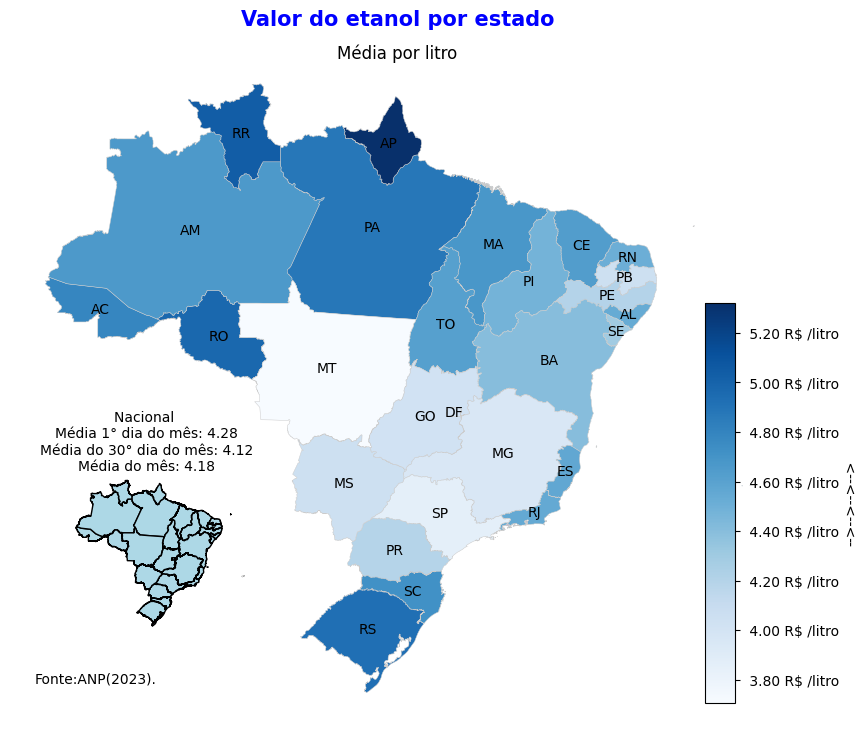

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado e mostrando o mapa com as medias por estado e media nacional
func_gerar_mapa(br_uf_mapa,'med_etan_uf_ma','Valor do etanol por estado','abbrev_state', df_percentual)

#####>> Print Respostas - Estados

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_etanol_uf_maio,'Etanol','Maio')

Os estados estão ordenados pela média mais alta no valor do Etanol no mês de Maio
**************************************************
o estado do AP é o 1º com média de R$ 5.32 /litro
**************************************************
o estado do RR é o 2º com média de R$ 5.04 /litro
**************************************************
o estado do RO é o 3º com média de R$ 4.97 /litro
**************************************************
o estado do RS é o 4º com média de R$ 4.92 /litro
**************************************************
o estado do PA é o 5º com média de R$ 4.87 /litro
**************************************************
o estado do AC é o 6º com média de R$ 4.79 /litro
**************************************************
o estado do SC é o 7º com média de R$ 4.72 /litro
**************************************************
o estado do MA é o 8º com média de R$ 4.68 /litro
**************************************************
o estado do AM é o 9º com média de R$ 4.66 /litro
*********

- Aqui selecionamos os cinco estados com média no valor do litro do etanol, mais alto de acordo com os dados em Maio
  >- Amapa esta em primeiro com um valor de R$ 5,32 por litro;

  >- Roraima esta em segundo  com um valor de R$ 5,04 por litro;

  >- Rondonia esta em terceiro com um valor de R$ 4,97 por litro;

  >- Rio Grande do sul esta em quarto com um valor de R$ 4,92 por litro

  >- Para esta em quinto com um valor de R$ 4,87 por litro

#####>>Média por Região



>- Agrupando o etanol por média por região

In [ ]:
# chamando a funçao e agrupando por regiao
df_etanol_reg_maio = func_agrupa_media(df_etanol_maio,'name_region','med_etan_reg_ma')
df_etanol_reg_maio

name_region
Centro Oeste    3.964711
Nordeste        4.414745
Norte           4.769686
Sudeste         4.006410
Sul             4.470893
Name: med_etan_reg_ma, dtype: float64

#####>> Criando o DataFrame(Mapa) - Região

>- Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_etanol_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_etanol_reg_maio, on ='name_region')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_etan_reg_ma  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...         4.769686  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...         4.769686  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...         4.769686  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...         4.769686  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...         4.769686

#####>> Gráfico Mapa - Região

>- Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

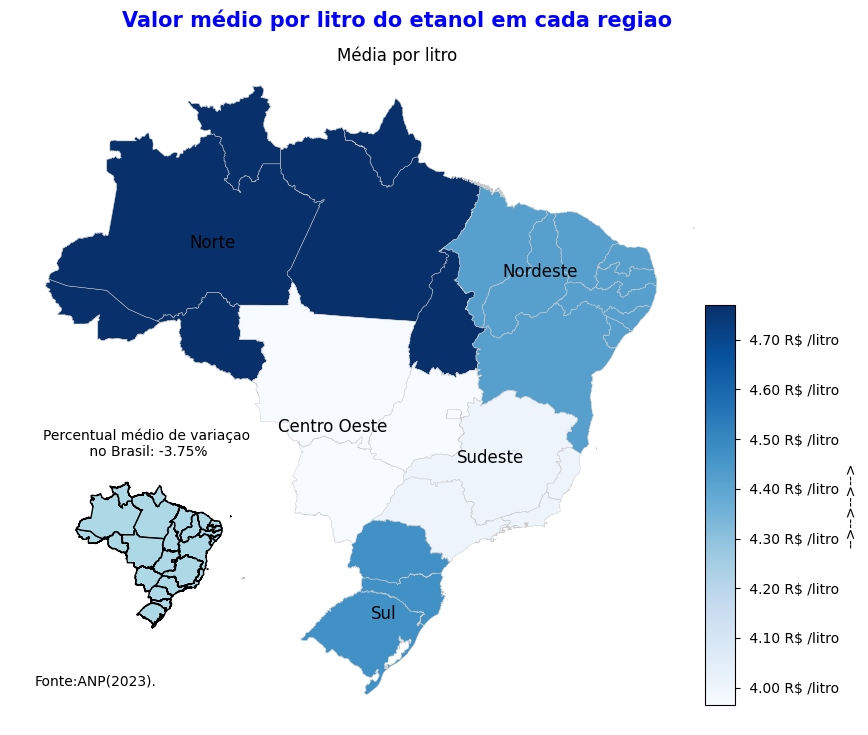

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_etan_reg_ma','Valor médio por litro do etanol em cada regiao','name_region',df_percentual)

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
func_print_ordem_reg(df_etanol_reg_maio,'Etanol','Maio')

Os estados estão ordenados pela média mais alta no valor de Etanol no mês de Maio
**************************************************
A região do Norte é a 1º com média de 4.77 R$/litro
**************************************************
A região do Sul é a 2º com média de 4.47 R$/litro
**************************************************
A região do Nordeste é a 3º com média de 4.41 R$/litro
**************************************************
A região do Sudeste é a 4º com média de 4.01 R$/litro
**************************************************
A região do Centro Oeste é a 5º com média de 3.96 R$/litro


#### <font color= bluelight >**>>>> Gasolina no mês de Maio**
>- Nessa fase do projeto será feito uma analise sobre o preço do combústivel gasolina no mês de Maio/2023;
- Será feito uma análise do percentual de variação da média dos preços, nível nacional;
- Calculado a média das cinco regiões e quais tem o valor mais alto;
- Calculado a média de preços por estado, os estados com maior média;

#####   >> Lendo os dados

In [ ]:
# filtrando o dataset e agrupando os dados do gasolina no mês de Junho
df_gasolina_maio = df_ajuste_m[df_ajuste_m['prod_combust'] == 'GASOLINA']
df_gasolina_maio['val_litro'].describe()


count    22262.000000
mean         5.402364
std          0.385808
min          4.090000
25%          5.130000
50%          5.390000
75%          5.640000
max          7.350000
Name: val_litro, dtype: float64

#####>> Percentual de Variação Nacional Junho

>- Foi pego a média de preço do primeiro dia do mês e do ultimo dia, foi calculado o percentual de variação da média do mês


In [ ]:
#chama a funçao do percentual de variaçao nacional do gasolina em junho
df_percentual= func_percentual_variac(df_gasolina_maio)

*******************************************************
Média de Preço Nacional no Primeiro Dia: 5.49 R$/litro
*******************************************************
Média de Preço Nacional no Último Dia: 5.27 R$/litro
*******************************************************
Média do Preço Nacional do mes: 5.40 R$/litro
*******************************************************
Variação da média: -0.22
*******************************************************
Percentual de Variação da Média: -4.00 %


##### >> Municípios com maior valor de preço do Gasolina em Maio

In [ ]:
df_gasolina_maio[df_gasolina_maio['nome_munic'].isnull()].shape[0]

0

In [ ]:
df_gasolina_maio['nome_munic'].value_counts()

SAO PAULO                      984
RIO DE JANEIRO                 345
BRASILIA                       245
CURITIBA                       240
FORTALEZA                      228
                              ... 
ITAPERUNA                        3
AMARANTE DO MARANHAO             2
CRUZEIRO DO SUL                  2
MAGE                             1
LIVRAMENTO DE NOSSA SENHORA      1
Name: nome_munic, Length: 454, dtype: int64

In [ ]:
df_gasolina_municipio_m =df_gasolina_maio.groupby('nome_munic')['val_litro'].max()
df_gasolina_municipio_m_ordem = df_gasolina_municipio_m.sort_values(ascending=False)
df_gasolina_municipio_m_ordem

nome_munic
TEFE                    7.35
SAO PAULO               7.19
BARUERI                 6.99
SANTO ANDRE             6.99
CRUZEIRO DO SUL         6.97
                        ... 
JACAREI                 5.19
OSORIO                  5.12
LAJEDO                  5.09
BELO JARDIM             5.09
AMARANTE DO MARANHAO    5.05
Name: val_litro, Length: 454, dtype: float64

#####>> Média de Preços por Estado

>- Usando a função func_agrupa_media, para obter as médias do valor da gasolina por estado no mes de Junho

In [ ]:
#  chmando a função e agrupando por estado a media do preço do gasolina
df_gasolina_uf_maio = func_agrupa_media(df_gasolina_maio,'abbrev_state','med_gasol_uf_ma')
df_gasolina_uf_maio

abbrev_state
AC    6.146500
AL    5.776053
AM    6.491634
AP    5.002020
BA    5.522772
CE    5.740840
DF    5.460735
ES    5.448876
GO    5.404586
MA    5.340847
MG    5.258628
MS    5.264013
MT    5.360705
PA    5.574925
PB    5.191802
PE    5.155171
PI    5.538309
PR    5.454060
RJ    5.569244
RN    5.642881
RO    5.889767
RR    5.950706
RS    5.277646
SC    5.518923
SE    5.106387
SP    5.261831
TO    5.719522
Name: med_gasol_uf_ma, dtype: float64

##### >> Criando o DataFrame (Mapa)

>- Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_uf_maio, on ='abbrev_state')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_uf_ma  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...         5.889767  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...         6.146500  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...         6.491634  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...         5.950706  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...         5.574925

#####>> Gráfico Mapa - Estados

>- criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

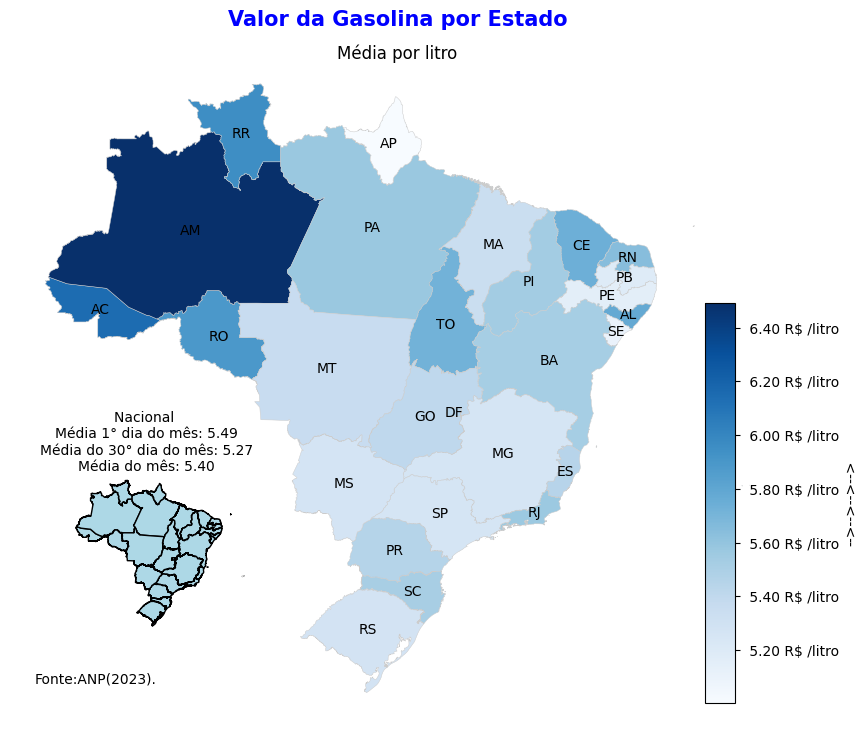

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado e mostrando o mapa com as medias por estado e media nacional
func_gerar_mapa(br_uf_mapa,'med_gasol_uf_ma','Valor da Gasolina por Estado','abbrev_state', df_percentual)

#####>> Print Respostas - Estados

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_gasolina_uf_maio,'Gasolina','Maio')

Os estados estão ordenados pela média mais alta no valor do Gasolina no mês de Maio
**************************************************
o estado do AM é o 1º com média de R$ 6.49 /litro
**************************************************
o estado do AC é o 2º com média de R$ 6.15 /litro
**************************************************
o estado do RR é o 3º com média de R$ 5.95 /litro
**************************************************
o estado do RO é o 4º com média de R$ 5.89 /litro
**************************************************
o estado do AL é o 5º com média de R$ 5.78 /litro
**************************************************
o estado do CE é o 6º com média de R$ 5.74 /litro
**************************************************
o estado do TO é o 7º com média de R$ 5.72 /litro
**************************************************
o estado do RN é o 8º com média de R$ 5.64 /litro
**************************************************
o estado do PA é o 9º com média de R$ 5.57 /litro
*******

- Aqui selecionamos os cinco estados com média no preço do litro da gasolina mais alto de acordo com os dados em Maio
  >- Amazonas esta em primeiro com um valor de R$ 6,49 por litro;

 > - Acre esta em segundo  com um valor de R$ 6,15 por litro;

 > - Roraima esta em terceiro com um valor de R$ 5,95 por litro;

 > - Rondonia esta em quarto com um valor de R$ 5,89 por litro

 > - Alagoas esta em quinto com um valor de R$ 5,78 por litro

#####>>Média por Região



>- Agrupando gasolina por preço médio e região

In [ ]:
# chamando a funçao e agrupando por regiao
df_gasolina_reg_maio = func_agrupa_media(df_gasolina_maio,'name_region','med_gasol_reg_ma')
df_gasolina_reg_maio

name_region
Centro Oeste    5.380092
Nordeste        5.457713
Norte           5.823768
Sudeste         5.315803
Sul             5.400109
Name: med_gasol_reg_ma, dtype: float64

#####>> Criando o DataFrame(Mapa) - Região

>- Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_reg_maio, on ='name_region')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_reg_ma  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...          5.823768  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...          5.823768  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...          5.823768  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...          5.823768  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...          5.823768

#####>> Gráfico Mapa - Região

>- Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

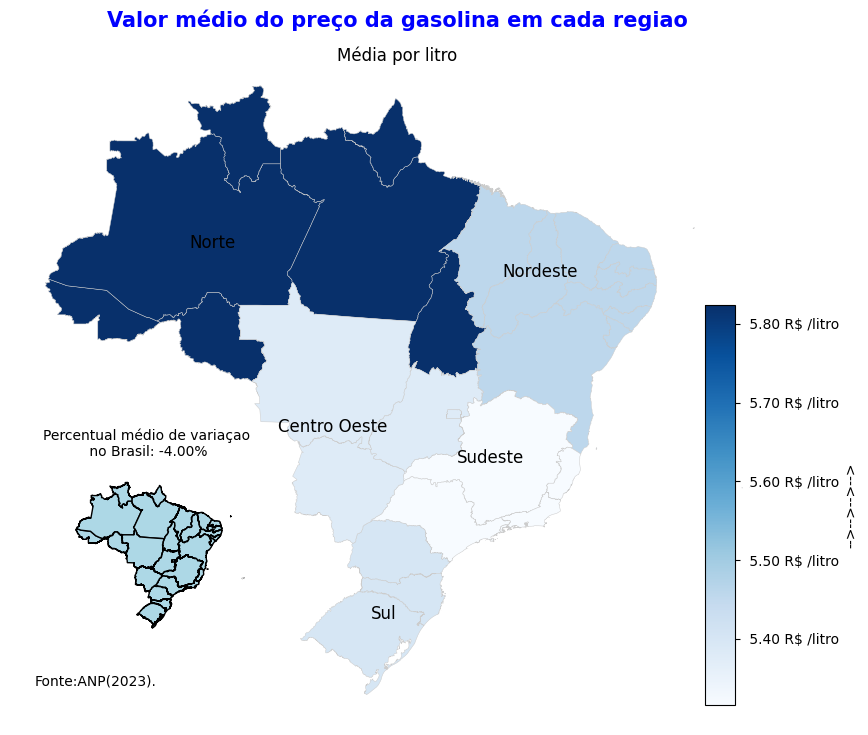

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_gasol_reg_ma','Valor médio do preço da gasolina em cada regiao','name_region',df_percentual)

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
func_print_ordem_reg(df_gasolina_reg_maio,'Gasolina','Maio')

Os estados estão ordenados pela média mais alta no valor de Gasolina no mês de Maio
**************************************************
A região do Norte é a 1º com média de 5.82 R$/litro
**************************************************
A região do Nordeste é a 2º com média de 5.46 R$/litro
**************************************************
A região do Sul é a 3º com média de 5.40 R$/litro
**************************************************
A região do Centro Oeste é a 4º com média de 5.38 R$/litro
**************************************************
A região do Sudeste é a 5º com média de 5.32 R$/litro


#### <font color= bluelight >**>>>> Gasolina Aditivada no mês de Maio**
>- Nessa fase do projeto será feito uma analise sobre o preço do combústivel gasolina aditividano mês de Maio/2023;
- Será feito uma análise do percentual de variação da média dos preços, nível nacional;
- Calculado a média das cinco regiões e quais tem o valor mais alto;
- Calculado a média de preços por estado, os estados com maior média;

#####   >> Lendo os dados

In [ ]:
# filtrando o dataset e agrupando os dados do gasolina no mês de Junho
df_gasolina_adt_maio = df_ajuste_m[df_ajuste_m['prod_combust'] == 'GASOLINA ADITIVADA']
df_gasolina_adt_maio['val_litro'].describe()


count    17231.000000
mean         5.585725
std          0.391724
min          4.490000
25%          5.290000
50%          5.570000
75%          5.840000
max          7.990000
Name: val_litro, dtype: float64

#####>> Percentual de Variação Nacional Maio

>- Foi pego a média de preço do primeiro dia do mês e do ultimo dia, foi calculado o percentual de variação da média do mês


In [ ]:
#chama a funçao do percentual de variaçao nacional do gasolina em junho
df_percentual= func_percentual_variac(df_gasolina_adt_maio)

*******************************************************
Média de Preço Nacional no Primeiro Dia: 5.67 R$/litro
*******************************************************
Média de Preço Nacional no Último Dia: 5.43 R$/litro
*******************************************************
Média do Preço Nacional do mes: 5.59 R$/litro
*******************************************************
Variação da média: -0.24
*******************************************************
Percentual de Variação da Média: -4.31 %


##### >> Municípios com maior valor de preço do Gasolina Aditivada em Maio

In [ ]:
df_gasolina_adt_maio[df_gasolina_adt_maio['nome_munic'].isnull()].shape[0]

0

In [ ]:
df_gasolina_adt_maio['nome_munic'].value_counts()

SAO PAULO          952
RIO DE JANEIRO     376
BRASILIA           229
FORTALEZA          176
PORTO ALEGRE       170
                  ... 
JAGUAQUARA           3
ITACOATIARA          3
GUAIBA               2
CRUZEIRO DO SUL      2
MAGE                 1
Name: nome_munic, Length: 451, dtype: int64

In [ ]:
df_gasolina_adt_municipio_m =df_gasolina_adt_maio.groupby('nome_munic')['val_litro'].max()
df_gasolina_adt_municipio_m_ordem = df_gasolina_adt_municipio_m.sort_values(ascending=False)
df_gasolina_adt_municipio_m_ordem

nome_munic
SAO PAULO          7.99
TEFE               7.33
DELMIRO GOUVEIA    7.04
CRUZEIRO DO SUL    7.02
SANTO ANDRE        6.99
                   ... 
TIMOTEO            5.37
GOIATUBA           5.34
OSORIO             5.29
BELO JARDIM        5.23
LAJEDO             5.19
Name: val_litro, Length: 451, dtype: float64

#####>> Média de Preços por Estado

>- Usando a função func_agrupa_media, para obter as médias do valor do gasolina aditivada por estado no mês de Maio

In [ ]:
#  chmando a função e agrupando por estado a media do preço do gasolina
df_gasolina_adt_uf_maio = func_agrupa_media(df_gasolina_adt_maio,'abbrev_state','med_gasol_adt_uf_ma')
df_gasolina_adt_uf_maio

abbrev_state
AC    6.199038
AL    5.925825
AM    6.481810
AP    5.298462
BA    5.624832
CE    5.859374
DF    5.584847
ES    5.642946
GO    5.533433
MA    5.450846
MG    5.446056
MS    5.478763
MT    5.493750
PA    5.825541
PB    5.360565
PE    5.317364
PI    5.746356
PR    5.611111
RJ    5.715582
RN    5.715023
RO    5.968250
RR    6.025395
RS    5.462984
SC    5.632993
SE    5.196127
SP    5.516646
TO    5.843779
Name: med_gasol_adt_uf_ma, dtype: float64

##### >> Criando o DataFrame (Mapa)

>- Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_adt_uf_maio, on ='abbrev_state')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_adt_uf_ma  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...             5.968250  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...             6.199038  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...             6.481810  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...             6.025395  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...             5.825541

#####>> Gráfico Mapa - Estados

>- criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

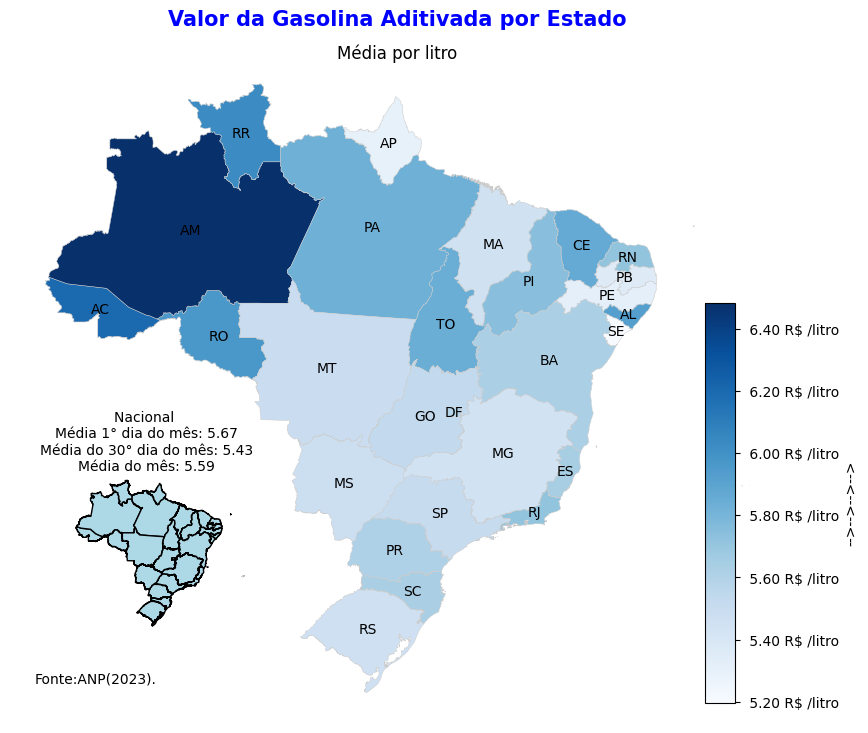

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado e mostrando o mapa com as medias por estado e media nacional
func_gerar_mapa(br_uf_mapa,'med_gasol_adt_uf_ma','Valor da Gasolina Aditivada por Estado','abbrev_state', df_percentual)

#####>> Print Respostas - Estados

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_gasolina_adt_uf_maio,'Gasolina Aditivada','Maio')

Os estados estão ordenados pela média mais alta no valor do Gasolina Aditivada no mês de Maio
**************************************************
o estado do AM é o 1º com média de R$ 6.48 /litro
**************************************************
o estado do AC é o 2º com média de R$ 6.20 /litro
**************************************************
o estado do RR é o 3º com média de R$ 6.03 /litro
**************************************************
o estado do RO é o 4º com média de R$ 5.97 /litro
**************************************************
o estado do AL é o 5º com média de R$ 5.93 /litro
**************************************************
o estado do CE é o 6º com média de R$ 5.86 /litro
**************************************************
o estado do TO é o 7º com média de R$ 5.84 /litro
**************************************************
o estado do PA é o 8º com média de R$ 5.83 /litro
**************************************************
o estado do PI é o 9º com média de R$ 5.75 /lit

- Aqui selecionamos os cinco estados com média no preço do litro da gasolina aditivada mais alto de acordo com os dados em Junho
 > - Amazonas esta em primeiro com um valor de R$ 6,48 por litro;

 > - Acre esta em segundo  com um valor de R$ 6,20 por litro;

 > - Roraima esta em terceiro com um valor de R$ 6,03 por litro;

 > - Rondonia esta em quarto com um valor de R$ 5,97 por litro

 > - Alagoas esta em quinto com um valor de R$ 5,93 por litro

- Analisando os preços mais altos da gasolina aditivada nos cinco estados em junho, insights:

>1. **Variação regional:** A presença desses cinco estados na lista dos preços mais altos da gasolina aditivada sugere que há uma tendência regional de preços elevados. Isso pode estar relacionado a fatores como distância dos centros de refino, infraestrutura de transporte e logística, e políticas estaduais de impostos sobre combustíveis.

>2. **Isolamento geográfico:** Quatro dos estados listados (Amazonas, Acre, Roraima e Rondonia) estão localizados na região Norte do Brasil, que é caracterizada por seu isolamento geográfico em relação ao centro econômico e de refino do país. Essa distância pode aumentar os custos de transporte e, consequentemente, os preços dos combustíveis.

>3. **Impacto do transporte:** A distância desses estados em relação aos centros de produção e refino pode resultar em custos de transporte mais altos. Esses custos são frequentemente repassados aos preços dos combustíveis, o que pode contribuir para os valores elevados.

>4. **Políticas de impostos:** Diferenças nas políticas estaduais de impostos sobre combustíveis também podem influenciar os preços. Alguns estados podem ter impostos mais altos sobre combustíveis, o que contribui para os preços mais elevados.

>5. **Possíveis medidas governamentais:** A lista dos estados com preços mais altos pode chamar a atenção das autoridades estaduais e federais para a necessidade de avaliar políticas que possam aliviar o impacto dos preços dos combustíveis sobre a população.

Em resumo, a análise dos preços mais altos da gasolina aditivada nos estados listados sugere uma combinação de fatores geográficos, econômicos e políticos que influenciam os preços dos combustíveis em cada região.

#####>>Média por Região



>- Agrupando gasolina aditivada por preço médio e região

In [ ]:
# chamando a funçao e agrupando por regiao
df_gasolina_adt_reg_maio = func_agrupa_media(df_gasolina_adt_maio,'name_region','med_gasol_adt_reg_ma')
df_gasolina_adt_reg_maio

name_region
Centro Oeste    5.527218
Nordeste        5.601690
Norte           5.996667
Sudeste         5.545188
Sul             5.549314
Name: med_gasol_adt_reg_ma, dtype: float64

#####>> Criando o DataFrame(Mapa) - Região

>- Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_gasolina_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_gasolina_adt_reg_maio, on ='name_region')
br_uf_mapa.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  med_gasol_adt_reg_ma  
0  MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...              5.996667  
1  MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...              5.996667  
2  MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...              5.996667  
3  MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...              5.996667  
4  MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...              5.996667

#####>> Gráfico Mapa - Região

>- Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the con

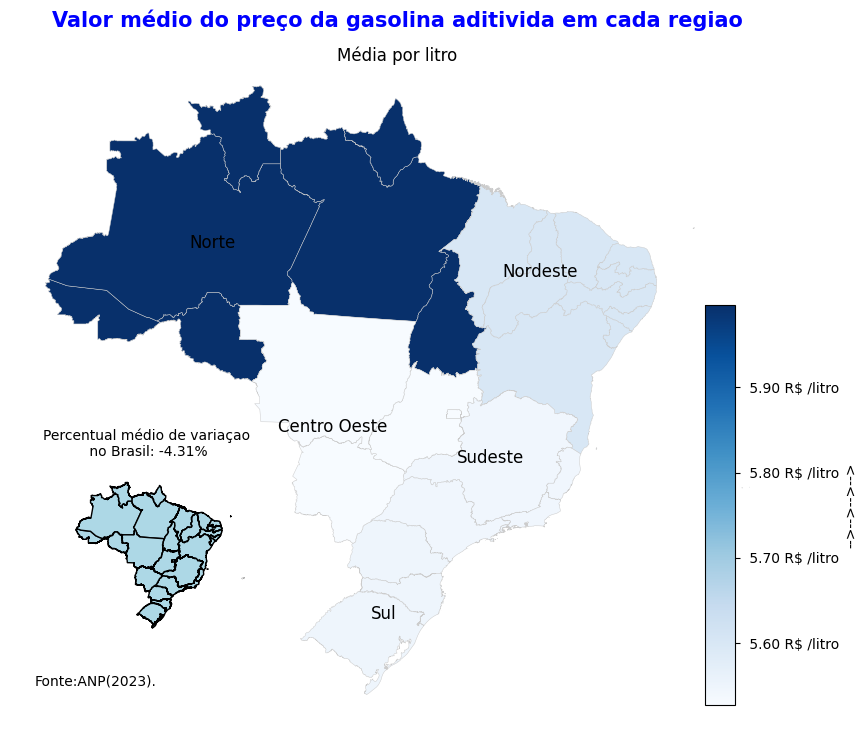

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_gasol_adt_reg_ma','Valor médio do preço da gasolina aditivida em cada regiao','name_region',df_percentual)

>- De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
df_gasolina_adt_reg_maio.head()

name_region
Centro Oeste    5.527218
Nordeste        5.601690
Norte           5.996667
Sudeste         5.545188
Sul             5.549314
Name: med_gasol_adt_reg_ma, dtype: float64

In [ ]:
func_print_ordem_reg(df_gasolina_adt_reg_maio,'Gasolina Aditivada','Maio')

Os estados estão ordenados pela média mais alta no valor de Gasolina Aditivada no mês de Maio
**************************************************
A região do Norte é a 1º com média de 6.00 R$/litro
**************************************************
A região do Nordeste é a 2º com média de 5.60 R$/litro
**************************************************
A região do Sul é a 3º com média de 5.55 R$/litro
**************************************************
A região do Sudeste é a 4º com média de 5.55 R$/litro
**************************************************
A região do Centro Oeste é a 5º com média de 5.53 R$/litro


#####  <font color= bluelight > >>> Analisando as médias de preço da gasolina aditivida nas diferentes regiões no mês de Maio, insights:

> **Disparidades regionais:** As variações nas médias de preço da gasolina entre as regiões indicam diferenças no mercado e nas condições econômicas. A região Norte, por exemplo, apresenta a média mais alta de 6.00, enquanto a região Centro-Oeste possui a média mais baixa de 5.53. Isso sugere que há influências específicas em cada região que afetam os preços.

 > - **Fatores geográficos e logísticos;**
 > - **Produção local;**
 >- **Diferenças na demanda;**
 >- **Políticas e impostos;**
 >- **Variações climáticas;**
 >- **Comportamento do consumidor;**
 >- **Concorrência;**

Em resumo, as diferenças nas médias de preço do etanol entre as regiões podem ser atribuídas a uma combinação de fatores geográficos, econômicos, logísticos, de produção e de comportamento do consumidor.

#### <font color= bluelight > >>> Analisando as médias dos preços do etanol, gasolina e gasolina aditivada nos cinco estados com média mais alta no país no mês de maio, insights:

#####>> Obtendo os dados

              media gasolina  media etanol  media gasolina adt
abbrev_state                                                  
AC                  6.146500      4.790000            6.199038
AL                  5.776053      4.534916            5.925825
AM                  6.491634      4.658964            6.481810
AP                  5.002020      5.320000            5.298462
BA                  5.522772      4.399946            5.624832
CE                  5.740840      4.635838            5.859374
DF                  5.460735      4.005254            5.584847
ES                  5.448876      4.557853            5.642946
GO                  5.404586      4.018087            5.533433
MA                  5.340847      4.680193            5.450846
MG                  5.258628      3.955788            5.446056
MS                  5.264013      4.052423            5.478763
MT                  5.360705      3.706612            5.493750
PA                  5.574925      4.872983            5

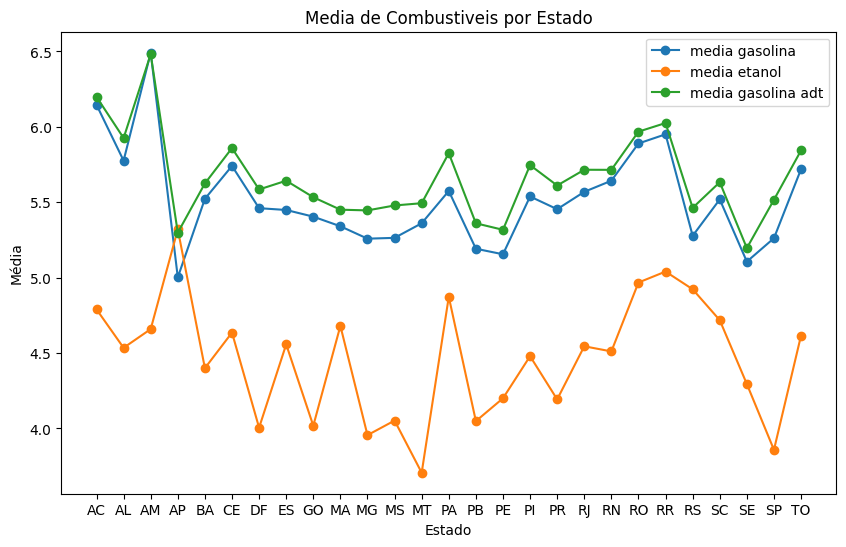

In [ ]:
df_mostra_analise_estado =pd.DataFrame({'media gasolina':df_gasolina_uf_maio,
                        'media etanol':df_etanol_uf_maio,
                        'media gasolina adt':df_gasolina_adt_uf_maio})
func_mostra_analise_grafico(df_mostra_analise_estado)



>1. **Diferenças regionais consistentes:** Os estados da região Norte, como Amazonas, Acre, Roraima e Rondônia, tendem a ter preços mais elevados para todos os tipos de combustíveis. Essa tendência sugere uma influência regional sobre os preços dos combustíveis.

>2. **Isolamento geográfico e logística:** A região Norte está geograficamente isolada das áreas de produção e refino de combustíveis no Brasil. Isso pode aumentar os custos de transporte e logística.

>3. **Influência de impostos:** Alguns estados podem ter políticas fiscais que impactam os preços dos combustíveis. A presença de Amazonas, Acre e Rondônia na lista dos preços mais altos sugere que os impostos estaduais podem estar contribuindo para os preços elevados.

>4. **Possíveis políticas de mitigação:** A lista dos estados com preços mais altos pode chamar a atenção das autoridades governamentais para a necessidade de avaliar políticas que possam reduzir o impacto dos preços dos combustíveis sobre a população. Isso pode incluir medidas para reduzir impostos ou incentivar a produção local.

Em resumo, os insights extraídos dessas informações refletem a complexidade das dinâmicas de preços dos combustíveis em diferentes regiões do Brasil.

#### <font color= bluelight> >>> Correlação das médias diarias dos combustiveis e as regiões brasileiras em Maio

- vamos pegar o df_etanol_maio que ja esta filtrado por categoria, e fazer um agrupamento por região

##### >> Agrupando por região a média diaria <font color= bluelight> >> Etanol

In [ ]:
media_diaria_etanol_m = df_etanol_maio.groupby(['dt_coleta','name_region'])['val_litro'].mean().unstack()
media_diaria_etanol_m

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/05/2023       4.150690  4.381905  4.858966  4.159891  4.485255
02/05/2023       4.094505  4.416394  4.798250  4.232930  4.560559
03/05/2023       4.143398  4.467765  4.853443  4.190426  4.721333
04/05/2023       4.140588  4.409873  4.570000  4.137190  4.464579
05/05/2023       4.156857  4.425000  5.320000  4.167910  4.301429
08/05/2023       4.168315  4.320469  4.722927  4.134042  4.521667
09/05/2023       4.095859  4.459922  4.764667  4.159045  4.496761
10/05/2023       4.004342  4.473094  4.680385  4.132810  4.631600
11/05/2023       4.138444  4.392283  4.895000  4.048915  4.620247
12/05/2023       4.040500  4.490000       NaN  4.048500  4.190000
15/05/2023       4.023182  4.417563  4.765400  4.058456  4.524419
16/05/2023       3.989450  4.381589  4.732449  4.052418  4.539471
17/05/2023       4.024737  4.465373  4.956154  3.971051  4.612803
18/05/2023       4.055000  4.421382  4.712500  3.919806  4.295200
19/05/2023       3.940526  4.515000  4.365000  4.053750  4.490000
22/05/2023       3.885778  4.356235  4.662600  3.844333  4.516267
23/05/2023       3.870200  4.407783  4.695294  3.863537  4.374599
24/05/2023       3.799184  4.413370  4.960417  3.913341  4.367241
25/05/2023       3.734058  4.408088  4.856667  3.782527  4.176885
26/05/2023       3.891538  4.642000       NaN  3.574516  4.290000
29/05/2023       3.793125  4.399310  4.657547  3.787438  4.355460
30/05/2023       3.795085  4.375380  4.747015  3.803774  4.339028
31/05/2023       3.740565  4.398369  4.824333  3.908912  4.279007

##### >> Verificando a ocorrência de valores nulos

In [ ]:
nulos = media_diaria_etanol_m.isna().sum()
nulos

name_region
Centro Oeste    0
Nordeste        0
Norte           2
Sudeste         0
Sul             0
dtype: int64

>- como resultado vimos que existe alguns dias com média diaria nula em algumas regiões, dessa forma terão que ser tratados esses registros

##### >> Tratando os valores nulos

>- Usaremos o método 'ffill' para colocar no espaço nulo a média anterior

In [ ]:
# usando o metodo ffill para colocar um valor medio nos valores nulos
media_corrigido_etan =media_diaria_etanol_m.fillna(method='ffill')
media_corrigido_etan

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/05/2023       4.150690  4.381905  4.858966  4.159891  4.485255
02/05/2023       4.094505  4.416394  4.798250  4.232930  4.560559
03/05/2023       4.143398  4.467765  4.853443  4.190426  4.721333
04/05/2023       4.140588  4.409873  4.570000  4.137190  4.464579
05/05/2023       4.156857  4.425000  5.320000  4.167910  4.301429
08/05/2023       4.168315  4.320469  4.722927  4.134042  4.521667
09/05/2023       4.095859  4.459922  4.764667  4.159045  4.496761
10/05/2023       4.004342  4.473094  4.680385  4.132810  4.631600
11/05/2023       4.138444  4.392283  4.895000  4.048915  4.620247
12/05/2023       4.040500  4.490000  4.895000  4.048500  4.190000
15/05/2023       4.023182  4.417563  4.765400  4.058456  4.524419
16/05/2023       3.989450  4.381589  4.732449  4.052418  4.539471
17/05/2023       4.024737  4.465373  4.956154  3.971051  4.612803
18/05/2023       4.055000  4.421382  4.712500  3.919806  4.295200
19/05/2023       3.940526  4.515000  4.365000  4.053750  4.490000
22/05/2023       3.885778  4.356235  4.662600  3.844333  4.516267
23/05/2023       3.870200  4.407783  4.695294  3.863537  4.374599
24/05/2023       3.799184  4.413370  4.960417  3.913341  4.367241
25/05/2023       3.734058  4.408088  4.856667  3.782527  4.176885
26/05/2023       3.891538  4.642000  4.856667  3.574516  4.290000
29/05/2023       3.793125  4.399310  4.657547  3.787438  4.355460
30/05/2023       3.795085  4.375380  4.747015  3.803774  4.339028
31/05/2023       3.740565  4.398369  4.824333  3.908912  4.279007

##### >> Agrupando por região a média diaria <font color= bluelight> >> Gasolina

In [ ]:
media_diaria_gasolina_m =df_gasolina_maio.groupby(['dt_coleta','name_region'])['val_litro'].mean().unstack()
media_diaria_gasolina_m

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/05/2023       5.584828  5.617965  6.195000  5.398164  5.434511
02/05/2023       5.470702  5.608161  6.034125  5.437188  5.567617
03/05/2023       5.567500  5.576469  5.854538  5.464128  5.588224
04/05/2023       5.474706  5.573770  5.911064  5.425051  5.554488
05/05/2023       5.481622  5.632000  5.563333  5.524930  5.522222
08/05/2023       5.441236  5.460647  6.024096  5.401422  5.511147
09/05/2023       5.544857  5.574048  5.981774  5.414197  5.461661
10/05/2023       5.441899  5.561470  5.813611  5.430900  5.535000
11/05/2023       5.663111  5.502162  5.659107  5.414545  5.525478
12/05/2023       5.485500  5.590000       NaN  5.478333  5.515000
15/05/2023       5.507463  5.544392  5.883366  5.389444  5.403565
16/05/2023       5.496228  5.489897  5.850594  5.428158  5.515812
17/05/2023       5.468478  5.552596  6.147581  5.361259  5.492594
18/05/2023       5.318000  5.492759  5.966500  5.305667  5.388500
19/05/2023       5.271579  5.376667  5.556667  5.382857  5.550000
22/05/2023       5.185699  5.314103  5.697590  5.176623  5.242000
23/05/2023       5.346140  5.349922  5.827025  5.154453  5.246454
24/05/2023       5.161458  5.374712  5.572738  5.201444  5.307778
25/05/2023       5.123816  5.333816  5.740377  5.167887  5.176761
26/05/2023       5.388077  5.643333  5.640000  5.011563  5.390000
29/05/2023       5.263621  5.332350  5.557766  5.128056  5.223883
30/05/2023       5.225678  5.316506  5.579518  5.120017  5.282630
31/05/2023       5.172652  5.259169  5.882651  5.215980  5.192028

##### >> Verificando a ocorrência de valores nulos

In [ ]:
nulos = media_diaria_gasolina_m.isna().sum()
nulos

name_region
Centro Oeste    0
Nordeste        0
Norte           1
Sudeste         0
Sul             0
dtype: int64

>- como resultado vimos que existe um dia com média diaria nula em uma região, dessa forma tera que ser tratados esse registro

##### >> Tratando os valores nulos

>- Usaremos o método 'ffill' para colocar no espaço nulo a média anterior

In [ ]:
media_corrigido_gasol =media_diaria_gasolina_m.fillna(method='ffill')
media_corrigido_gasol

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/05/2023       5.584828  5.617965  6.195000  5.398164  5.434511
02/05/2023       5.470702  5.608161  6.034125  5.437188  5.567617
03/05/2023       5.567500  5.576469  5.854538  5.464128  5.588224
04/05/2023       5.474706  5.573770  5.911064  5.425051  5.554488
05/05/2023       5.481622  5.632000  5.563333  5.524930  5.522222
08/05/2023       5.441236  5.460647  6.024096  5.401422  5.511147
09/05/2023       5.544857  5.574048  5.981774  5.414197  5.461661
10/05/2023       5.441899  5.561470  5.813611  5.430900  5.535000
11/05/2023       5.663111  5.502162  5.659107  5.414545  5.525478
12/05/2023       5.485500  5.590000  5.659107  5.478333  5.515000
15/05/2023       5.507463  5.544392  5.883366  5.389444  5.403565
16/05/2023       5.496228  5.489897  5.850594  5.428158  5.515812
17/05/2023       5.468478  5.552596  6.147581  5.361259  5.492594
18/05/2023       5.318000  5.492759  5.966500  5.305667  5.388500
19/05/2023       5.271579  5.376667  5.556667  5.382857  5.550000
22/05/2023       5.185699  5.314103  5.697590  5.176623  5.242000
23/05/2023       5.346140  5.349922  5.827025  5.154453  5.246454
24/05/2023       5.161458  5.374712  5.572738  5.201444  5.307778
25/05/2023       5.123816  5.333816  5.740377  5.167887  5.176761
26/05/2023       5.388077  5.643333  5.640000  5.011563  5.390000
29/05/2023       5.263621  5.332350  5.557766  5.128056  5.223883
30/05/2023       5.225678  5.316506  5.579518  5.120017  5.282630
31/05/2023       5.172652  5.259169  5.882651  5.215980  5.192028

##### >> Agrupando por região a média diaria <font color= bluelight> >> Gasolina Adt

In [ ]:
media_diaria_gasolina_adt_m =df_gasolina_adt_maio.groupby(['dt_coleta','name_region'])['val_litro'].mean().unstack()
media_diaria_gasolina_adt_m

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/05/2023       5.713704  5.782143  6.358857  5.633850  5.579108
02/05/2023       5.618209  5.769483  6.123966  5.683117  5.696139
03/05/2023       5.691406  5.692845  5.995326  5.696722  5.754010
04/05/2023       5.590000  5.733500  6.087407  5.609899  5.704087
05/05/2023       5.621837  5.720000  6.025294  5.686727  5.708571
08/05/2023       5.606327  5.648416  6.175323  5.621027  5.659849
09/05/2023       5.671290  5.733624  6.087558  5.660989  5.623908
10/05/2023       5.619153  5.706582  6.034468  5.648835  5.673829
11/05/2023       5.791667  5.579250  6.024074  5.622021  5.671758
12/05/2023       5.664545  5.800000       NaN  5.644762  5.515000
15/05/2023       5.651842  5.713434  6.135634  5.619783  5.563934
16/05/2023       5.613194  5.640917  6.017465  5.684279  5.637471
17/05/2023       5.626105  5.673450  6.236939  5.577864  5.651947
18/05/2023       5.636000  5.612843  5.978378  5.497484  5.530132
19/05/2023       5.275000  5.610000  5.720000  5.488571  5.560000
22/05/2023       5.322241  5.462993  5.951167  5.418522  5.392342
23/05/2023       5.529189  5.495316  5.880241  5.409665  5.407202
24/05/2023       5.310441  5.515023  5.778909  5.421928  5.461197
25/05/2023       5.300625  5.479346  5.954571  5.375872  5.325968
26/05/2023       5.628125  5.732727  5.890000  5.242727  5.490000
29/05/2023       5.402361  5.488974  5.815968  5.369316  5.370984
30/05/2023       5.359605  5.459436  5.771913  5.357596  5.427816
31/05/2023       5.342278  5.393307  5.937963  5.434680  5.362864

##### >> Verificando a ocorrência de valores nulos

In [ ]:
nulos = media_diaria_gasolina_adt_m.isna().sum()
nulos

name_region
Centro Oeste    0
Nordeste        0
Norte           1
Sudeste         0
Sul             0
dtype: int64

>- como resultado vimos que existe um dia com média diaria nula em uma região, dessa forma tera que ser tratado.

##### >> Tratando os valores nulos

>- Usaremos o método 'ffill' para colocar no espaço nulo a média anterior

In [ ]:
media_corrigido_gasol_adt =media_diaria_gasolina_adt_m.fillna(method='ffill')
media_corrigido_gasol_adt

name_region  Centro Oeste  Nordeste     Norte   Sudeste       Sul
dt_coleta                                                        
01/05/2023       5.713704  5.782143  6.358857  5.633850  5.579108
02/05/2023       5.618209  5.769483  6.123966  5.683117  5.696139
03/05/2023       5.691406  5.692845  5.995326  5.696722  5.754010
04/05/2023       5.590000  5.733500  6.087407  5.609899  5.704087
05/05/2023       5.621837  5.720000  6.025294  5.686727  5.708571
08/05/2023       5.606327  5.648416  6.175323  5.621027  5.659849
09/05/2023       5.671290  5.733624  6.087558  5.660989  5.623908
10/05/2023       5.619153  5.706582  6.034468  5.648835  5.673829
11/05/2023       5.791667  5.579250  6.024074  5.622021  5.671758
12/05/2023       5.664545  5.800000  6.024074  5.644762  5.515000
15/05/2023       5.651842  5.713434  6.135634  5.619783  5.563934
16/05/2023       5.613194  5.640917  6.017465  5.684279  5.637471
17/05/2023       5.626105  5.673450  6.236939  5.577864  5.651947
18/05/2023       5.636000  5.612843  5.978378  5.497484  5.530132
19/05/2023       5.275000  5.610000  5.720000  5.488571  5.560000
22/05/2023       5.322241  5.462993  5.951167  5.418522  5.392342
23/05/2023       5.529189  5.495316  5.880241  5.409665  5.407202
24/05/2023       5.310441  5.515023  5.778909  5.421928  5.461197
25/05/2023       5.300625  5.479346  5.954571  5.375872  5.325968
26/05/2023       5.628125  5.732727  5.890000  5.242727  5.490000
29/05/2023       5.402361  5.488974  5.815968  5.369316  5.370984
30/05/2023       5.359605  5.459436  5.771913  5.357596  5.427816
31/05/2023       5.342278  5.393307  5.937963  5.434680  5.362864

##### >><font color= bluelight> Correlação Sul

**************************************************
Correlação de gasolina com etanol no mês de Maio na região Sul: 0.59
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Maio na região Sul: 0.94
**************************************************
Correlação de etanol com gasolina aditivada no mês de Maio na região Sul: 0.68


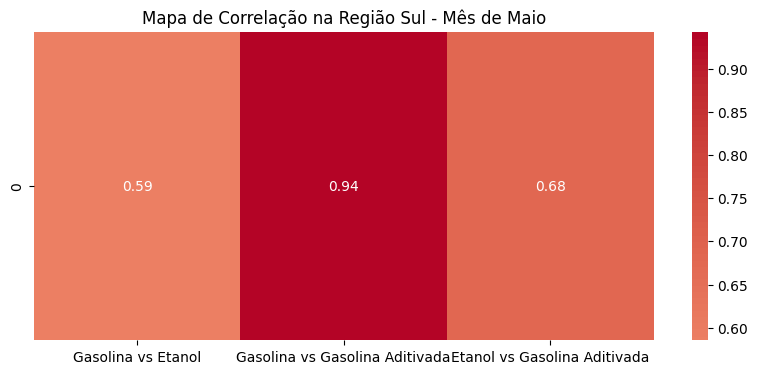

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Sul', 'Maio')

- Existe uma variação moderada entre os preços da gasolina e do etanol no mês de Maio na região Sul. Isso sugere que os preços da gasolina e do etanol têm alguma relação, indicada por uma correlação positiva moderada de 0.59.

- Existe uma relação muito forte entre os preços da gasolina e da gasolina aditivada no mês de Maio na região Sul. Isso indica que os preços estão altamente correlacionados e tendem a se mover em conjunto, como evidenciado por uma correlação positiva forte de 0.94.

-  etanol com gasolina aditivada no mês de Maio na região Sul: 0.68
Existe uma relação moderada entre os preços do etanol e da gasolina aditivada no mês de Maio na região Sul. Isso sugere que os preços desses dois combustíveis têm alguma relação, conforme indicado por uma correlação positiva moderada


##### >><font color= bluelight> Correlação Norte

**************************************************
Correlação de gasolina com etanol no mês de Maio na região Norte: -0.03
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Maio na região Norte: 0.83
**************************************************
Correlação de etanol com gasolina aditivada no mês de Maio na região Norte: 0.28


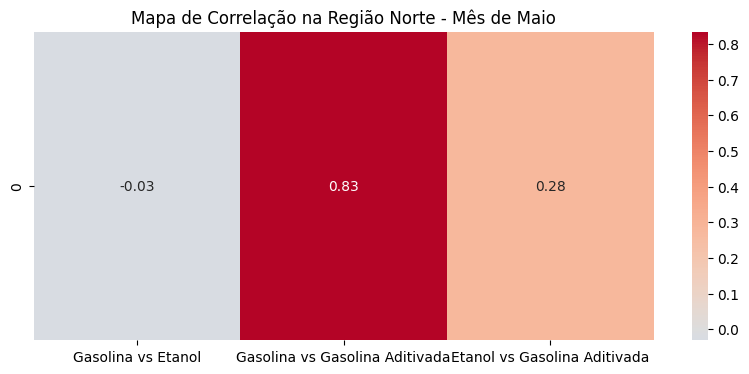

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Norte', 'Maio')

- Não há uma relação significativa entre os preços da gasolina e do etanol no mês de Maio na região Norte. A correlação negativa próxima de zero (correlação de -0.03) sugere que os preços desses dois combustíveis não estão linearmente relacionados.

- Existe uma relação positiva forte entre os preços da gasolina e da gasolina aditivada no mês de Maio na região Norte. Isso indica que os preços desses dois tipos de gasolina estão correlacionados e tendem a se mover em conjunto, como evidenciado por uma correlação positiva forte de 0.83."

- Tem uma relação moderada entre os preços do etanol e da gasolina aditivada no mês de Maio na região Norte. Isso sugere que os preços desses dois combustíveis têm alguma relação, conforme indicado por uma correlação positiva moderada de 0.28.

##### >><font color= bluelight> Correlação Nordeste

**************************************************
Correlação de gasolina com etanol no mês de Maio na região Nordeste: 0.43
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Maio na região Nordeste: 0.96
**************************************************
Correlação de etanol com gasolina aditivada no mês de Maio na região Nordeste: 0.40


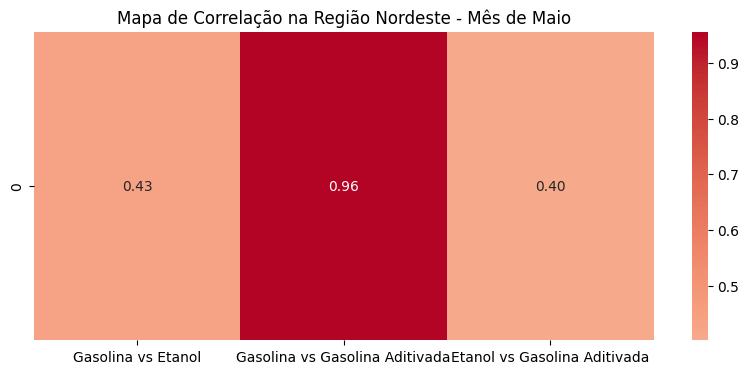

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Nordeste', 'Maio')

- Existe uma relação moderada entre os preços da gasolina e do etanol no mês de Maio na região Nordeste. Isso sugere que os preços da gasolina e do etanol estão relacionados positivamente, com uma correlação de 0.43.

- Tem relação muito forte entre os preços da gasolina e da gasolina aditivada no mês de Maio na região Nordeste. Isso indica que os preços desses dois tipos de gasolina estão altamente correlacionados e tendem a se mover em conjunto, com uma correlação positiva forte de 0.96.

- Relação moderada entre os preços do etanol e da gasolina aditivada no mês de Maio na região Nordeste. Isso sugere que os preços desses dois combustíveis têm alguma relação, como indicado por uma correlação positiva moderada de 0.40.

##### >><font color= bluelight> Correlação Sudeste

**************************************************
Correlação de gasolina com etanol no mês de Maio na região Sudeste: 0.94
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Maio na região Sudeste: 0.97
**************************************************
Correlação de etanol com gasolina aditivada no mês de Maio na região Sudeste: 0.95


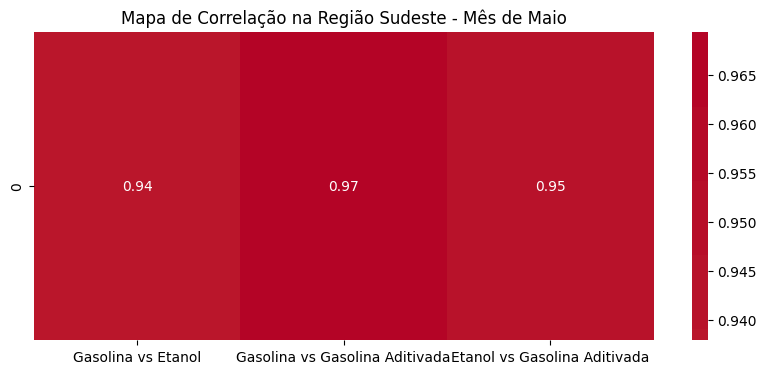

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Sudeste', 'Maio')

- Existe uma relação muito significativa entre os preços da gasolina e do etanol durante o mês de Maio na região Sudeste. Isso sugere que os valores desses combustíveis estão fortemente correlacionados, com uma correlação positiva de 0.94.

- Uma relação extremamente forte entre os preços da gasolina e da gasolina aditivada no mês de Maio na região Sudeste. Isso indica que os preços desses dois tipos de gasolina estão altamente interligados e tendem a variar de maneira sincronizada, com uma correlação positiva elevada de 0.97

- Há uma relação muito sólida entre os preços do etanol e da gasolina aditivada no mês de Maio na região Sudeste. Isso sugere que os preços desses dois combustíveis estão relacionados e tendem a se movimentar juntos, com uma correlação positiva bastante acentuada de 0.95.

-

##### >><font color= bluelight> Correlação Centro Oeste

**************************************************
Correlação de gasolina com etanol no mês de Maio na região Centro Oeste: 0.87
**************************************************
Correlação de gasolina com gasolina aditivada no mês de Maio na região Centro Oeste: 0.94
**************************************************
Correlação de etanol com gasolina aditivada no mês de Maio na região Centro Oeste: 0.82


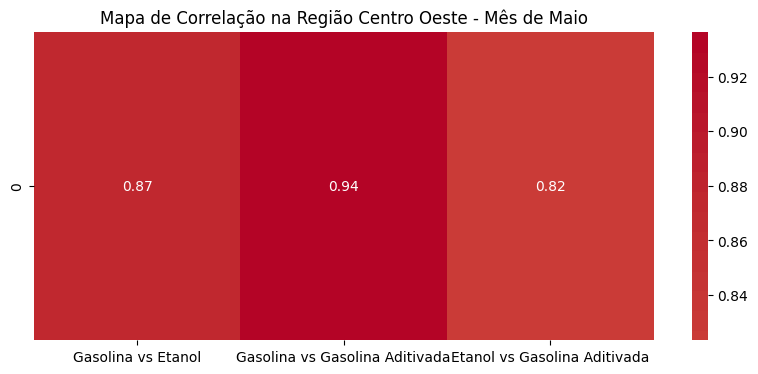

In [ ]:
func_correlacao_regiao(media_corrigido_gasol, media_corrigido_etan, media_corrigido_gasol_adt, 'Centro Oeste', 'Maio')

- Uma relação sólida é identificada entre os preços da gasolina e do etanol durante o mês de Maio na região Centro Oeste. Isso sugere que os preços desses combustíveis estão correlacionados, com uma correlação positiva de 0.87.

- Existe uma relação significativa entre os preços da gasolina e da gasolina aditivada no mês de Maio na região Centro Oeste. Isso indica que os preços desses dois tipos de gasolina estão correlacionados, com uma correlação positiva de 0.94.

- Há uma relação considerável entre os preços do etanol e da gasolina aditivada no mês de Maio na região Centro Oeste. Isso sugere que os preços desses dois combustíveis estão relacionados, com uma correlação positiva de 0.82.

####  <font color= bluelight> >>> Correlação das médias diarias dos combustiveis e bandeiras

#####<font color= bluelight> >> Gasolina

######>> Lendo os Dados

In [ ]:
media_diaria_gasolina_ban_m = df_gasolina_maio.groupby(['dt_coleta','bandeira'])['val_litro'].mean().unstack()
media_diaria_gasolina_ban_m

bandeira    AIR BP    ALESAT  AMERICANOIL   ATEM' S  ATLÂNTICA    BRANCA  \
dt_coleta                                                                  
01/05/2023     NaN  5.481111          NaN  6.587143   5.890000  5.347609   
02/05/2023     NaN  5.457059         5.59  6.480000   5.202500  5.424143   
03/05/2023    5.74  5.605510          NaN  5.945000   5.552500  5.446264   
04/05/2023     NaN  5.594250          NaN  6.364000   5.710000  5.388633   
05/05/2023     NaN  5.706250          NaN  5.070000        NaN  5.462800   
08/05/2023     NaN  5.445556          NaN  6.587143   5.173333  5.351394   
09/05/2023     NaN  5.541000          NaN  6.223636   5.290000  5.419367   
10/05/2023    5.63  5.457105          NaN  5.845000   5.606000  5.384243   
11/05/2023     NaN  5.544839          NaN  6.345000   6.125000  5.352974   
12/05/2023     NaN  5.590000          NaN       NaN        NaN  5.438261   
15/05/2023     NaN  5.453182          NaN  6.587143   5.430000  5.335383   
16/05/2023     NaN  5.552982          NaN  6.283333   5.827500  5.412341   
17/05/2023    5.63  5.430217          NaN  6.550000   4.890000  5.387761   
18/05/2023     NaN  5.436842         5.79  6.233333        NaN  5.308352   
19/05/2023     NaN       NaN          NaN       NaN        NaN  5.317647   
22/05/2023     NaN  5.264219          NaN  6.288750   5.085000  5.140000   
23/05/2023    5.53  5.298947          NaN  6.123333        NaN  5.221166   
24/05/2023     NaN  5.200000          NaN  6.126667   5.436667  5.201095   
25/05/2023     NaN  5.246667          NaN  6.293333   5.960000  5.172775   
26/05/2023     NaN  5.800000          NaN       NaN        NaN  5.130000   
29/05/2023     NaN  5.205306          NaN  5.988571   5.440000  5.123280   
30/05/2023    5.53  5.201875         5.39  5.835714   5.176667  5.192041   
31/05/2023     NaN  5.330784          NaN  6.212000   5.290000  5.230332   

bandeira     CHARRUA  CIAPETRO  DIBRAPE    DISLUB  ...        SP     STANG  \
dt_coleta                                          ...                       
01/05/2023  5.490000  5.550000      NaN  5.840000  ...       NaN  5.130000   
02/05/2023  5.470000  5.510000      NaN  5.267500  ...  5.870000  5.430000   
03/05/2023  5.507500  5.590000      NaN  5.562000  ...  5.781429  5.320000   
04/05/2023  5.486667       NaN      NaN       NaN  ...  5.960000  5.222500   
05/05/2023       NaN       NaN     5.09       NaN  ...       NaN       NaN   
08/05/2023  5.090000  5.570000      NaN  5.640000  ...  5.870000  5.123333   
09/05/2023  5.381667       NaN      NaN  5.300000  ...  5.798333  5.570000   
10/05/2023  5.510000  5.290000     5.09  5.533333  ...  5.923333  5.410000   
11/05/2023  5.490000       NaN      NaN       NaN  ...  5.690000  5.256667   
12/05/2023       NaN       NaN      NaN       NaN  ...       NaN  5.515000   
15/05/2023  5.090000  5.520000      NaN  5.640000  ...  5.815000  5.116667   
16/05/2023  5.253333  5.670000      NaN  5.522500  ...  5.780000  5.505000   
17/05/2023  5.538000  5.215000      NaN  5.250000  ...  5.841429  5.566667   
18/05/2023       NaN  5.190000      NaN       NaN  ...       NaN       NaN   
19/05/2023       NaN       NaN      NaN       NaN  ...       NaN       NaN   
22/05/2023  5.213333  5.120000      NaN  4.980000  ...  5.603333  5.280000   
23/05/2023  5.090000  5.470000     4.89  5.536667  ...  5.680000  5.285000   
24/05/2023  5.386667  5.190000      NaN  5.243333  ...  5.560000  5.276000   
25/05/2023       NaN       NaN      NaN       NaN  ...  5.880000       NaN   
26/05/2023       NaN       NaN      NaN       NaN  ...       NaN  5.190000   
29/05/2023  5.196667  5.056667      NaN  5.402500  ...  5.650000  5.110000   
30/05/2023  5.306667  5.170000     5.47  4.955000  ...  5.295000  5.197143   
31/05/2023  5.200000  5.190000      NaN  5.317500  ...  5.505000  5.340000   

bandeira    SUL COMBUSTÍVEIS    TAURUS  TDC DISTRIBUIDORA  TEMAPE  \
dt_coleta                                                           
01/05/2023

> - aqui percebemos que o número de colunas ou de bandeiras é maior que o do etanol tem cinco bandeiras a mais.

######>> obtendo o numero de bandeiras e quantos registros possui

In [ ]:
df_gasolina_maio['bandeira'].value_counts()

BRANCA                  7619
VIBRA ENERGIA           4764
IPIRANGA                4703
RAIZEN                  3084
ALESAT                   894
SABBÁ                    210
ATEM' S                  102
RAIZEN MIME               96
RODOIL                    81
EQUADOR                   64
TAURUS                    59
SP                        59
STANG                     58
CHARRUA                   55
DISLUB                    48
ATLÂNTICA                 41
POTENCIAL                 35
TOTALENERGIES             34
CIAPETRO                  27
MAXSUL                    26
PETROX DISTRIBUIDORA      26
PETROBAHIA                22
TDC DISTRIBUIDORA         17
RIO BRANCO                15
MASUT DISTRIBUIDORA       14
FAN                       14
IDAZA                     12
LARCO                      9
D`MAIS                     8
TEMAPE                     8
SETTA DISTRIBUIDORA        6
SUL COMBUSTÍVEIS           6
AIR BP                     5
UNI                        5
ESTRADA       

>- Atraves desses dados ja podemos observar que existe bandeiras que nâo serão utilizadas na análise, pois possuem um numero muito baixo de registros




###### >> consultando o número de registros nulos por bandeira e sua porcentagem

In [ ]:
nulos_count=media_diaria_gasolina_ban_m.isna().sum()
nulos_percent=round(media_diaria_gasolina_ban_m. isnull().mean()*100,2)
nulos =pd.DataFrame ({'Contagem de nulos': nulos_count, 'Percentual Nulos': nulos_percent})
nulos.sort_values(by='Percentual Nulos', ascending =False)

Contagem de nulos  Percentual Nulos
bandeira                                                 
REJAILE                              21             91.30
WALENDOWSKY                          20             86.96
AMERICANOIL                          20             86.96
SUL COMBUSTÍVEIS                     20             86.96
SIMARELLI                            20             86.96
ROYAL FIC                            20             86.96
FEDERAL ENERGIA                      19             82.61
PELIKANO                             19             82.61
PETROBRASIL                          19             82.61
DIBRAPE                              19             82.61
AIR BP                               18             78.26
D`MAIS                               18             78.26
UNI                                  18             78.26
ESTRADA                              18             78.26
SETTA DISTRIBUIDORA                  18             78.26
PETROX DISTRIBUIDORA                 17             73.91
LARCO                                16             69.57
FAN                                  15             65.22
TEMAPE                               15             65.22
MASUT DISTRIBUIDORA                  14             60.87
TDC DISTRIBUIDORA                    14             60.87
IDAZA                                13             56.52
RIO BRANCO                           12             52.17
PETROBAHIA                           10             43.48
MAXSUL                                9             39.13
DISLUB                                8             34.78
CIAPETRO                              8             34.78
TAURUS                                7             30.43
CHARRUA                               6             26.09
POTENCIAL                             6             26.09
ATLÂNTICA                             6             26.09
SP                                    6             26.09
RAIZEN MIME                           5             21.74
EQUADOR                               5             21.74
TOTALENERGIES                         5             21.74
STANG                                 4             17.39
RODOIL                                4             17.39
ATEM' S                               3             13.04
SABBÁ                                 3             13.04
ALESAT                                1              4.35
IPIRANGA                              0              0.00
BRANCA                                0              0.00
VIBRA ENERGIA                         0              0.00
RAIZEN                                0              0.00

>- resolvemos utilizar as bandeiras que tenham até 18% de registros nulos, mais que isso não seria um número significativo para a análise, casualmente foram classificados as mesmas bandeiras do etanol

###### >> Retirando as bandeiras que não serão utilizadas
 >- nesse caso as bandeiras que tiverem até quatro registros nulos ficam

In [ ]:
media_diaria_gasolina_ban_cor_m = media_diaria_gasolina_ban_m.dropna(thresh=18, axis =1)
media_diaria_gasolina_ban_cor_m

bandeira      ALESAT   ATEM' S    BRANCA   EQUADOR  IPIRANGA    RAIZEN  \
dt_coleta                                                                
01/05/2023  5.481111  6.587143  5.347609  6.590000  5.567277  5.426690   
02/05/2023  5.457059  6.480000  5.424143       NaN  5.568986  5.532525   
03/05/2023  5.605510  5.945000  5.446264  5.848333  5.609416  5.580233   
04/05/2023  5.594250  6.364000  5.388633  6.426667  5.606340  5.525312   
05/05/2023  5.706250  5.070000  5.462800       NaN  5.537778  5.509259   
08/05/2023  5.445556  6.587143  5.351394  6.590000  5.525665  5.472222   
09/05/2023  5.541000  6.223636  5.419367  5.664000  5.544983  5.513441   
10/05/2023  5.457105  5.845000  5.384243  6.206667  5.600578  5.523476   
11/05/2023  5.544839  6.345000  5.352974  6.890000  5.577037  5.488936   
12/05/2023  5.590000       NaN  5.438261       NaN  5.497273  5.630000   
15/05/2023  5.453182  6.587143  5.335383  6.590000  5.518996  5.400335   
16/05/2023  5.552982  6.283333  5.412341  5.563333  5.522396  5.449622   
17/05/2023  5.430217  6.550000  5.387761  6.165000  5.553929  5.523648   
18/05/2023  5.436842  6.233333  5.308352  6.510000  5.492121  5.384651   
19/05/2023       NaN       NaN  5.317647       NaN  5.304286  5.556667   
22/05/2023  5.264219  6.288750  5.140000  6.290000  5.299163  5.213835   
23/05/2023  5.298947  6.123333  5.221166  5.840000  5.310303  5.202131   
24/05/2023  5.200000  6.126667  5.201095  5.735000  5.333607  5.302885   
25/05/2023  5.246667  6.293333  5.172775  6.515000  5.322707  5.178387   
26/05/2023  5.800000       NaN  5.130000       NaN  5.310833  5.374444   
29/05/2023  5.205306  5.988571  5.123280  5.990000  5.273545  5.179245   
30/05/2023  5.201875  5.835714  5.192041  5.816000  5.292744  5.228135   
31/05/2023  5.330784  6.212000  5.230332  6.020000  5.290402  5.223987   

bandeira    RAIZEN MIME    RODOIL     SABBÁ     STANG  TOTALENERGIES  \
dt_coleta                                                              
01/05/2023     5.718000  5.390000  6.590000  5.130000       5.190000   
02/05/2023     5.551667  5.528000  5.808000  5.430000       5.440000   
03/05/2023     5.714000  5.568333  5.479655  5.320000       5.580000   
04/05/2023     5.740000  5.690000  5.674000  5.222500       5.515000   
05/05/2023          NaN       NaN  6.040000       NaN            NaN   
08/05/2023     5.603333  5.565000  6.270000  5.123333       5.390000   
09/05/2023     5.614000  5.458333  5.617143  5.570000       5.470000   
10/05/2023     5.722500  5.370000  5.575000  5.410000       5.485000   
11/05/2023     5.647500  5.390000  5.560000  5.256667       5.540000   
12/05/2023          NaN       NaN       NaN  5.515000            NaN   
15/05/2023     5.575000  5.503333  5.964444  5.116667       4.990000   
16/05/2023     5.799091  5.468333  5.466842  5.505000       5.453333   
17/05/2023     5.508000  5.346000  5.742308  5.566667       4.990000   
18/05/2023          NaN  5.270000  5.515000       NaN       5.390000   
19/05/2023          NaN       NaN       NaN       NaN            NaN   
22/05/2023     5.433333  5.295000  5.601111  5.280000       4.990000   
23/05/2023     5.326667  5.207500  5.333000  5.285000       5.135000   
24/05/2023     5.477500  5.278000  5.558182  5.276000            NaN   
25/05/2023     5.080000  4.990000  5.362222       NaN       5.190000   
26/05/2023          NaN       NaN       NaN  5.190000            NaN   
29/05/2023     5.456667  5.200000  5.577500  5.110000       5.030000   
30/05/2023     5.465000  5.228571  5.400800  5.197143       5.250000   
31/05/2023     5.157500  5.157500  5.434000  5.340000       5.140000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/05/2023       5.564315  
02/05/2023       5.639368  
03/05/2023       5.628650  
04/05/2023       5.598531  
05/05/2023       5.624000  
08/05/2023       5.567088  
09/05/2023       5.611074  
10/05/2023       5.591469  
11/05/2023       5.555735  
12/05/2023       5.513333  
15/05/2023  

###### >> Tratando os registros
> - usando os método 'ffill' colocando o a média da linha anterior no espaço nulo.

In [ ]:
media_gasolina_cor_ban_m =media_diaria_gasolina_ban_cor_m.fillna(method='ffill')
media_gasolina_cor_ban_m

bandeira      ALESAT   ATEM' S    BRANCA   EQUADOR  IPIRANGA    RAIZEN  \
dt_coleta                                                                
01/05/2023  5.481111  6.587143  5.347609  6.590000  5.567277  5.426690   
02/05/2023  5.457059  6.480000  5.424143  6.590000  5.568986  5.532525   
03/05/2023  5.605510  5.945000  5.446264  5.848333  5.609416  5.580233   
04/05/2023  5.594250  6.364000  5.388633  6.426667  5.606340  5.525312   
05/05/2023  5.706250  5.070000  5.462800  6.426667  5.537778  5.509259   
08/05/2023  5.445556  6.587143  5.351394  6.590000  5.525665  5.472222   
09/05/2023  5.541000  6.223636  5.419367  5.664000  5.544983  5.513441   
10/05/2023  5.457105  5.845000  5.384243  6.206667  5.600578  5.523476   
11/05/2023  5.544839  6.345000  5.352974  6.890000  5.577037  5.488936   
12/05/2023  5.590000  6.345000  5.438261  6.890000  5.497273  5.630000   
15/05/2023  5.453182  6.587143  5.335383  6.590000  5.518996  5.400335   
16/05/2023  5.552982  6.283333  5.412341  5.563333  5.522396  5.449622   
17/05/2023  5.430217  6.550000  5.387761  6.165000  5.553929  5.523648   
18/05/2023  5.436842  6.233333  5.308352  6.510000  5.492121  5.384651   
19/05/2023  5.436842  6.233333  5.317647  6.510000  5.304286  5.556667   
22/05/2023  5.264219  6.288750  5.140000  6.290000  5.299163  5.213835   
23/05/2023  5.298947  6.123333  5.221166  5.840000  5.310303  5.202131   
24/05/2023  5.200000  6.126667  5.201095  5.735000  5.333607  5.302885   
25/05/2023  5.246667  6.293333  5.172775  6.515000  5.322707  5.178387   
26/05/2023  5.800000  6.293333  5.130000  6.515000  5.310833  5.374444   
29/05/2023  5.205306  5.988571  5.123280  5.990000  5.273545  5.179245   
30/05/2023  5.201875  5.835714  5.192041  5.816000  5.292744  5.228135   
31/05/2023  5.330784  6.212000  5.230332  6.020000  5.290402  5.223987   

bandeira    RAIZEN MIME    RODOIL     SABBÁ     STANG  TOTALENERGIES  \
dt_coleta                                                              
01/05/2023     5.718000  5.390000  6.590000  5.130000       5.190000   
02/05/2023     5.551667  5.528000  5.808000  5.430000       5.440000   
03/05/2023     5.714000  5.568333  5.479655  5.320000       5.580000   
04/05/2023     5.740000  5.690000  5.674000  5.222500       5.515000   
05/05/2023     5.740000  5.690000  6.040000  5.222500       5.515000   
08/05/2023     5.603333  5.565000  6.270000  5.123333       5.390000   
09/05/2023     5.614000  5.458333  5.617143  5.570000       5.470000   
10/05/2023     5.722500  5.370000  5.575000  5.410000       5.485000   
11/05/2023     5.647500  5.390000  5.560000  5.256667       5.540000   
12/05/2023     5.647500  5.390000  5.560000  5.515000       5.540000   
15/05/2023     5.575000  5.503333  5.964444  5.116667       4.990000   
16/05/2023     5.799091  5.468333  5.466842  5.505000       5.453333   
17/05/2023     5.508000  5.346000  5.742308  5.566667       4.990000   
18/05/2023     5.508000  5.270000  5.515000  5.566667       5.390000   
19/05/2023     5.508000  5.270000  5.515000  5.566667       5.390000   
22/05/2023     5.433333  5.295000  5.601111  5.280000       4.990000   
23/05/2023     5.326667  5.207500  5.333000  5.285000       5.135000   
24/05/2023     5.477500  5.278000  5.558182  5.276000       5.135000   
25/05/2023     5.080000  4.990000  5.362222  5.276000       5.190000   
26/05/2023     5.080000  4.990000  5.362222  5.190000       5.190000   
29/05/2023     5.456667  5.200000  5.577500  5.110000       5.030000   
30/05/2023     5.465000  5.228571  5.400800  5.197143       5.250000   
31/05/2023     5.157500  5.157500  5.434000  5.340000       5.140000   

bandeira    VIBRA ENERGIA  
dt_coleta                  
01/05/2023       5.564315  
02/05/2023       5.639368  
03/05/2023       5.628650  
04/05/2023       5.598531  
05/05/2023       5.624000  
08/05/2023       5.567088  
09/05/2023       5.611074  
10/05/2023       5.591469  
11/05/2023       5.555735  
12/05/2023       5.513333  
15/05/2023  

#####<font color= bluelight> >> Gasolina Aditivada

######>> Lendo os Dados

In [ ]:
media_diaria_gasolina_adt_ban_m = df_gasolina_adt_maio.groupby(['dt_coleta','bandeira'])['val_litro'].mean().unstack()
media_diaria_gasolina_adt_ban_m

bandeira    AIR BP    ALESAT  AMERICANOIL   ATEM' S  ATLÂNTICA    BRANCA  \
dt_coleta                                                                  
01/05/2023     NaN  5.607619          NaN  6.590000   6.090000  5.455025   
02/05/2023     NaN  5.676429          NaN  6.496667   5.320000  5.533311   
03/05/2023    5.80  5.735667          NaN  6.090000   5.676667  5.564776   
04/05/2023     NaN  5.772609          NaN  6.430000   5.830000  5.504681   
05/05/2023     NaN  5.676667          NaN  5.360000        NaN  5.624857   
08/05/2023     NaN  5.537143          NaN  6.586667   5.350000  5.479354   
09/05/2023     NaN  5.741389          NaN  6.218750   5.290000  5.527565   
10/05/2023    5.69  5.656400          NaN  5.870000   5.695000  5.497755   
11/05/2023     NaN  5.654444          NaN  6.990000   6.225000  5.478462   
12/05/2023     NaN  5.610000          NaN       NaN        NaN  5.620000   
15/05/2023     NaN  5.601000          NaN  6.586667   5.470000  5.451359   
16/05/2023     NaN  5.728621          NaN  6.300000   5.980000  5.533449   
17/05/2023    5.69  5.669524          NaN       NaN        NaN  5.485261   
18/05/2023     NaN  5.584091          NaN  6.616667        NaN  5.381234   
19/05/2023     NaN       NaN          NaN       NaN        NaN  5.443000   
22/05/2023     NaN  5.403143          NaN  6.288571   5.085000  5.260258   
23/05/2023    5.56  5.450909          NaN  6.110000        NaN  5.327733   
24/05/2023     NaN  5.425833          NaN  6.390000   5.443333  5.297595   
25/05/2023     NaN  5.399412          NaN  6.370000   5.960000  5.292426   
26/05/2023     NaN       NaN          NaN       NaN        NaN  5.341250   
29/05/2023     NaN  5.298065          NaN  5.988333   5.470000  5.257903   
30/05/2023    5.56  5.387838         5.49  5.705000   5.170000  5.313343   
31/05/2023     NaN  5.457241          NaN  6.380000   5.290000  5.300870   

bandeira     CHARRUA  CIAPETRO  DIBRAPE    DISLUB  ...  SIMARELLI        SP  \
dt_coleta                                          ...                        
01/05/2023  5.690000  5.650000      NaN       NaN  ...        NaN       NaN   
02/05/2023  5.620000  5.785000      NaN  5.417500  ...       5.88  5.990000   
03/05/2023  5.680000  5.600000      NaN  5.790000  ...        NaN  5.791667   
04/05/2023  5.670000       NaN      NaN       NaN  ...        NaN  5.990000   
05/05/2023       NaN       NaN     5.12       NaN  ...       5.59       NaN   
08/05/2023  5.290000  5.713333      NaN  5.740000  ...       5.79       NaN   
09/05/2023  5.553333       NaN      NaN  5.455000  ...       5.59  5.813333   
10/05/2023  5.660000  5.500000     5.12  5.587500  ...        NaN  5.943333   
11/05/2023  5.690000       NaN      NaN       NaN  ...        NaN  5.850000   
12/05/2023       NaN       NaN      NaN       NaN  ...        NaN       NaN   
15/05/2023  5.290000  5.575000      NaN  5.790000  ...       5.83  5.920000   
16/05/2023  5.486667  5.890000      NaN  5.622500  ...        NaN  5.787500   
17/05/2023  5.674000       NaN      NaN  5.100000  ...        NaN  5.763333   
18/05/2023       NaN  5.200000      NaN       NaN  ...        NaN       NaN   
19/05/2023       NaN       NaN      NaN       NaN  ...        NaN       NaN   
22/05/2023  5.345000  5.380000      NaN  5.180000  ...        NaN  5.860000   
23/05/2023  5.340000  5.690000     4.91  5.820000  ...        NaN  5.710000   
24/05/2023  5.510000  5.200000      NaN  4.860000  ...       5.63  5.663333   
25/05/2023       NaN       NaN      NaN       NaN  ...        NaN  5.890000   
26/05/2023       NaN       NaN      NaN       NaN  ...        NaN       NaN   
29/05/2023  5.353333  5.225000      NaN  5.726667  ...       5.79  5.760000   
30/05/2023  5.423333  5.690000     5.49  5.190000  ...       5.59  5.416667   
31/05/2023  5.290000  5.200000      NaN  5.265000  ...        NaN  5.490000   

bandeira       STANG  SUL COMBUSTÍVEIS  TAURUS  TDC DISTRIBUIDORA  \
dt_coleta                                             

> - Aqui percebemos que o número de colunas ou de bandeiras é igual ao etanol.

###### >> obtendo o numero de bandeiras e quantos registros possui

In [ ]:
df_gasolina_adt_maio['bandeira'].value_counts()

BRANCA                  4910
IPIRANGA                4203
VIBRA ENERGIA           4000
RAIZEN                  2670
ALESAT                   517
SABBÁ                    179
RAIZEN MIME               81
ATEM' S                   75
RODOIL                    72
STANG                     58
CHARRUA                   55
SP                        40
EQUADOR                   38
MAXSUL                    35
ATLÂNTICA                 32
DISLUB                    31
POTENCIAL                 27
TOTALENERGIES             25
CIAPETRO                  19
TDC DISTRIBUIDORA         17
IDAZA                     17
PETROX DISTRIBUIDORA      16
TAURUS                    13
PETROBAHIA                11
MASUT DISTRIBUIDORA       10
LARCO                      9
RIO BRANCO                 9
FAN                        8
SIMARELLI                  8
D`MAIS                     8
SUL COMBUSTÍVEIS           6
ESTRADA                    5
AIR BP                     5
UNI                        5
PELIKANO      

>- Atraves desses dados ja podemos observar que existe bandeiras que nâo serão utilizadas na análise, pois possuem um numero muito baixo de registros

######>> consultando o número de registros nulos por bandeira e sua porcentagem

In [ ]:
nulos_count=media_diaria_gasolina_adt_ban_m.isna().sum()
nulos_percent=round(media_diaria_gasolina_adt_ban_m. isnull().mean()*100,2)
nulos =pd.DataFrame ({'Contagem de nulos': nulos_count, 'Percentual Nulos': nulos_percent})
nulos.sort_values(by='Percentual Nulos', ascending =False)

Contagem de nulos  Percentual Nulos
bandeira                                                 
AMERICANOIL                          22             95.65
FEDERAL ENERGIA                      21             91.30
WALENDOWSKY                          20             86.96
SUL COMBUSTÍVEIS                     20             86.96
ROYAL FIC                            20             86.96
DIBRAPE                              19             82.61
PELIKANO                             19             82.61
AIR BP                               18             78.26
UNI                                  18             78.26
D`MAIS                               18             78.26
ESTRADA                              18             78.26
FAN                                  17             73.91
PETROX DISTRIBUIDORA                 17             73.91
LARCO                                16             69.57
RIO BRANCO                           16             69.57
SIMARELLI                            15             65.22
MASUT DISTRIBUIDORA                  15             65.22
PETROBAHIA                           14             60.87
TDC DISTRIBUIDORA                    14             60.87
TAURUS                               12             52.17
IDAZA                                12             52.17
CIAPETRO                              9             39.13
DISLUB                                9             39.13
EQUADOR                               8             34.78
SP                                    7             30.43
ATLÂNTICA                             7             30.43
POTENCIAL                             7             30.43
MAXSUL                                7             30.43
CHARRUA                               6             26.09
TOTALENERGIES                         6             26.09
RODOIL                                5             21.74
RAIZEN MIME                           5             21.74
SABBÁ                                 4             17.39
STANG                                 4             17.39
ATEM' S                               4             17.39
ALESAT                                2              8.70
IPIRANGA                              0              0.00
BRANCA                                0              0.00
RAIZEN                                0              0.00
VIBRA ENERGIA                         0              0.00

>- resolvemos utilizar as bandeiras que tenham até 18% de registros nulos, mais que isso não seria um número significativo para a análise, casualmente foram classificados as mesmas bandeiras do etanol

###### >> Retirando as bandeiras que não serão utilizadas


 >- nesse caso a bandeira 'SP' mesmo tendo um número de nulos maior que 4 que estamos usando como limite, será usada pelo fato que na categoria gasolina e etanol esta presente então o número de tresh será menor

In [ ]:
media_diaria_gasolina_adt_ban_cor_m = media_diaria_gasolina_adt_ban_m.dropna(thresh=18, axis =1)
media_diaria_gasolina_adt_ban_cor_m

bandeira      ALESAT   ATEM' S    BRANCA  IPIRANGA    RAIZEN  RAIZEN MIME  \
dt_coleta                                                                   
01/05/2023  5.607619  6.590000  5.455025  5.743352  5.723985     6.030000   
02/05/2023  5.676429  6.496667  5.533311  5.789627  5.826951     5.736667   
03/05/2023  5.735667  6.090000  5.564776  5.790173  5.867114     5.750000   
04/05/2023  5.772609  6.430000  5.504681  5.775882  5.829070     5.890000   
05/05/2023  5.676667  5.360000  5.624857  5.713261  5.788333          NaN   
08/05/2023  5.537143  6.586667  5.479354  5.727851  5.758442     5.716667   
09/05/2023  5.741389  6.218750  5.527565  5.747912  5.806225     5.766000   
10/05/2023  5.656400  5.870000  5.497755  5.763897  5.782215     5.897500   
11/05/2023  5.654444  6.990000  5.478462  5.746719  5.773924     5.910000   
12/05/2023  5.610000       NaN  5.620000  5.647273  5.915000          NaN   
15/05/2023  5.601000  6.586667  5.451359  5.731639  5.711605     5.737500   
16/05/2023  5.728621  6.300000  5.533449  5.748465  5.732450     5.953750   
17/05/2023  5.669524       NaN  5.485261  5.731451  5.804565     5.640000   
18/05/2023  5.584091  6.616667  5.381234  5.643400  5.656400          NaN   
19/05/2023       NaN       NaN  5.443000  5.415000  5.990000          NaN   
22/05/2023  5.403143  6.288571  5.260258  5.504880  5.520437     5.730000   
23/05/2023  5.450909  6.110000  5.327733  5.526629  5.529869     5.554000   
24/05/2023  5.425833  6.390000  5.297595  5.521330  5.599926     5.680000   
25/05/2023  5.399412  6.370000  5.292426  5.521429  5.497683     5.330000   
26/05/2023       NaN       NaN  5.341250  5.449474  5.668889          NaN   
29/05/2023  5.298065  5.988333  5.257903  5.472990  5.481530     5.790000   
30/05/2023  5.387838  5.705000  5.313343  5.496206  5.526766     5.736000   
31/05/2023  5.457241  6.380000  5.300870  5.484545  5.521087     5.460000   

bandeira      RODOIL     SABBÁ     STANG  VIBRA ENERGIA  
dt_coleta                                                
01/05/2023  5.620000  6.565000  5.130000       5.746105  
02/05/2023  5.718000  6.102000  5.430000       5.800583  
03/05/2023  5.738333  5.817826  5.320000       5.782452  
04/05/2023  5.840000  5.870000  5.222500       5.721570  
05/05/2023       NaN       NaN       NaN       5.817586  
08/05/2023  5.777500  6.482000  5.123333       5.736313  
09/05/2023  5.616667  5.879231  5.570000       5.784637  
10/05/2023  5.733333  5.852727  5.410000       5.759256  
11/05/2023       NaN  5.613333  5.256667       5.694245  
12/05/2023       NaN       NaN  5.515000       5.600000  
15/05/2023  5.703333  6.288889  5.116667       5.735141  
16/05/2023  5.670000  5.771429  5.505000       5.732720  
17/05/2023  5.583333  5.915455  5.566667       5.751799  
18/05/2023  5.476667  5.725000       NaN       5.600175  
19/05/2023       NaN       NaN       NaN       5.420000  
22/05/2023  5.463333  5.901111  5.280000       5.515792  
23/05/2023  5.363333  5.602000  5.285000       5.525921  
24/05/2023  5.418000  5.772222  5.276000       5.537349  
25/05/2023  5.290000  5.482857       NaN       5.448586  
26/05/2023       NaN       NaN  5.190000       5.730000  
29/05/2023  5.325000  5.916250  5.110000       5.463248  
30/05/2023  5.443333  5.697727  5.197143       5.470228  
31/05/2023  5.337500  5.621429  5.340000       5.459091

Parei aquiiiiiiiii


>- aqui vamos dropar as outras bandeiras que entraram (numero de tresh menor), para ficar apenas as sete bandeiras que serão trabalhadas

###### >> Tratando os registros

> - usando os método 'ffill' colocando o a média da linha anterior no espaço nulo.

In [ ]:
media_gasolina_adt_cor_ban_m =media_diaria_gasolina_adt_ban_cor_m.fillna(method='ffill')
media_gasolina_adt_cor_ban_m

bandeira      ALESAT   ATEM' S    BRANCA  IPIRANGA    RAIZEN  RAIZEN MIME  \
dt_coleta                                                                   
01/05/2023  5.607619  6.590000  5.455025  5.743352  5.723985     6.030000   
02/05/2023  5.676429  6.496667  5.533311  5.789627  5.826951     5.736667   
03/05/2023  5.735667  6.090000  5.564776  5.790173  5.867114     5.750000   
04/05/2023  5.772609  6.430000  5.504681  5.775882  5.829070     5.890000   
05/05/2023  5.676667  5.360000  5.624857  5.713261  5.788333     5.890000   
08/05/2023  5.537143  6.586667  5.479354  5.727851  5.758442     5.716667   
09/05/2023  5.741389  6.218750  5.527565  5.747912  5.806225     5.766000   
10/05/2023  5.656400  5.870000  5.497755  5.763897  5.782215     5.897500   
11/05/2023  5.654444  6.990000  5.478462  5.746719  5.773924     5.910000   
12/05/2023  5.610000  6.990000  5.620000  5.647273  5.915000     5.910000   
15/05/2023  5.601000  6.586667  5.451359  5.731639  5.711605     5.737500   
16/05/2023  5.728621  6.300000  5.533449  5.748465  5.732450     5.953750   
17/05/2023  5.669524  6.300000  5.485261  5.731451  5.804565     5.640000   
18/05/2023  5.584091  6.616667  5.381234  5.643400  5.656400     5.640000   
19/05/2023  5.584091  6.616667  5.443000  5.415000  5.990000     5.640000   
22/05/2023  5.403143  6.288571  5.260258  5.504880  5.520437     5.730000   
23/05/2023  5.450909  6.110000  5.327733  5.526629  5.529869     5.554000   
24/05/2023  5.425833  6.390000  5.297595  5.521330  5.599926     5.680000   
25/05/2023  5.399412  6.370000  5.292426  5.521429  5.497683     5.330000   
26/05/2023  5.399412  6.370000  5.341250  5.449474  5.668889     5.330000   
29/05/2023  5.298065  5.988333  5.257903  5.472990  5.481530     5.790000   
30/05/2023  5.387838  5.705000  5.313343  5.496206  5.526766     5.736000   
31/05/2023  5.457241  6.380000  5.300870  5.484545  5.521087     5.460000   

bandeira      RODOIL     SABBÁ     STANG  VIBRA ENERGIA  
dt_coleta                                                
01/05/2023  5.620000  6.565000  5.130000       5.746105  
02/05/2023  5.718000  6.102000  5.430000       5.800583  
03/05/2023  5.738333  5.817826  5.320000       5.782452  
04/05/2023  5.840000  5.870000  5.222500       5.721570  
05/05/2023  5.840000  5.870000  5.222500       5.817586  
08/05/2023  5.777500  6.482000  5.123333       5.736313  
09/05/2023  5.616667  5.879231  5.570000       5.784637  
10/05/2023  5.733333  5.852727  5.410000       5.759256  
11/05/2023  5.733333  5.613333  5.256667       5.694245  
12/05/2023  5.733333  5.613333  5.515000       5.600000  
15/05/2023  5.703333  6.288889  5.116667       5.735141  
16/05/2023  5.670000  5.771429  5.505000       5.732720  
17/05/2023  5.583333  5.915455  5.566667       5.751799  
18/05/2023  5.476667  5.725000  5.566667       5.600175  
19/05/2023  5.476667  5.725000  5.566667       5.420000  
22/05/2023  5.463333  5.901111  5.280000       5.515792  
23/05/2023  5.363333  5.602000  5.285000       5.525921  
24/05/2023  5.418000  5.772222  5.276000       5.537349  
25/05/2023  5.290000  5.482857  5.276000       5.448586  
26/05/2023  5.290000  5.482857  5.190000       5.730000  
29/05/2023  5.325000  5.916250  5.110000       5.463248  
30/05/2023  5.443333  5.697727  5.197143       5.470228  
31/05/2023  5.337500  5.621429  5.340000       5.459091

#####<font color= bluelight> >> Etanol

######>> Lendo os Dados

In [ ]:
media_diaria_etanol_ban_m = df_etanol_maio.groupby(['dt_coleta','bandeira'])['val_litro'].mean().unstack()
media_diaria_etanol_ban_m

bandeira    AIR BP    ALESAT  AMERICANOIL   ATEM' S  ATLÂNTICA    BRANCA  \
dt_coleta                                                                  
01/05/2023     NaN  4.226129          NaN  4.904286        NaN  4.178765   
02/05/2023     NaN  4.255000          NaN  4.890000       4.69  4.204272   
03/05/2023    4.78  4.354048          NaN  4.990000       4.39  4.220052   
04/05/2023     NaN  4.317429          NaN  4.460000       4.75  4.161204   
05/05/2023     NaN  4.225714          NaN  3.850000        NaN  4.166667   
08/05/2023     NaN  4.174848          NaN  4.675714       4.69  4.150805   
09/05/2023     NaN  4.270408          NaN  4.541429        NaN  4.201335   
10/05/2023    4.78  4.302353          NaN  4.460000       4.69  4.177333   
11/05/2023     NaN  4.185185          NaN       NaN        NaN  4.098033   
12/05/2023     NaN  4.490000          NaN       NaN        NaN  4.050952   
15/05/2023     NaN  4.208462          NaN  4.590000       4.75  4.113915   
16/05/2023     NaN  4.250909          NaN  4.690000       4.67  4.140488   
17/05/2023    4.78  4.211000          NaN       NaN        NaN  4.112493   
18/05/2023     NaN  4.099412          NaN  4.710000        NaN  3.924851   
19/05/2023     NaN       NaN          NaN       NaN        NaN  3.970000   
22/05/2023     NaN  4.018269          NaN  4.640000        NaN  3.941631   
23/05/2023    4.78  4.131304          NaN  4.690000        NaN  3.996525   
24/05/2023     NaN  4.042778          NaN       NaN       4.81  4.031813   
25/05/2023     NaN  4.178214          NaN  4.850000        NaN  3.869360   
26/05/2023     NaN  4.790000          NaN       NaN        NaN  3.727586   
29/05/2023     NaN  4.090698          NaN  4.647143       4.93  3.897206   
30/05/2023    4.65  3.977037         4.59  4.630000       4.54  3.994026   
31/05/2023     NaN  4.203846          NaN  4.990000        NaN  4.013353   

bandeira    CHARRUA  CIAPETRO    DISLUB  D`MAIS  ...  SIMARELLI        SP  \
dt_coleta                                        ...                        
01/05/2023      NaN  4.180000  4.290000     NaN  ...        NaN       NaN   
02/05/2023   4.6900  4.130000  4.137500     NaN  ...       5.09  4.490000   
03/05/2023   5.1850  4.090000  4.685000     NaN  ...        NaN  4.796667   
04/05/2023   4.6900       NaN       NaN    3.93  ...        NaN  4.490000   
05/05/2023      NaN       NaN       NaN     NaN  ...       3.97       NaN   
08/05/2023   4.6900  4.176667  4.490000    3.93  ...       5.09       NaN   
09/05/2023   5.0500       NaN  4.190000     NaN  ...       3.97  4.676667   
10/05/2023   4.7350  3.840000  4.815000     NaN  ...        NaN  4.765000   
11/05/2023      NaN       NaN       NaN     NaN  ...        NaN       NaN   
12/05/2023      NaN       NaN       NaN     NaN  ...        NaN       NaN   
15/05/2023   4.6900  3.980000  4.490000    3.87  ...       4.99  5.090000   
16/05/2023   4.6900  4.370000  4.256667     NaN  ...        NaN  4.620000   
17/05/2023   5.1850  3.785000  4.220000     NaN  ...        NaN  4.790000   
18/05/2023      NaN  3.990000       NaN     NaN  ...        NaN       NaN   
19/05/2023      NaN       NaN       NaN     NaN  ...        NaN       NaN   
22/05/2023   4.9200  3.730000  4.175000    3.69  ...        NaN  4.740000   
23/05/2023   4.7900  4.370000  4.235000     NaN  ...        NaN  4.530000   
24/05/2023   4.8800  3.880000  4.453333     NaN  ...       4.99  4.740000   
25/05/2023      NaN       NaN       NaN     NaN  ...        NaN  4.830000   
26/05/2023      NaN       NaN       NaN     NaN  ...        NaN       NaN   
29/05/2023   4.8225  3.723333  4.315000    3.57  ...       3.75  4.890000   
30/05/2023   5.0900  3.820000  4.240000     NaN  ...       4.99  4.556667   
31/05/2023   4.8800  3.880000  4.560000     NaN  ...        NaN  4.740000   

bandeira       STANG  SUL COMBUSTÍVEIS    TAURUS  TDC DISTRIBUIDORA  \
dt_coleta                                                             
01/05/2023  4.140000           

###### >> obtendo o numero de bandeiras e quantos registros possui

In [ ]:
df_etanol_maio['bandeira'].value_counts()

BRANCA                  6716
IPIRANGA                3951
VIBRA ENERGIA           3920
RAIZEN                  2841
ALESAT                   759
SABBÁ                    116
ATEM' S                   68
RAIZEN MIME               60
TAURUS                    59
STANG                     58
SP                        39
DISLUB                    38
TOTALENERGIES             34
CIAPETRO                  28
CHARRUA                   27
PETROX DISTRIBUIDORA      26
RODOIL                    26
POTENCIAL                 23
PETROBAHIA                22
ATLÂNTICA                 18
TDC DISTRIBUIDORA         17
RIO BRANCO                15
FAN                       14
MASUT DISTRIBUIDORA       14
EQUADOR                   14
MAXSUL                    13
IDAZA                     12
LARCO                      9
SIMARELLI                  8
D`MAIS                     8
SETTA DISTRIBUIDORA        6
ESTRADA                    5
UNI                        5
AIR BP                     5
FEDERAL ENERGI

>- Atraves desses dados ja podemos observar que existe bandeiras que nâo serão utilizadas na análise, pois possuem um numero muito baixo de registros

##### >> consultando o número de registros nulos por bandeira e sua porcentagem

In [ ]:
nulos_count=media_diaria_etanol_ban_m.isna().sum()
nulos_percent=round(media_diaria_etanol_ban_m. isnull().mean()*100,2)
nulos =pd.DataFrame ({'Contagem de nulos': nulos_count, 'Percentual Nulos': nulos_percent})
nulos

Contagem de nulos  Percentual Nulos
bandeira                                                 
AIR BP                               18             78.26
ALESAT                                1              4.35
AMERICANOIL                          22             95.65
ATEM' S                               6             26.09
ATLÂNTICA                            13             56.52
BRANCA                                0              0.00
CHARRUA                               8             34.78
CIAPETRO                              8             34.78
DISLUB                                8             34.78
D`MAIS                               18             78.26
EQUADOR                              13             56.52
ESTRADA                              18             78.26
FAN                                  15             65.22
FEDERAL ENERGIA                      19             82.61
IDAZA                                13             56.52
IPIRANGA                              0              0.00
LARCO                                16             69.57
MASUT DISTRIBUIDORA                  14             60.87
MAXSUL                               12             52.17
PELIKANO                             19             82.61
PETROBAHIA                           10             43.48
PETROBRASIL                          19             82.61
PETROX DISTRIBUIDORA                 17             73.91
POTENCIAL                             8             34.78
RAIZEN                                0              0.00
RAIZEN MIME                           5             21.74
RIO BRANCO                           12             52.17
RODOIL                                7             30.43
ROYAL FIC                            20             86.96
SABBÁ                                 4             17.39
SETTA DISTRIBUIDORA                  18             78.26
SIMARELLI                            15             65.22
SP                                    8             34.78
STANG                                 4             17.39
SUL COMBUSTÍVEIS                     22             95.65
TAURUS                                7             30.43
TDC DISTRIBUIDORA                    14             60.87
TOTALENERGIES                         5             21.74
UNI                                  18             78.26
VIBRA ENERGIA                         0              0.00
WALENDOWSKY                          20             86.96

>- resolvemos utilizar as bandeiras que tenham até 18% de registros nulos, mais que isso não seria um número significativo para a análise

##### >> Retirando as bandeiras que não serão utilizadas, nesse caso as bandeiras que tiverem até quatro registros nulos ficaram

In [ ]:
media_diaria_etanol_ban_cor_m = media_diaria_etanol_ban_m.dropna(thresh=18, axis =1)
media_diaria_etanol_ban_cor_m

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN  RAIZEN MIME     SABBÁ  \
dt_coleta                                                                   
01/05/2023  4.226129  4.178765  4.283476  4.262406     4.987500  4.815000   
02/05/2023  4.255000  4.204272  4.344125  4.329779     5.030000  4.790000   
03/05/2023  4.354048  4.220052  4.386239  4.366500     4.940000  4.865000   
04/05/2023  4.317429  4.161204  4.323043  4.271809     5.190000  4.642500   
05/05/2023  4.225714  4.166667  4.302326  4.158846          NaN       NaN   
08/05/2023  4.174848  4.150805  4.264470  4.213758     4.944286  4.640000   
09/05/2023  4.270408  4.201335  4.308849  4.281124     4.790000  4.804000   
10/05/2023  4.302353  4.177333  4.343065  4.320867     4.840000  4.541250   
11/05/2023  4.185185  4.098033  4.259259  4.201444     4.890000  4.590000   
12/05/2023  4.490000  4.050952  3.990000  4.170000          NaN       NaN   
15/05/2023  4.208462  4.113915  4.192703  4.140184     5.023333  4.817143   
16/05/2023  4.250909  4.140488  4.200958  4.173432     4.830000  4.733333   
17/05/2023  4.211000  4.112493  4.252649  4.238176     4.510000  4.762500   
18/05/2023  4.099412  3.924851  4.155099  4.029494          NaN  4.723333   
19/05/2023       NaN  3.970000  4.032857  4.190000          NaN       NaN   
22/05/2023  4.018269  3.941631  4.050649  4.010745     4.765000  4.645714   
23/05/2023  4.131304  3.996525  4.116962  3.986687     4.790000  4.837500   
24/05/2023  4.042778  4.031813  4.133663  4.108819     4.770000  4.985714   
25/05/2023  4.178214  3.869360  4.033719  3.937222     4.590000  4.765000   
26/05/2023  4.790000  3.727586  3.867143  3.997500          NaN       NaN   
29/05/2023  4.090698  3.897206  3.989194  3.950947     4.880000  4.694286   
30/05/2023  3.977037  3.994026  4.081536  4.040611     4.623333  5.115000   
31/05/2023  4.203846  4.013353  4.134138  4.045811     4.642000  4.610000   

bandeira       STANG  TOTALENERGIES  VIBRA ENERGIA  
dt_coleta                                           
01/05/2023  4.140000       3.890000       4.371296  
02/05/2023  4.690000       4.190000       4.420364  
03/05/2023  4.340000       4.350000       4.436731  
04/05/2023  4.090000       4.380000       4.348120  
05/05/2023       NaN            NaN       4.437586  
08/05/2023  3.990000       4.040000       4.313901  
09/05/2023  4.585000       3.830000       4.455658  
10/05/2023  4.090000       4.170000       4.414261  
11/05/2023  4.223333       4.206667       4.319204  
12/05/2023  4.190000            NaN       3.990000  
15/05/2023  3.923333       3.790000       4.268000  
16/05/2023  4.530000       4.153333       4.338578  
17/05/2023  4.460000       3.590000       4.376592  
18/05/2023       NaN       4.123333       4.310256  
19/05/2023       NaN            NaN       4.187500  
22/05/2023  4.240000       3.530000       4.130154  
23/05/2023  4.390000       3.935000       4.155192  
24/05/2023  4.358000            NaN       4.308762  
25/05/2023       NaN       4.040000       4.230500  
26/05/2023  4.290000            NaN       4.041250  
29/05/2023  3.890000       3.590000       4.053381  
30/05/2023  4.302857       3.790000       4.201390  
31/05/2023  3.990000       4.290000       4.242311

##### >> Tratando os registros
> - usando os métodos 'ffill' e  'bfill colocando o a média da linha anterior no espaço nulo, e um valor foi tratado com 'bfill'

In [ ]:
media_etanol_cor_ban_m =media_diaria_etanol_ban_cor_m.fillna(method='ffill')
#media_etanol_cor_ban =media_etanol_cor_ban.fillna(method='bfill')
media_etanol_cor_ban_m

bandeira      ALESAT    BRANCA  IPIRANGA    RAIZEN  RAIZEN MIME     SABBÁ  \
dt_coleta                                                                   
01/05/2023  4.226129  4.178765  4.283476  4.262406     4.987500  4.815000   
02/05/2023  4.255000  4.204272  4.344125  4.329779     5.030000  4.790000   
03/05/2023  4.354048  4.220052  4.386239  4.366500     4.940000  4.865000   
04/05/2023  4.317429  4.161204  4.323043  4.271809     5.190000  4.642500   
05/05/2023  4.225714  4.166667  4.302326  4.158846     5.190000  4.642500   
08/05/2023  4.174848  4.150805  4.264470  4.213758     4.944286  4.640000   
09/05/2023  4.270408  4.201335  4.308849  4.281124     4.790000  4.804000   
10/05/2023  4.302353  4.177333  4.343065  4.320867     4.840000  4.541250   
11/05/2023  4.185185  4.098033  4.259259  4.201444     4.890000  4.590000   
12/05/2023  4.490000  4.050952  3.990000  4.170000     4.890000  4.590000   
15/05/2023  4.208462  4.113915  4.192703  4.140184     5.023333  4.817143   
16/05/2023  4.250909  4.140488  4.200958  4.173432     4.830000  4.733333   
17/05/2023  4.211000  4.112493  4.252649  4.238176     4.510000  4.762500   
18/05/2023  4.099412  3.924851  4.155099  4.029494     4.510000  4.723333   
19/05/2023  4.099412  3.970000  4.032857  4.190000     4.510000  4.723333   
22/05/2023  4.018269  3.941631  4.050649  4.010745     4.765000  4.645714   
23/05/2023  4.131304  3.996525  4.116962  3.986687     4.790000  4.837500   
24/05/2023  4.042778  4.031813  4.133663  4.108819     4.770000  4.985714   
25/05/2023  4.178214  3.869360  4.033719  3.937222     4.590000  4.765000   
26/05/2023  4.790000  3.727586  3.867143  3.997500     4.590000  4.765000   
29/05/2023  4.090698  3.897206  3.989194  3.950947     4.880000  4.694286   
30/05/2023  3.977037  3.994026  4.081536  4.040611     4.623333  5.115000   
31/05/2023  4.203846  4.013353  4.134138  4.045811     4.642000  4.610000   

bandeira       STANG  TOTALENERGIES  VIBRA ENERGIA  
dt_coleta                                           
01/05/2023  4.140000       3.890000       4.371296  
02/05/2023  4.690000       4.190000       4.420364  
03/05/2023  4.340000       4.350000       4.436731  
04/05/2023  4.090000       4.380000       4.348120  
05/05/2023  4.090000       4.380000       4.437586  
08/05/2023  3.990000       4.040000       4.313901  
09/05/2023  4.585000       3.830000       4.455658  
10/05/2023  4.090000       4.170000       4.414261  
11/05/2023  4.223333       4.206667       4.319204  
12/05/2023  4.190000       4.206667       3.990000  
15/05/2023  3.923333       3.790000       4.268000  
16/05/2023  4.530000       4.153333       4.338578  
17/05/2023  4.460000       3.590000       4.376592  
18/05/2023  4.460000       4.123333       4.310256  
19/05/2023  4.460000       4.123333       4.187500  
22/05/2023  4.240000       3.530000       4.130154  
23/05/2023  4.390000       3.935000       4.155192  
24/05/2023  4.358000       3.935000       4.308762  
25/05/2023  4.358000       4.040000       4.230500  
26/05/2023  4.290000       4.040000       4.041250  
29/05/2023  3.890000       3.590000       4.053381  
30/05/2023  4.302857       3.790000       4.201390  
31/05/2023  3.990000       4.290000       4.242311

##### >> Vamos testar aqui se todos os frames estão de acordo com o numero e nome de bandeiras

>- gasolina

In [ ]:
posto1=media_gasolina_cor_ban_m.columns.tolist()
posto1

['ALESAT',
 "ATEM' S",
 'BRANCA',
 'EQUADOR',
 'IPIRANGA',
 'RAIZEN',
 'RAIZEN MIME',
 'RODOIL',
 'SABBÁ',
 'STANG',
 'TOTALENERGIES',
 'VIBRA ENERGIA']

>- gasolina aditivada

In [ ]:
posto2=media_gasolina_adt_cor_ban_m.columns.tolist()
posto2

['ALESAT',
 "ATEM' S",
 'BRANCA',
 'IPIRANGA',
 'RAIZEN',
 'RAIZEN MIME',
 'RODOIL',
 'SABBÁ',
 'STANG',
 'VIBRA ENERGIA']

>-etanol

In [ ]:
posto3=media_etanol_cor_ban_m.columns.tolist()
posto3

['ALESAT',
 'BRANCA',
 'IPIRANGA',
 'RAIZEN',
 'RAIZEN MIME',
 'SABBÁ',
 'STANG',
 'TOTALENERGIES',
 'VIBRA ENERGIA']

>- aqui testando se todos os postos tem mais de 80% de registros nas três categorias, os que não estiverem na lista dos três combustiveis é pq em algum combustivel nâo estava acima dos 80% de registros

In [ ]:

# Encontrar valores comuns entre os nomes de bandeira, assim todos que passarem estao acima de 82%de registros
posto = list(set(posto1) & set(posto2) & set(posto3))

print(posto)


['IPIRANGA', 'STANG', 'RAIZEN', 'RAIZEN MIME', 'VIBRA ENERGIA', 'BRANCA', 'ALESAT', 'SABBÁ']


####<font color= bluelight> >> Correlações Combustíveis Bandeiras -Maio

>- aqui será chamada a funçao que vai mostrar as respostas de correlação entre os combustiveis e a bandeira, feita a seleção das bandeiras (com maior de 80% de registros) foram selecionados oito postos.

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira IPIRANGA : 0.83 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira IPIRANGA : 0.87 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira IPIRANGA : 0.98 em Maio
--------------------------------------------------


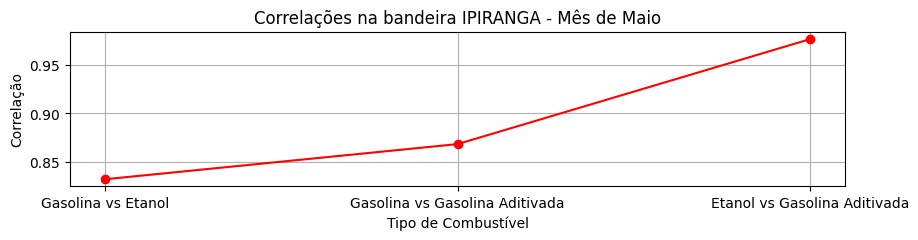

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira STANG : 0.69 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira STANG : 0.69 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira STANG : 1.00 em Maio
--------------------------------------------------


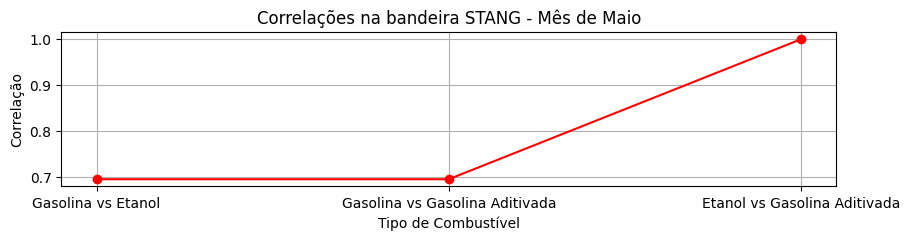

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira RAIZEN : 0.85 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira RAIZEN : 0.81 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira RAIZEN : 0.97 em Maio
--------------------------------------------------


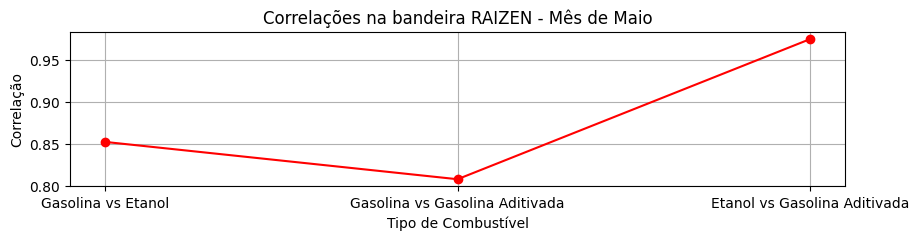

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira RAIZEN MIME : 0.62 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira RAIZEN MIME : 0.65 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira RAIZEN MIME : 0.93 em Maio
--------------------------------------------------


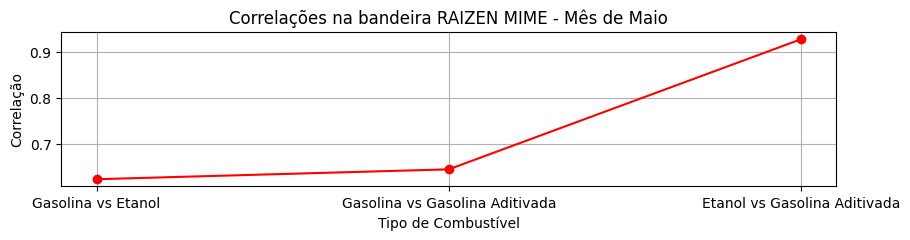

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira VIBRA ENERGIA : 0.69 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira VIBRA ENERGIA : 0.65 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira VIBRA ENERGIA : 0.96 em Maio
--------------------------------------------------


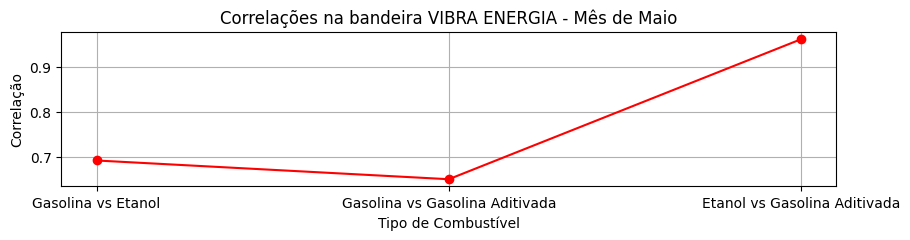

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira BRANCA : 0.84 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira BRANCA : 0.74 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira BRANCA : 0.96 em Maio
--------------------------------------------------


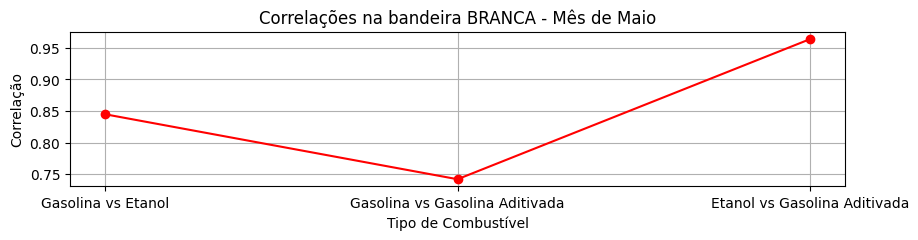

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira ALESAT : 0.80 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira ALESAT : 0.26 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira ALESAT : 0.64 em Maio
--------------------------------------------------


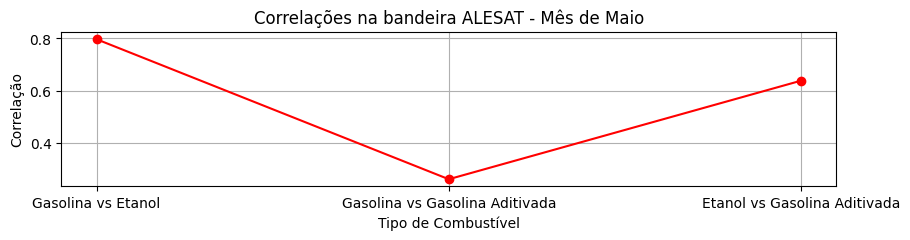

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Correlação gasolina x etanol da bandeira SABBÁ : -0.11 em Maio
--------------------------------------------------
Correlação etanol x gasolina aditivada da bandeira SABBÁ : 0.01 em Maio
--------------------------------------------------
Correlação gasolina x gasolina aditivada da bandeira SABBÁ : 0.91 em Maio
--------------------------------------------------


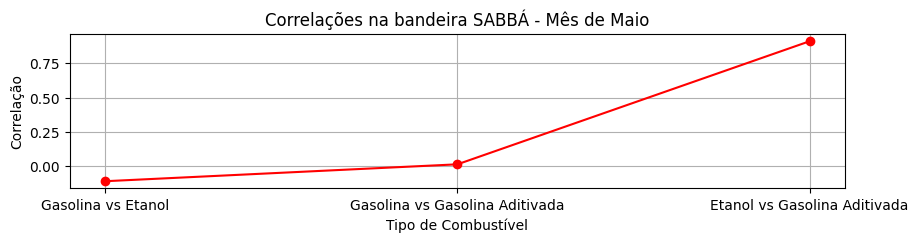

In [ ]:
func_correlacao_bandeira(media_gasolina_cor_ban_m, media_gasolina_adt_cor_ban_m, media_etanol_cor_ban_m, 'Maio',posto)

>- Insights da correlação entre os combustiveis e a bandeira:
  - Em Maio, as correlações dos preços da gasolina, etanol e gasolina aditivada são geralmente fortes e positivas nas diferentes bandeiras. Isso sugere que os preços desses combustíveis tendem a se movimentar juntos, com influências mútuas em seus valores. Essa interdependência pode ser resultado de fatores como flutuações de mercado e mudanças nas políticas de preço.
  obs: com exeção SABBÁ: a correlação negativa fraca entre gasolina e etanol, não havendo praticamente relação entre etanol e gasolina aditivada e uma correlção mais forte envolvendo  as duas gasolinas.


  






### <font color= bluelight >>>> Percentual Variação Maio e Junho

####>>>> Funçâo Percentual de Variação Maio e Junho:
> - Função calcula o percentual de variação dos meses de maio e junho
  - Trata se do calculo da média do mês de Maio, e da média do mês de Junho
sendo feio o percentual de variação das médias.

In [ ]:
def func_percentual_maio_junho(df_junho, df_maio, combustivel):
  valor_maio = df_maio['val_litro'].mean()
  valor_junho = df_junho['val_litro'].mean()
  valor_max_j=df_junho['val_litro'].max()
  valor_min_j =df_junho['val_litro'].min()
  valor_max =df_maio['val_litro'].max()
  valor_min =df_maio['val_litro'].min()


  variacao = valor_junho - valor_maio
  percentual_variacao = (variacao / valor_maio) * 100
  print('-'*50)
  print(f'Maxima do mês de Junho: {valor_max_j:.2f}')
  print('-'*50)
  print(f'Média do mês de Junho: {valor_junho:.2f}')
  print('-'*50)
  print(f'Minima do mês de Junho: {valor_min_j:.2f}')
  print('-'*50)
  print(f'Maxima do mês de Maio: {valor_max:.2f}')
  print('-'*50)
  print(f'Média do mês de Maio: {valor_maio:.2f}')
  print('-'*50)
  print(f'Minima do mês de Maio: {valor_min:.2f}')
  print('-'*50)
  print(f"Variação: {variacao:.2f}")
  print('-'*50)
  print(f"Percentual de Variação: {percentual_variacao:.2f}%")
  print('-'*50)

  data = {'Mês': ['Maio', 'Junho'],
        'Valor Médio': [valor_maio, valor_junho],
        'Valor Máximo': [valor_max, valor_max_j],
        'Valor Mínimo': [valor_min, valor_min_j]}
  df_valores = pd.DataFrame(data)

# Configuração do gráfico de barras
  plt.figure(figsize=(6, 4))  # Tamanho da figura

# Criação do gráfico de barras
  width = 0.1  # Largura das barras
  x = range(len(df_valores))

  plt.bar(x, df_valores['Valor Médio'], width, label='Valor Médio')
  plt.bar([i + width for i in x], df_valores['Valor Máximo'], width, label='Valor Máximo')
  plt.bar([i + width*2 for i in x], df_valores['Valor Mínimo'], width, label='Valor Mínimo')

  # Adicionando um texto no meio do gráfico
  middle_index = len(df_valores) // 2
  middle_value = df_valores['Valor Máximo'][middle_index]
  plt.text(middle_index - 0.40, middle_value - 1,
           f'`{combustivel} \nPercentual de Variação: {percentual_variacao:.2f}\nVariação: {variacao:.2f}',
           fontsize=10, ha='center')

# Configurações do eixo
  plt.xlabel('Mês')
  plt.ylabel('Valor')
  plt.title('Valores Médios, Máximos e Mínimos por Mês')
  plt.xticks(x, df_valores['Mês'])
  plt.legend()

# Adiciona a grade ao gráfico
  plt.grid(True, axis='y')

# Exibe o gráfico
  plt.show()







####>>>> Percentual Variação entre Maio e Junho >>> Etanol

In [ ]:
df_etanol_junho.head()

name_region abbrev_state    nome_munic prod_combust   dt_coleta  \
0       Nordeste           BA         IRECE       ETANOL  01/06/2023   
2       Nordeste           BA  SIMOES FILHO       ETANOL  01/06/2023   
7        Sudeste           ES      COLATINA       ETANOL  01/06/2023   
10       Sudeste           ES      COLATINA       ETANOL  01/06/2023   
15  Centro Oeste           GO       CATALAO       ETANOL  01/06/2023   

    val_litro  unid_medid       bandeira  
0        4.31  R$ / litro  VIBRA ENERGIA  
2        4.19  R$ / litro  VIBRA ENERGIA  
7        4.79  R$ / litro  VIBRA ENERGIA  
10       4.67  R$ / litro       IPIRANGA  
15       3.89  R$ / litro  VIBRA ENERGIA

--------------------------------------------------
Maxima do mês de Junho: 6.73
--------------------------------------------------
Média do mês de Junho: 4.01
--------------------------------------------------
Minima do mês de Junho: 2.97
--------------------------------------------------
Maxima do mês de Maio: 6.50
--------------------------------------------------
Média do mês de Maio: 4.18
--------------------------------------------------
Minima do mês de Maio: 2.99
--------------------------------------------------
Variação: -0.17
--------------------------------------------------
Percentual de Variação: -4.12%
--------------------------------------------------


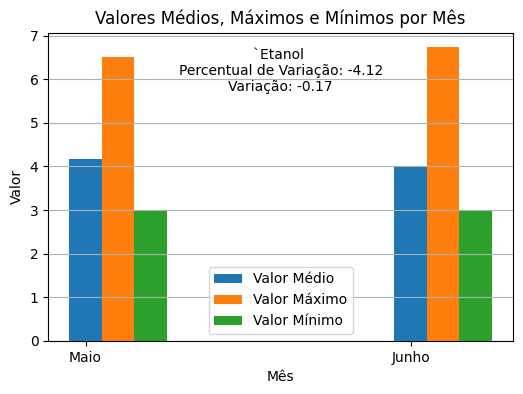

In [ ]:
func_percentual_maio_junho(df_etanol_junho, df_etanol_maio,'Etanol')

####>>>> Percentual Variação entre Maio e Junho >>> Gasolina

--------------------------------------------------
Maxima do mês de Junho: 7.00
--------------------------------------------------
Média do mês de Junho: 5.39
--------------------------------------------------
Minima do mês de Junho: 4.43
--------------------------------------------------
Maxima do mês de Maio: 7.35
--------------------------------------------------
Média do mês de Maio: 5.40
--------------------------------------------------
Minima do mês de Maio: 4.09
--------------------------------------------------
Variação: -0.01
--------------------------------------------------
Percentual de Variação: -0.18%
--------------------------------------------------


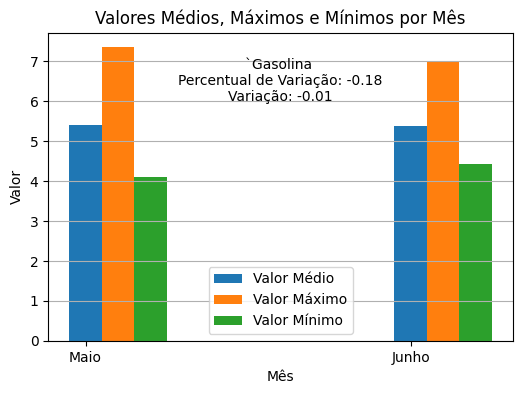

In [ ]:
func_percentual_maio_junho(df_gasolina_junho, df_gasolina_maio,'Gasolina')

####>>>> Percentual Variação entre Maio e Junho >>> Gasolina Aditivada

--------------------------------------------------
Maxima do mês de Junho: 7.99
--------------------------------------------------
Média do mês de Junho: 5.57
--------------------------------------------------
Minima do mês de Junho: 4.59
--------------------------------------------------
Maxima do mês de Maio: 7.99
--------------------------------------------------
Média do mês de Maio: 5.59
--------------------------------------------------
Minima do mês de Maio: 4.49
--------------------------------------------------
Variação: -0.01
--------------------------------------------------
Percentual de Variação: -0.24%
--------------------------------------------------


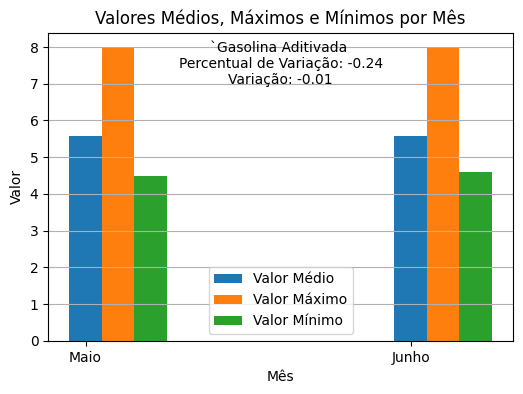

In [ ]:
func_percentual_maio_junho(df_gasolina_adt_junho, df_gasolina_adt_maio,'Gasolina Aditivada')